In [1]:
import pyabf
import matplotlib.pyplot as plt
import numpy as np
from os import getcwd,listdir
from util import findStable_Bias, cal_points_qty, print_points_qty, plot_wave, plot_colormap, capture, write_target, plot_wave, check_close_fair_pair

# Start

參數記錄
格式：[abf_file,bins,Row,Col,volt,emf_bias,current_bias,start_ignore,end_ignore,start_extra,end_extra,start_single,end_single,first_row_repeat]
1. [24903000.abf,50,100,100,200,-300,0,2,12,5,0,True,False,6]
2. [24903001.abf,50,100,100,-200,-140,0,2,13,5,0,True,False,6]
3. [24o24001.abf,50,40,40,130,0,0,4,10,5,0,False,True.6]

In [2]:
abf_file = ["24o24001.abf"]

In [3]:
abf = [pyabf.ABF("abf\\"+x) for x in abf_file]
title_prefix = [x[:-4] for x in abf_file]
fig_save_path =getcwd()+"\\result\\"

In [4]:
bins = [50]
Row = [40]
Col = [40]

volt = [130]
emf_bias = [0]
current_bias = [0]

# start_ignore and end_ignore: extra points before reshape into rows
# start_extra and end_extra: extra points of each rows
start_ignore = [4] #Don't include the single point
end_ignore = [10]  #Don't include the single point
start_extra = [5]
end_extra = [0]
start_single = [False]
end_single = [True]
first_row_repeat = [6]

In [5]:
ignore = [(x,y) for x,y in zip(start_ignore,end_ignore)]
extra =  [(x,y) for x,y in zip(start_extra,end_extra)]
dim = [(x-1,y) for x,y in zip(Row,Col)]
single = [(x,y) for x,y in zip(start_single,end_single)]

In [6]:
for i in range(len(title_prefix)):
    total = (Row[i]-1)*(Col[i]+start_extra[i]+end_extra[i])+end_ignore[i]+start_ignore[i]+Col[i]*first_row_repeat[i]
    print(f"{abf_file[i]}'s total points should be {total}")

24o24001.abf's total points should be 2009


In [7]:
closes = []
fars = []
close_inds = []
far_inds = []
for i in range(len(abf)):
    close,far,close_index,far_index = findStable_Bias(abf[i],volt[i],single=single[i])
    closes.append(close)
    fars.append(far)
    close_inds.append(close_index)
    far_inds.append(far_index)

Close point found: 2009
Far point found: 2009


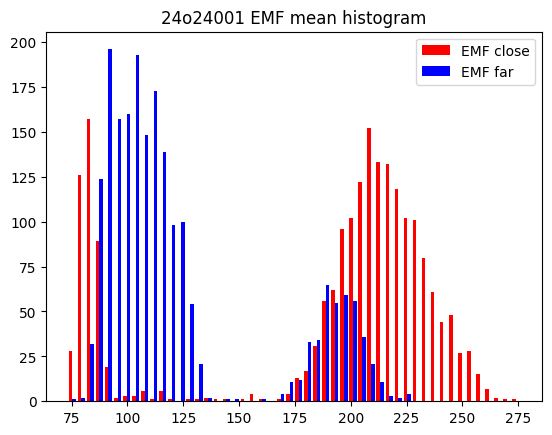

In [8]:
for i in range(len(abf_file)):
    plt.figure()
    plt.hist((closes[i],fars[i]),bins=bins[i],label = ('EMF close','EMF far'),color = ('red','blue'))
    plt.legend()
    plt.title("%s EMF mean histogram"%(title_prefix[i]))
    plt.savefig(fig_save_path+"%s EMF mean histogram"%(title_prefix[i]))
    plt.show()

1.706478 ± 0.710264


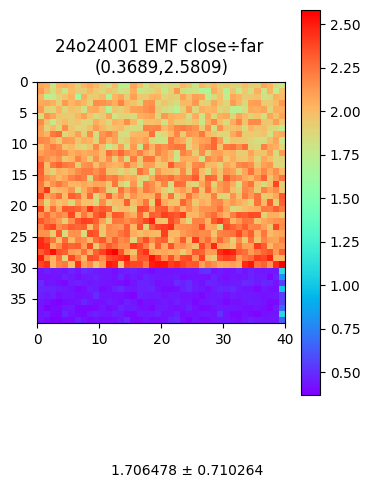

In [9]:
emf_divs = []
vmins = []
vmaxs = []
for i in range(len(abf_file)):
    target = closes[i]/fars[i]
    target = capture(target, first_row_repeat[i], ignore[i], extra[i], dim[i])
    mean = np.mean(target)
    std = np.std(target)
    print(f"%lf ± %lf" %(mean,std))
    emf_divs.append(target)
    vmins.append(target.min())
    vmaxs.append(target.max())
    
vmin = max(vmins)
vmax = min(vmaxs)
for i in range(len(abf_file)):
    figsize = (int(emf_divs[i].shape[0]/8), int(emf_divs[i].shape[1]/8))
    title = title_prefix[i] + " EMF close÷far"
    plot_colormap(emf_divs[i],title = title,path = fig_save_path, figsize = figsize,
                  vmin = vmin, vmax = vmax)

59.203793 ± 92.368881


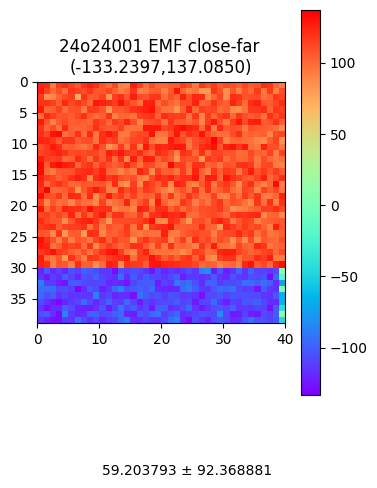

In [10]:
emf_difs = []
vmins = []
vmaxs = []
for i in range(len(abf_file)):
    target = closes[i]-fars[i]
    target = capture(target, first_row_repeat[i], ignore[i], extra[i], dim[i])
    mean = np.mean(target)
    std = np.std(target)
    print(f"%lf ± %lf" %(mean,std))
    emf_difs.append(target)
    vmins.append(target.min())
    vmaxs.append(target.max())
    
vmin = max(vmins)
vmax = min(vmaxs)
for i in range(len(abf_file)):
    figsize = (int(emf_difs[i].shape[0]/8), int(emf_difs[i].shape[1]/8))
    title = title_prefix[i] + " EMF close-far"
    plot_colormap(emf_difs[i],title = title,path = fig_save_path, figsize = figsize,
                  vmin = vmin, vmax = vmax)

In [11]:
# Calculate on Current
I_closes = []
I_fars = []
I_close_inds = []
I_far_inds = []
for i in range(len(abf)):
    close,far,close_index,far_index = findStable_Bias(abf[i],volt[i],single=single[i], channel = 0)
    I_closes.append(close)
    I_fars.append(far)
    I_close_inds.append(close_index)
    I_far_inds.append(far_index)

Close point found: 2009
Far point found: 2009


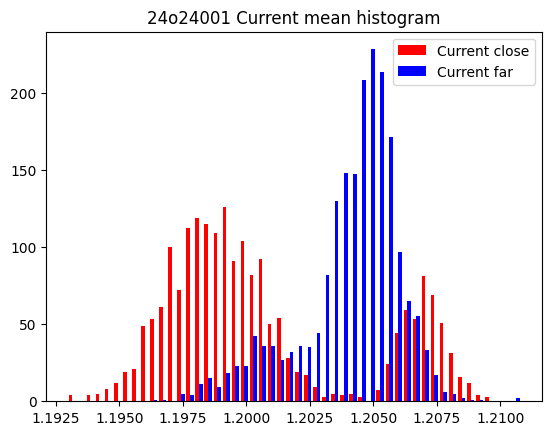

In [12]:
for i in range(len(abf_file)):
    plt.figure()
    plt.hist((I_closes[i],I_fars[i]),bins=bins[i],label = ('Current close','Current far'),color = ('red','blue'))
    plt.legend()
    plt.title("%s Current mean histogram"%(title_prefix[i]))
    plt.savefig(fig_save_path+"%s Current mean histogram"%(title_prefix[i]))
    plt.show()

0.997342 ± 0.004213


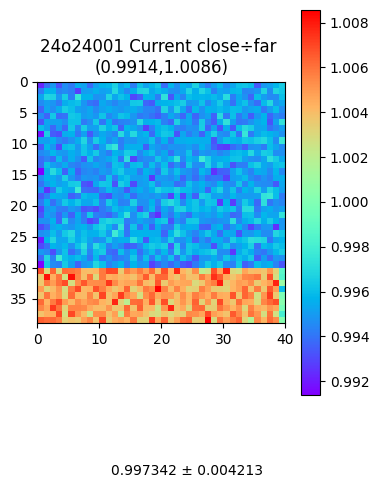

In [13]:
cur_divs = []
vmins = []
vmaxs = []
for i in range(len(abf_file)):
    target = I_closes[i]/I_fars[i]
    target = capture(target, first_row_repeat[i], ignore[i], extra[i], dim[i])
    mean = np.mean(target)
    std = np.std(target)
    print(f"%lf ± %lf" %(mean,std))
    cur_divs.append(target)
    vmins.append(target.min())
    vmaxs.append(target.max())
    
vmin = max(vmins)
vmax = min(vmaxs)
for i in range(len(abf_file)):
    figsize = (int(cur_divs[i].shape[0]/8), int(cur_divs[i].shape[1]/8))
    title = title_prefix[i] + " Current close÷far"
    plot_colormap(cur_divs[i],title = title,path = fig_save_path, figsize = figsize,
                  vmin = vmin, vmax = vmax)

-0.003207 ± 0.005068


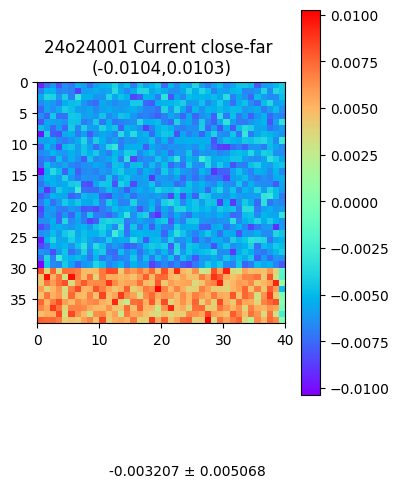

In [14]:
cur_difs = []
vmins = []
vmaxs = []
for i in range(len(abf_file)):
    target = I_closes[i]-I_fars[i]
    target = capture(target, first_row_repeat[i], ignore[i], extra[i], dim[i])
    mean = np.mean(target)
    std = np.std(target)
    print(f"%lf ± %lf" %(mean,std))
    cur_difs.append(target)
    vmins.append(target.min())
    vmaxs.append(target.max())
    
vmin = max(vmins)
vmax = min(vmaxs)
for i in range(len(abf_file)):
    figsize = (int(cur_difs[i].shape[0]/8), int(cur_difs[i].shape[1]/8))
    title = title_prefix[i] + " Current close-far"
    plot_colormap(cur_difs[i],title = title,path = fig_save_path, figsize = figsize,
                  vmin = vmin, vmax = vmax)

In [15]:
emf = []
cur = []
for i in range(len(abf_file)):
    emf.append(np.vstack((closes[i].flatten(),fars[i].flatten())))
    emf[i] = emf[i].reshape((emf[i].shape[1],emf[i].shape[0]))
    cur.append(np.vstack((I_closes[i].flatten(),I_fars[i].flatten())))
    cur[i] = cur[i].reshape((cur[i].shape[1],cur[i].shape[0]))

In [16]:
closes_2d = []
fars_2d = []
I_closes_2d = []
I_fars_2d = []
for i in range(len(abf_file)):
    closes_2d.append(capture(closes[i], first_row_repeat[i], ignore[i], extra[i], dim[i]))
    fars_2d.append(capture(fars[i], first_row_repeat[i], ignore[i], extra[i], dim[i]))
    I_closes_2d.append(capture(I_closes[i], first_row_repeat[i], ignore[i], extra[i], dim[i]))
    I_fars_2d.append(capture(I_fars[i], first_row_repeat[i], ignore[i], extra[i], dim[i]))

In [17]:
import pandas as pd
import csv
for i in range(len(abf_file)):
    targets = [emf_divs[i], emf_difs[i], closes_2d[i], fars_2d[i], cur_divs[i], cur_difs[i], I_closes[i], I_fars[i], emf[i], cur[i]]
    filenames = [" EMF close÷far"," EMF close-far", "EMF close", "EMF far",
                 " Current close÷far"," Current close-far", " Current close", " Current far", " EMF", " Current"]
    filenames = [title_prefix[i]+x+" " for x in filenames]
    for target, filename in zip(targets,filenames):
        write_target(target,filename)

# Test

## Test 01 -- With start time and end time

Close point found: 1
Far point found: 2


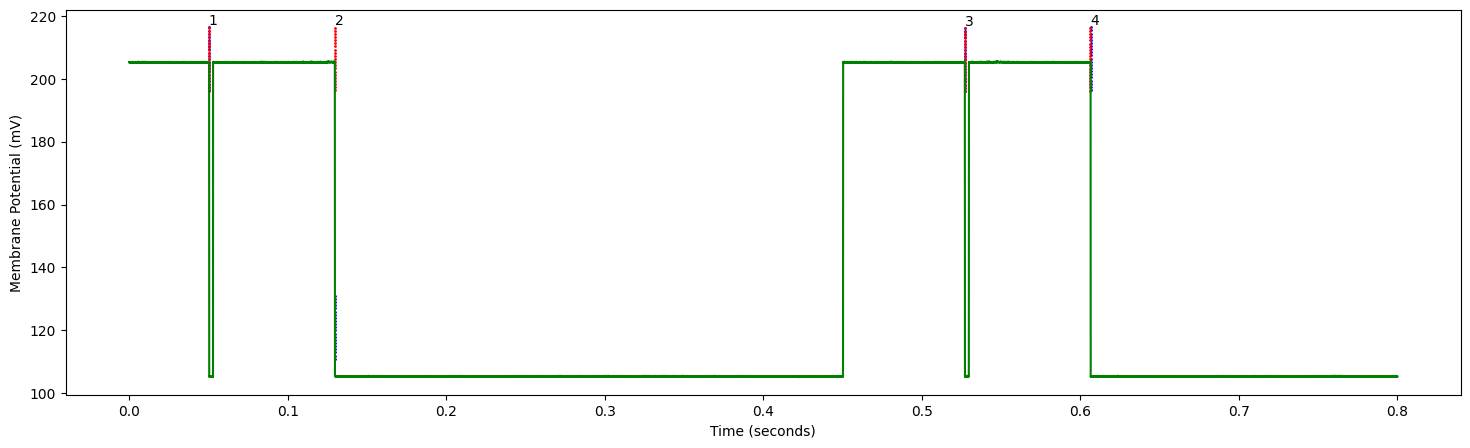

[205.3125 205.1904 205.2515 ... 105.2148 105.2148 105.2148]


In [18]:
timeStart = 0
timeEnd = 20000
ind = 0
consider_single = True

if consider_single:
    s = single[ind]
else:
    s = (False,False)

plot_wave(abf[ind],volt[ind],single = s,timeStart = timeStart, timeEnd = timeEnd,channel=4)
print(abf[ind].sweepY[timeStart:timeEnd])

## Test 02_v2 -- Check all graph

Time: 0 ~ 200050
Close point found: 10
Far point found: 10


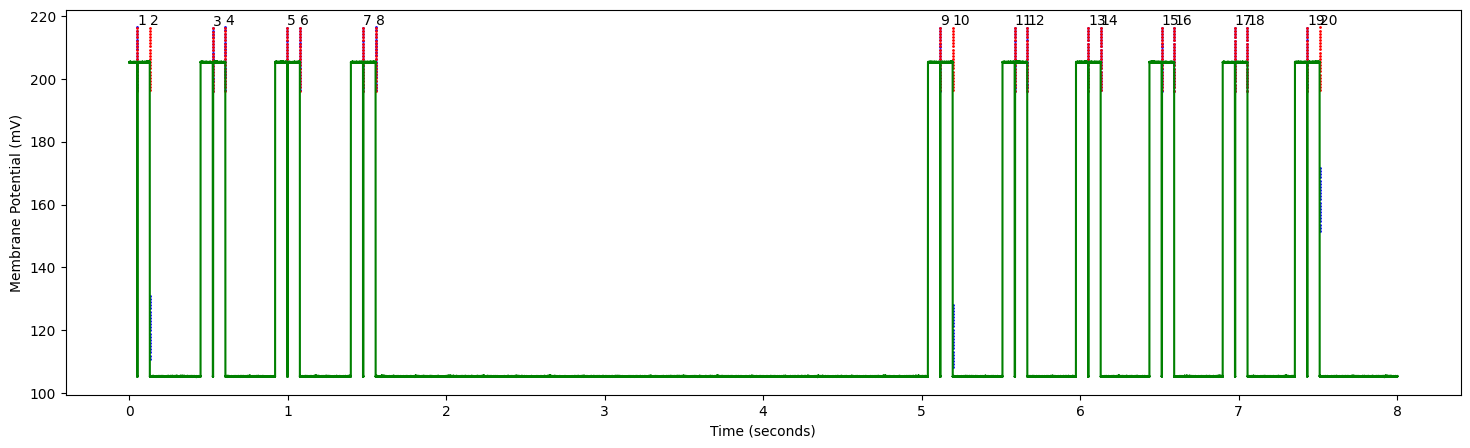

Time: 200000 ~ 400050
Close point found: 6
Far point found: 6


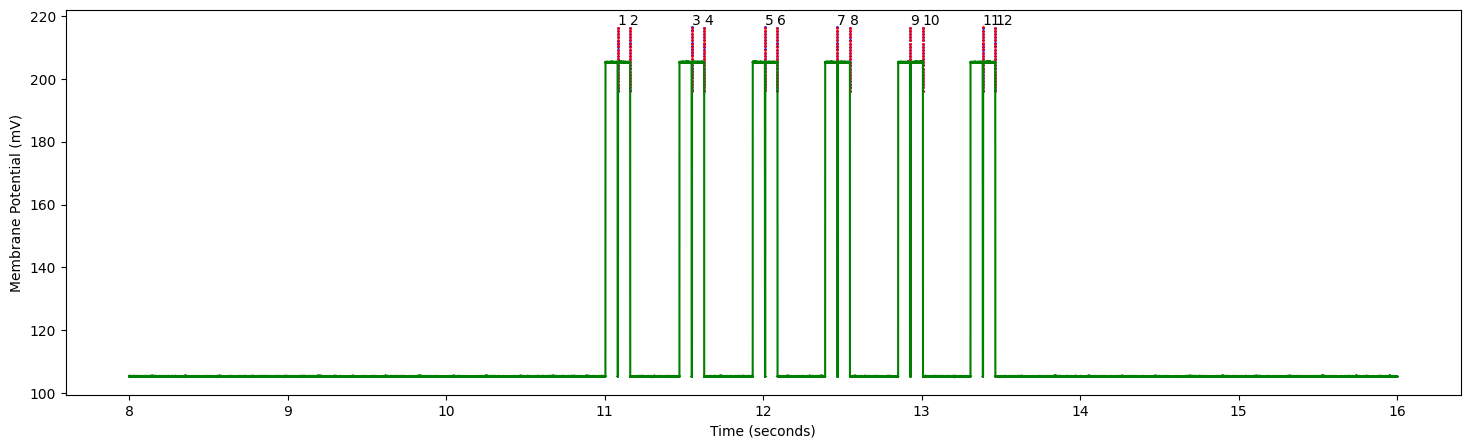

Time: 400000 ~ 600050
Close point found: 9
Far point found: 8


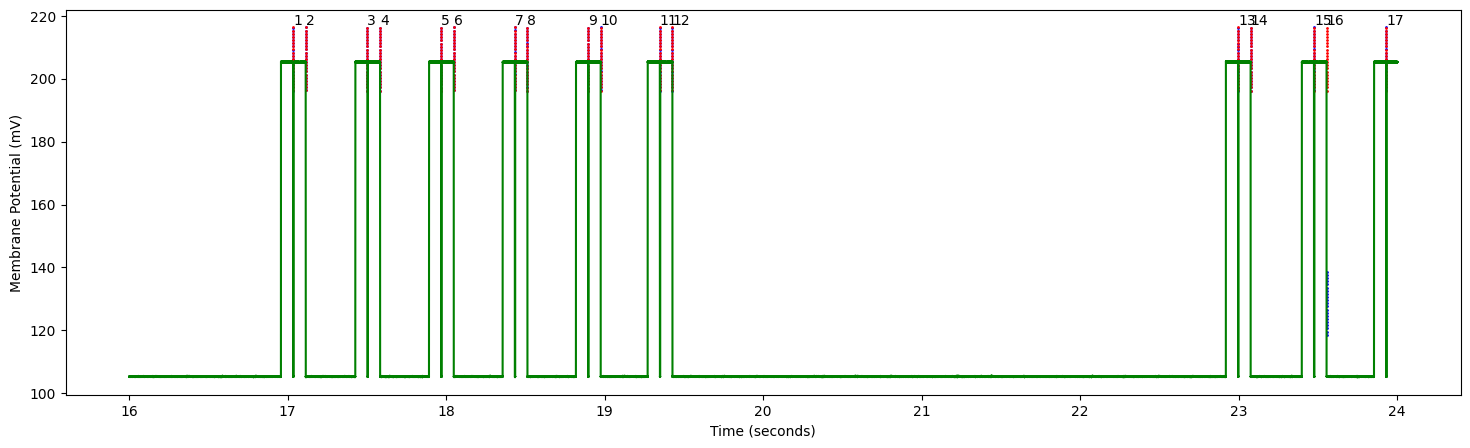

Time: 600000 ~ 800050
Close point found: 10
Far point found: 9


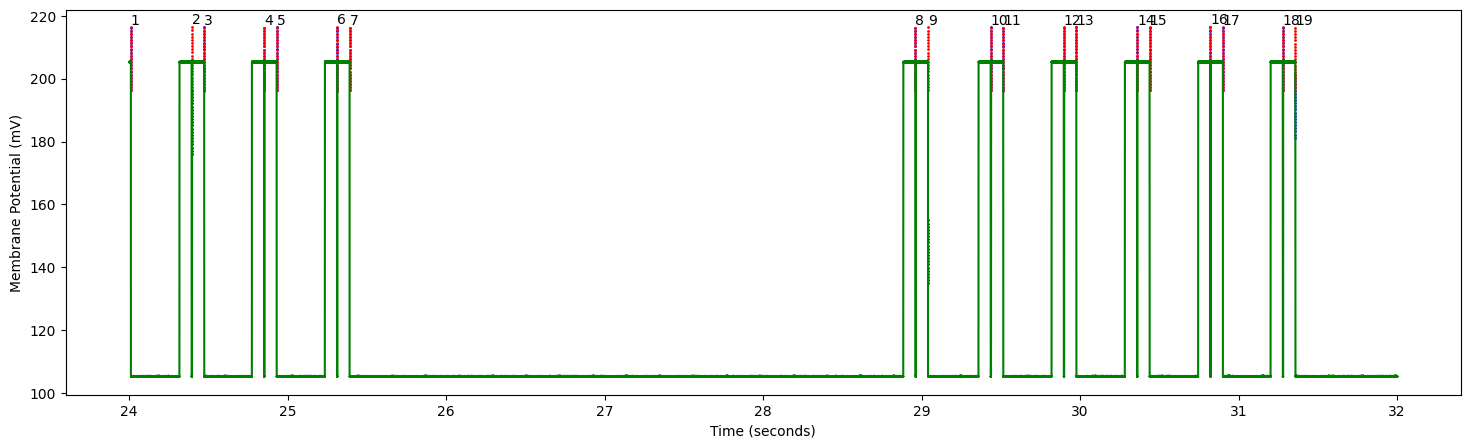

Time: 800000 ~ 1000050
Close point found: 6
Far point found: 6


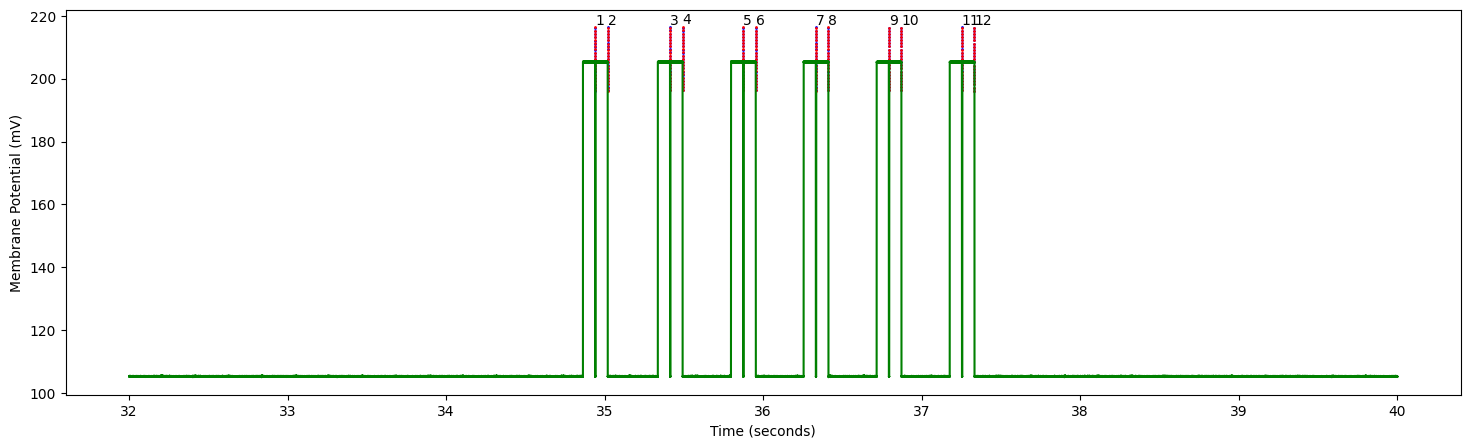

Time: 1000000 ~ 1200050
Close point found: 9
Far point found: 9


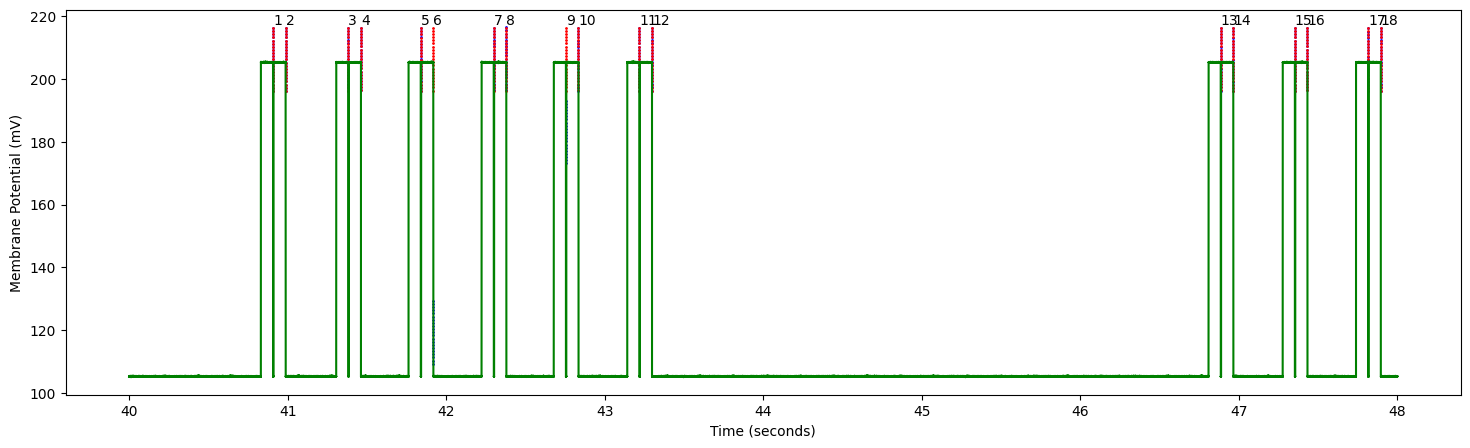

Time: 1200000 ~ 1400050
Close point found: 9
Far point found: 9


Time: 1400000 ~ 1600050
Close point found: 6
Far point found: 6


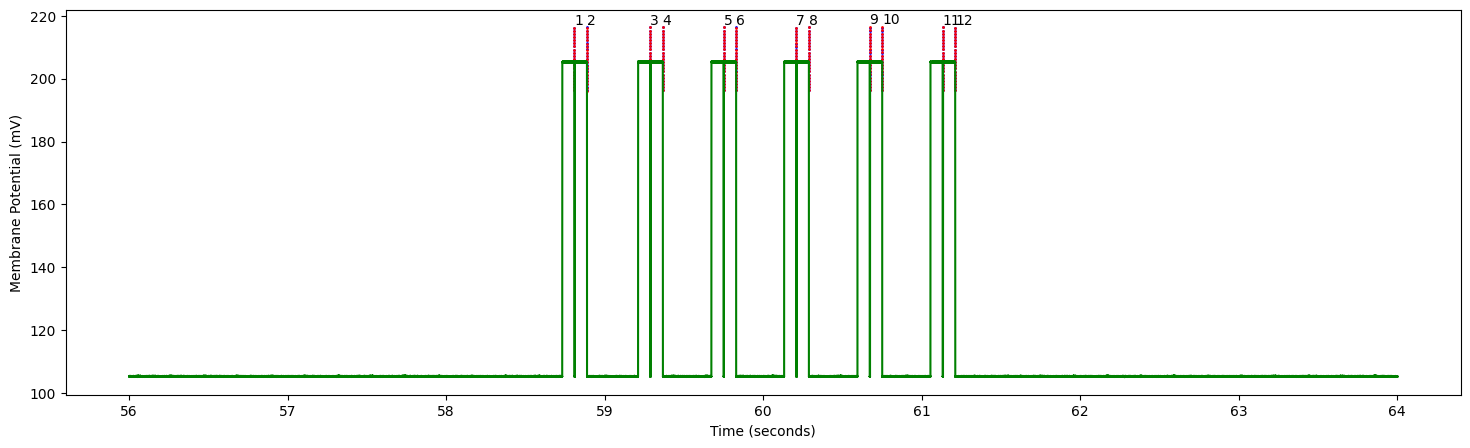

Time: 1600000 ~ 1800050
Close point found: 9
Far point found: 9


Time: 1800000 ~ 2000050
Close point found: 9
Far point found: 9


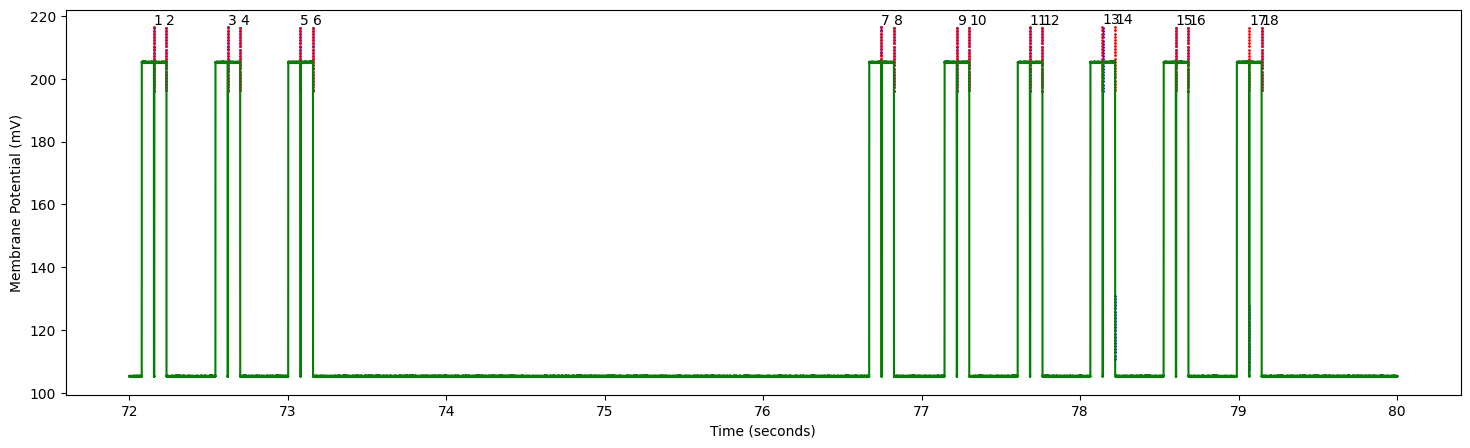

Time: 2000000 ~ 2200050
Close point found: 6
Far point found: 6


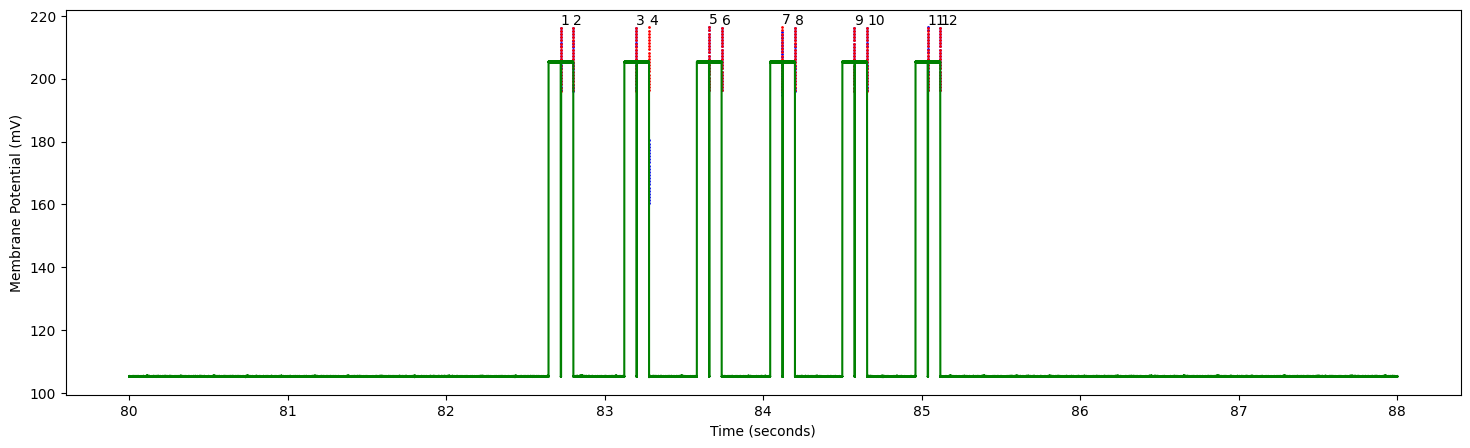

Time: 2200000 ~ 2400050
Close point found: 9
Far point found: 9


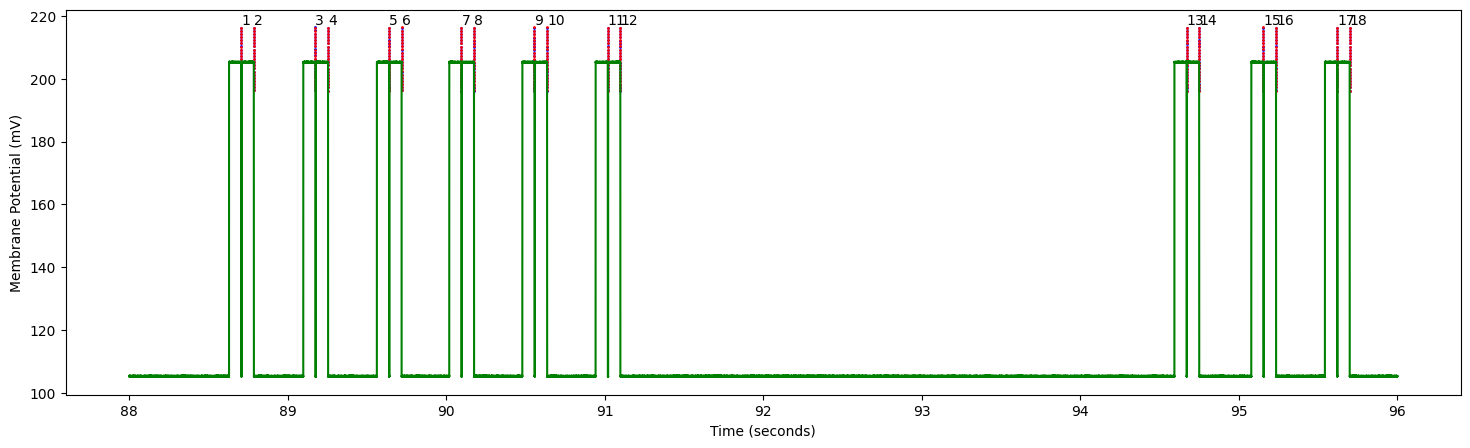

Time: 2400000 ~ 2600050
Close point found: 9
Far point found: 9


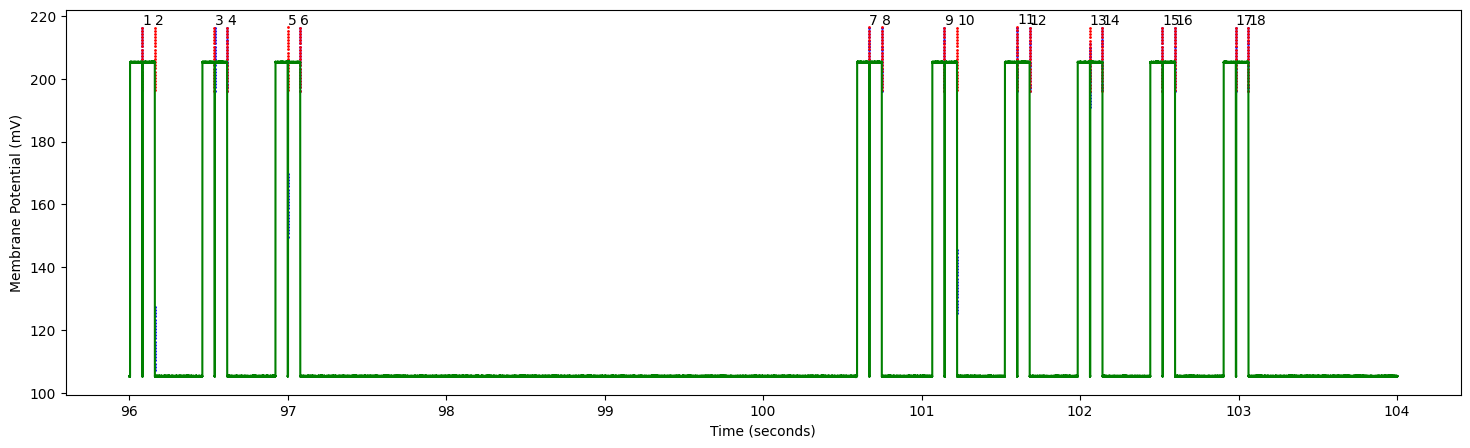

Time: 2600000 ~ 2800050
Close point found: 6
Far point found: 6


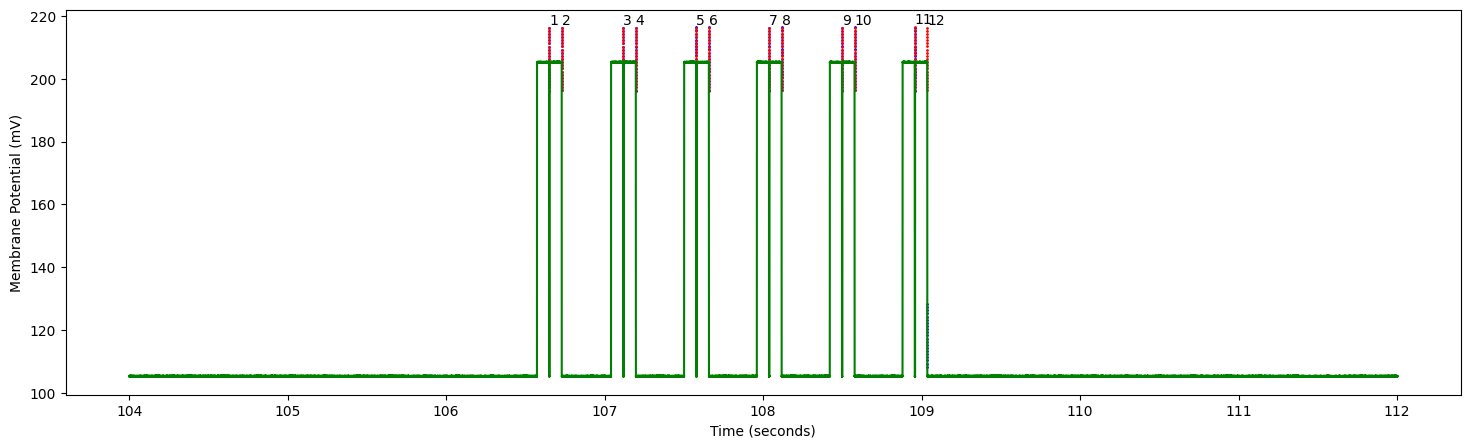

Time: 2800000 ~ 3000050
Close point found: 9
Far point found: 9


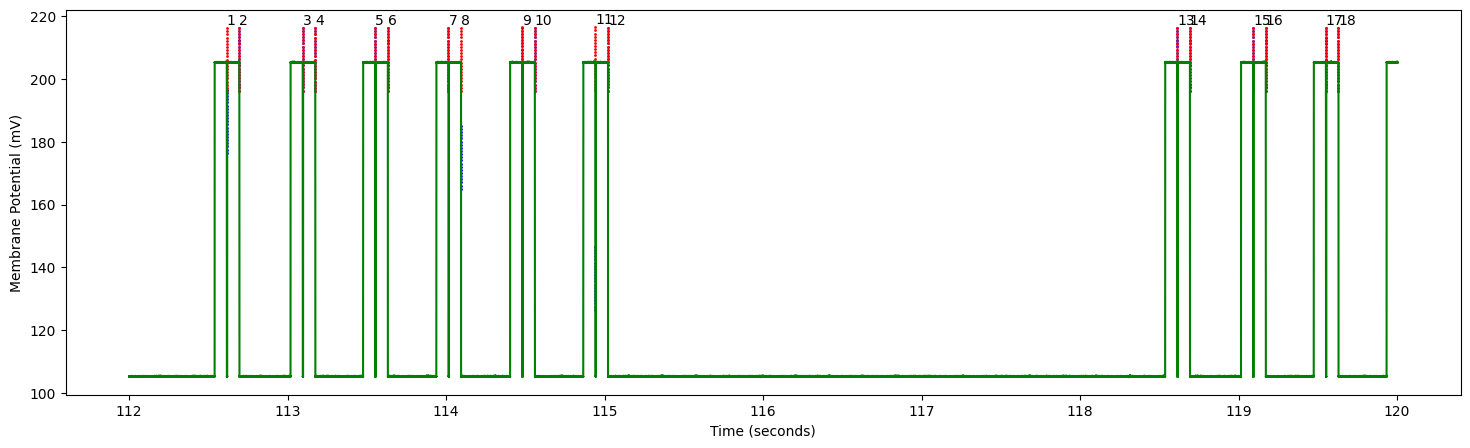

Time: 3000000 ~ 3200050
Close point found: 9
Far point found: 9


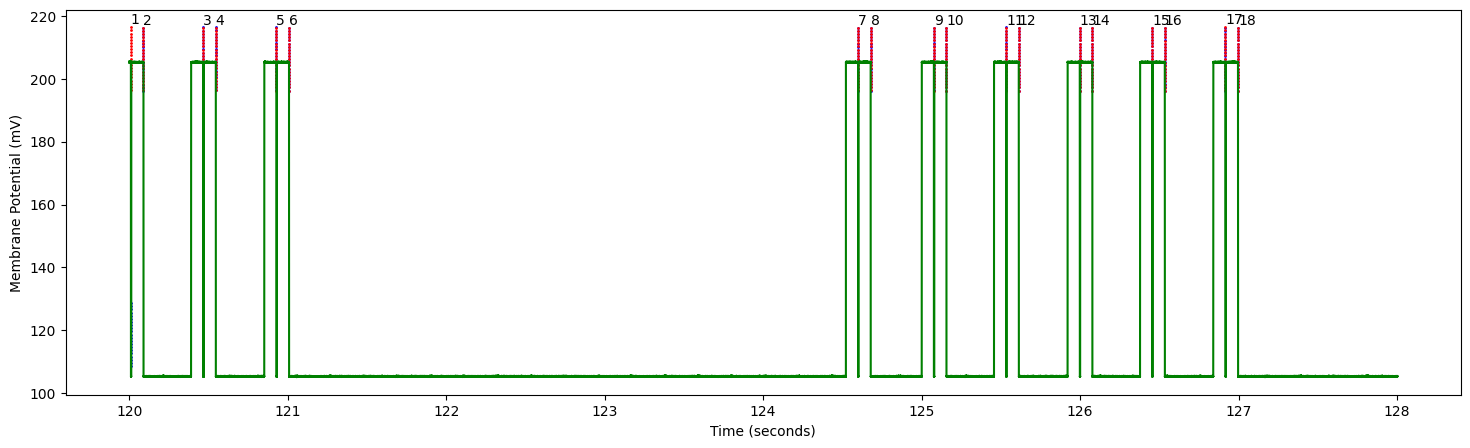

Time: 3200000 ~ 3400050
Close point found: 6
Far point found: 6


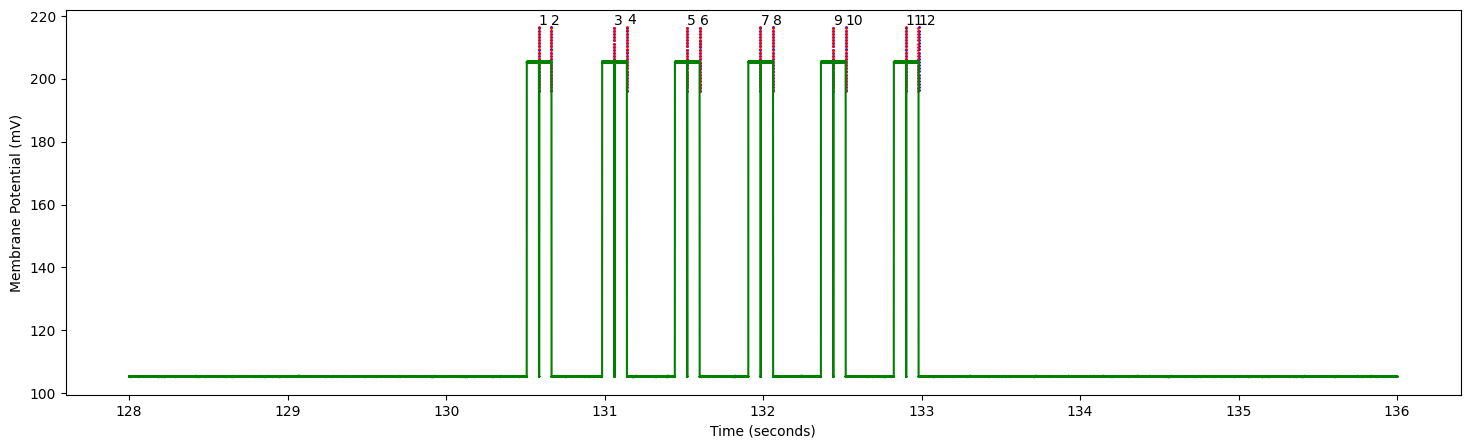

Time: 3400000 ~ 3600050
Close point found: 10
Far point found: 9


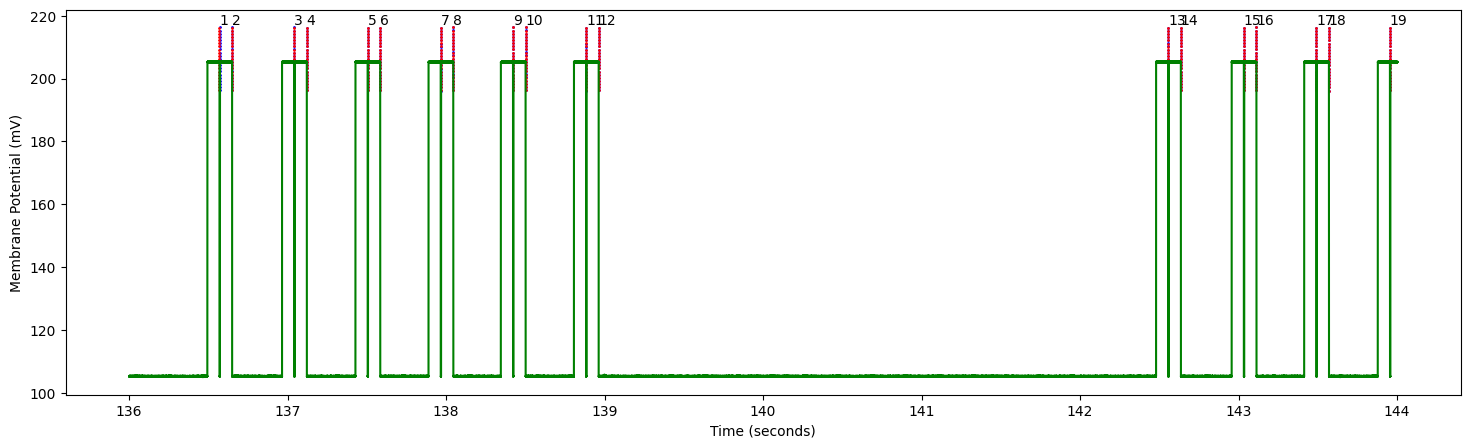

Time: 3600000 ~ 3800050
Close point found: 9
Far point found: 8


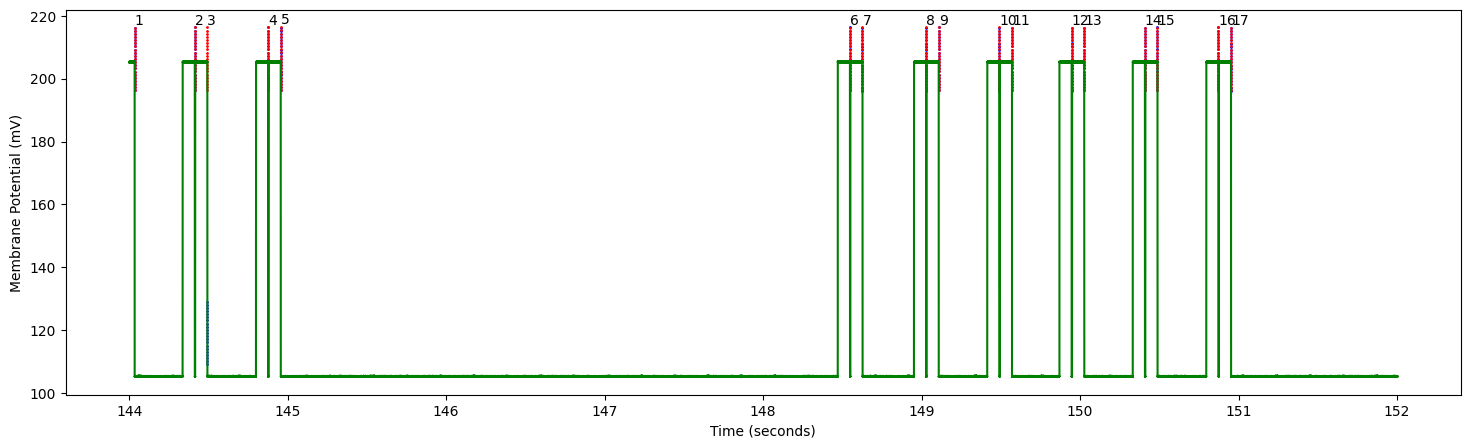

Time: 3800000 ~ 4000050
Close point found: 6
Far point found: 6


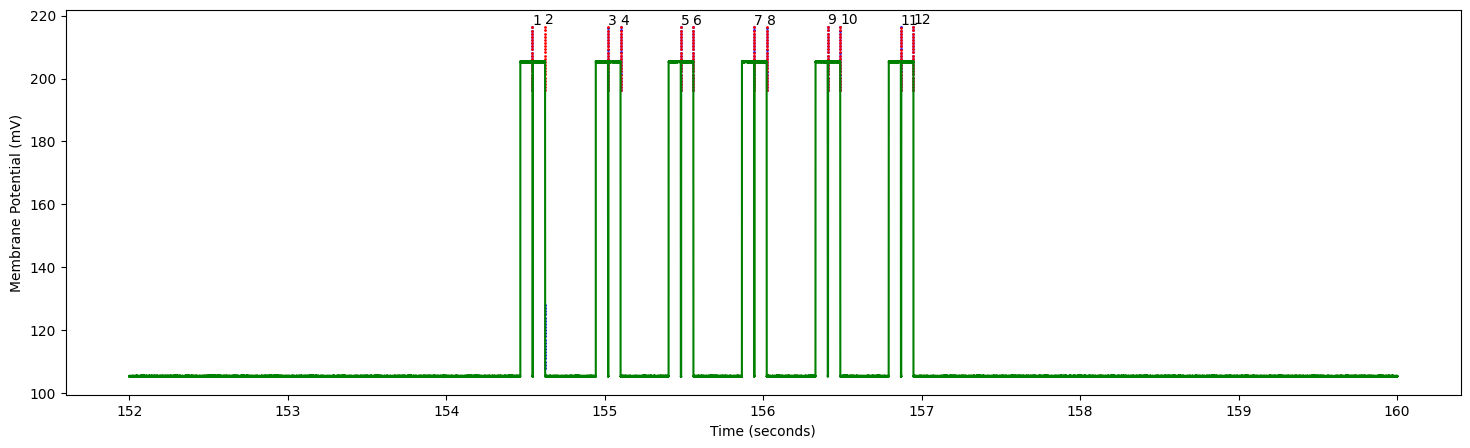

Time: 4000000 ~ 4200050
Close point found: 10
Far point found: 9


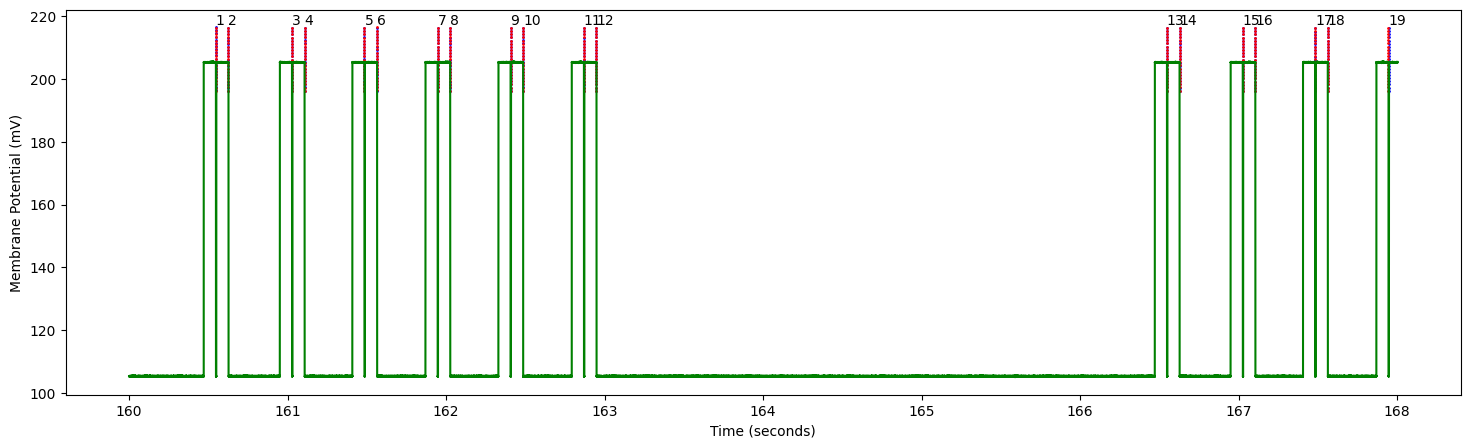

Time: 4200000 ~ 4400050
Close point found: 9
Far point found: 8


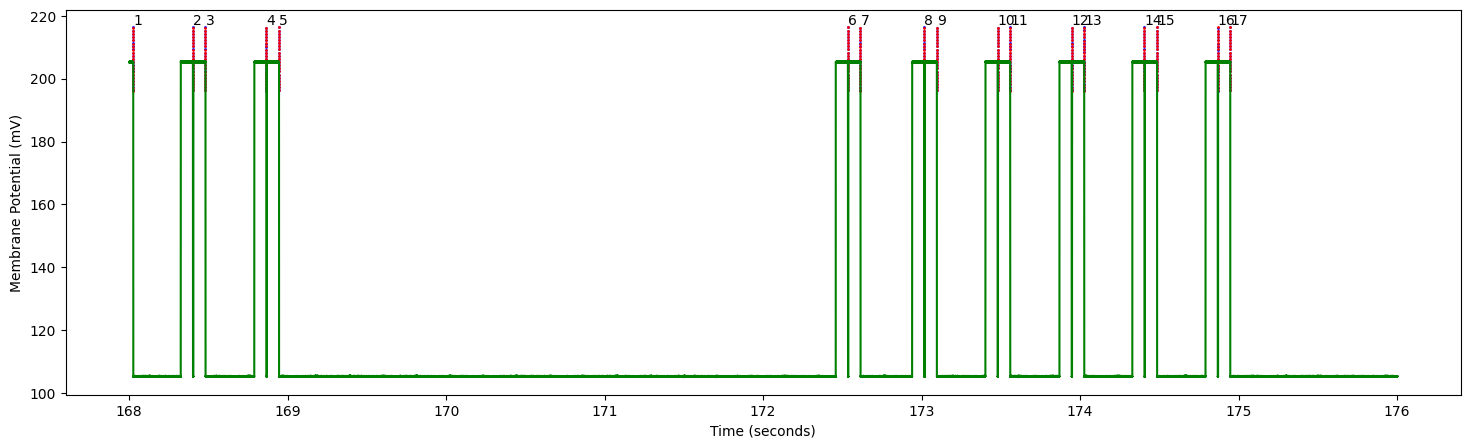

Time: 4400000 ~ 4600050
Close point found: 7
Far point found: 7


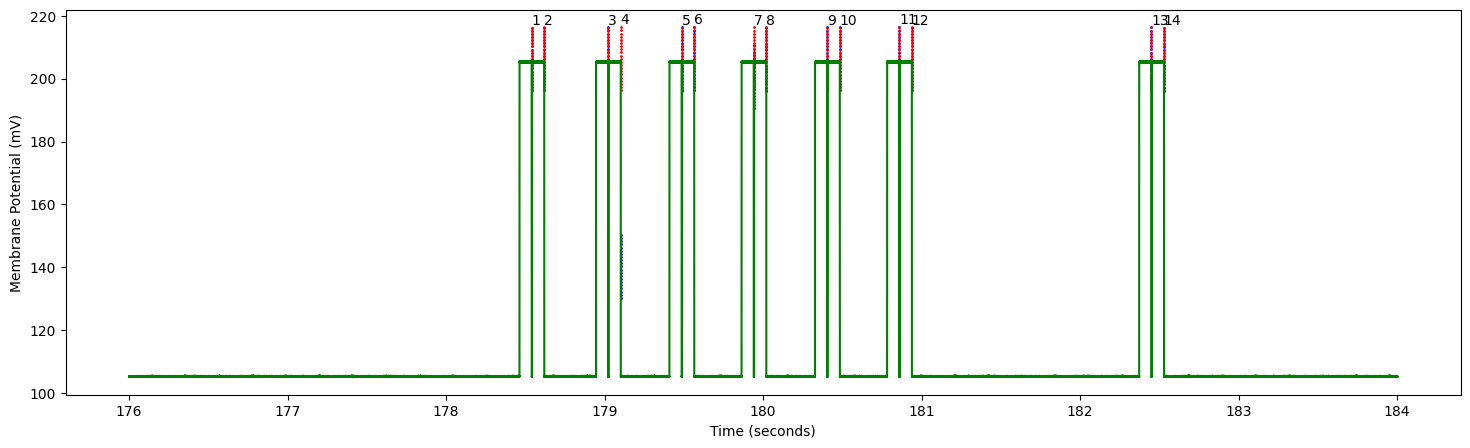

Time: 4600000 ~ 4800050
Close point found: 9
Far point found: 8


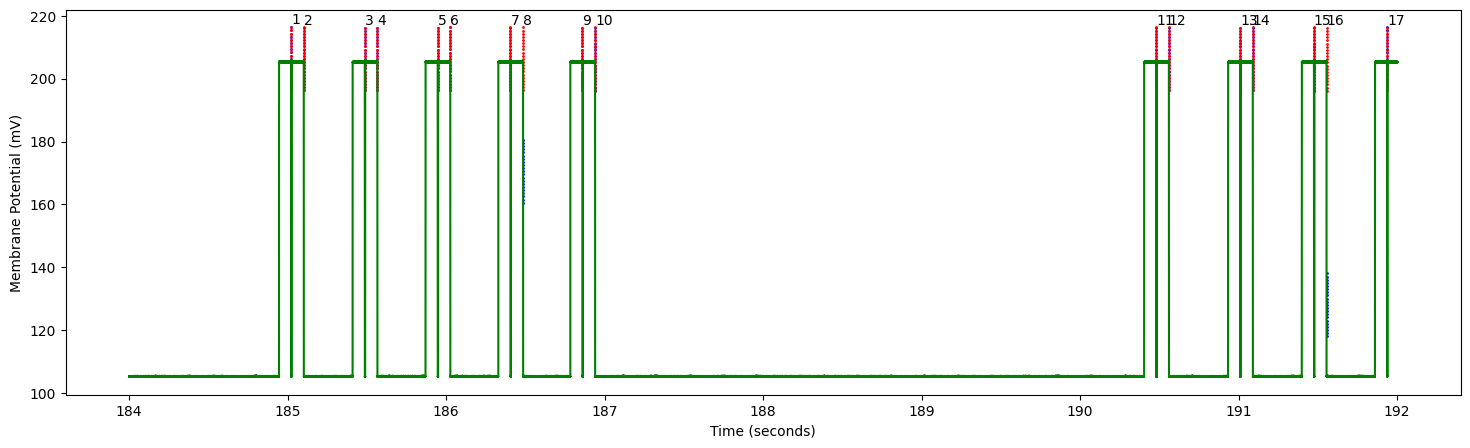

Time: 4800000 ~ 5000050
Close point found: 9
Far point found: 8


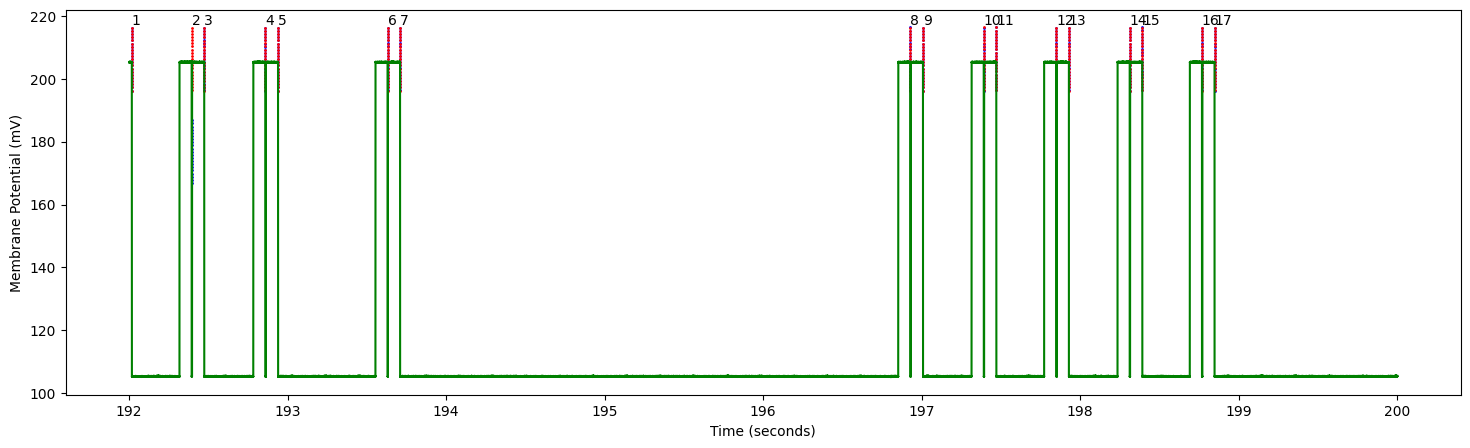

Time: 5000000 ~ 5200050
Close point found: 6
Far point found: 6


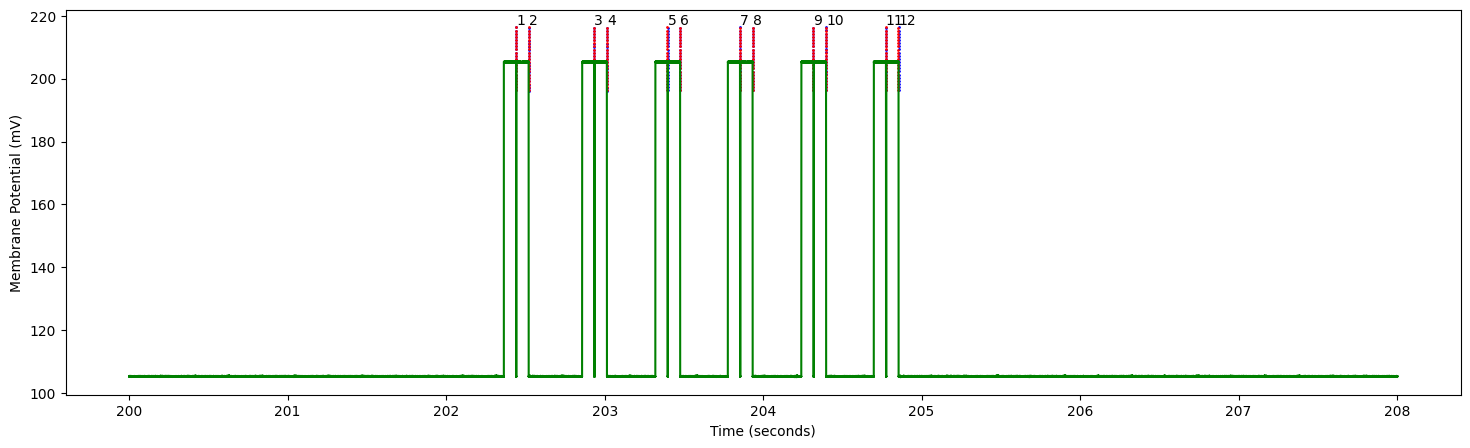

Time: 5200000 ~ 5400050
Close point found: 10
Far point found: 10


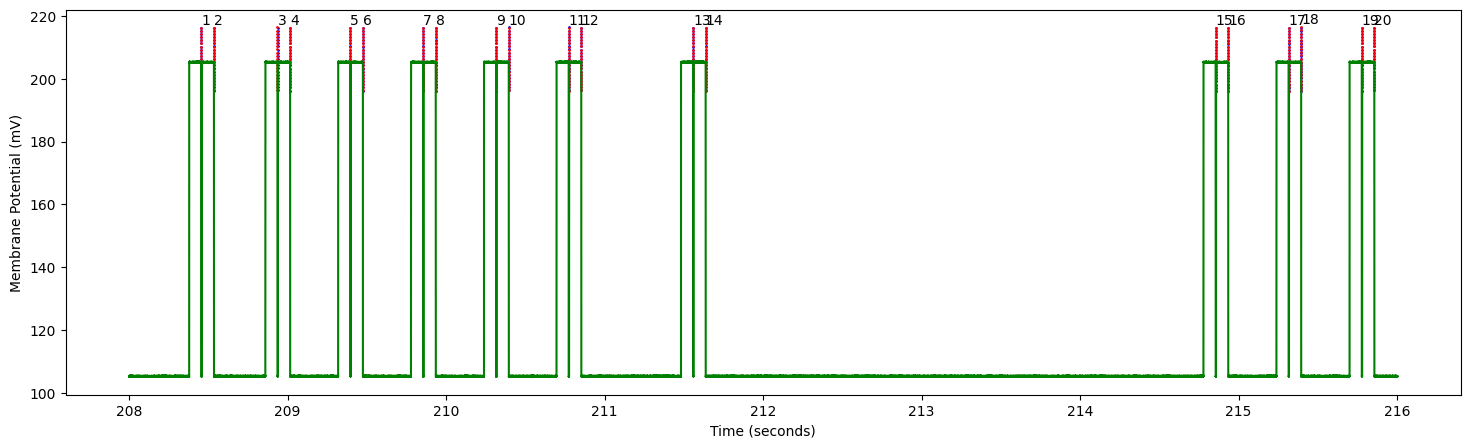

Time: 5400000 ~ 5600050
Close point found: 8
Far point found: 8


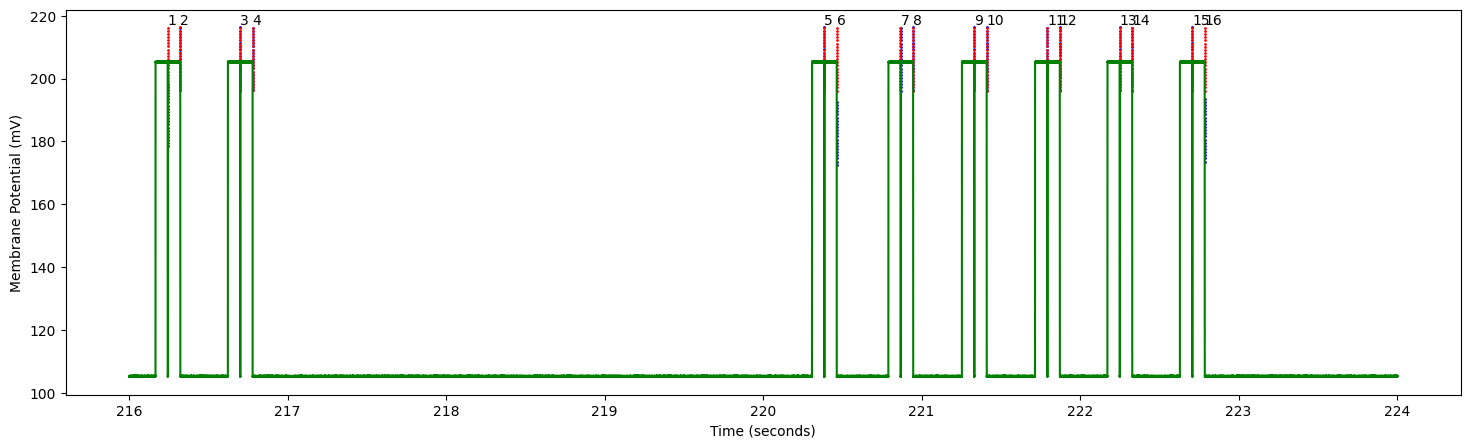

Time: 5600000 ~ 5800050
Close point found: 7
Far point found: 7


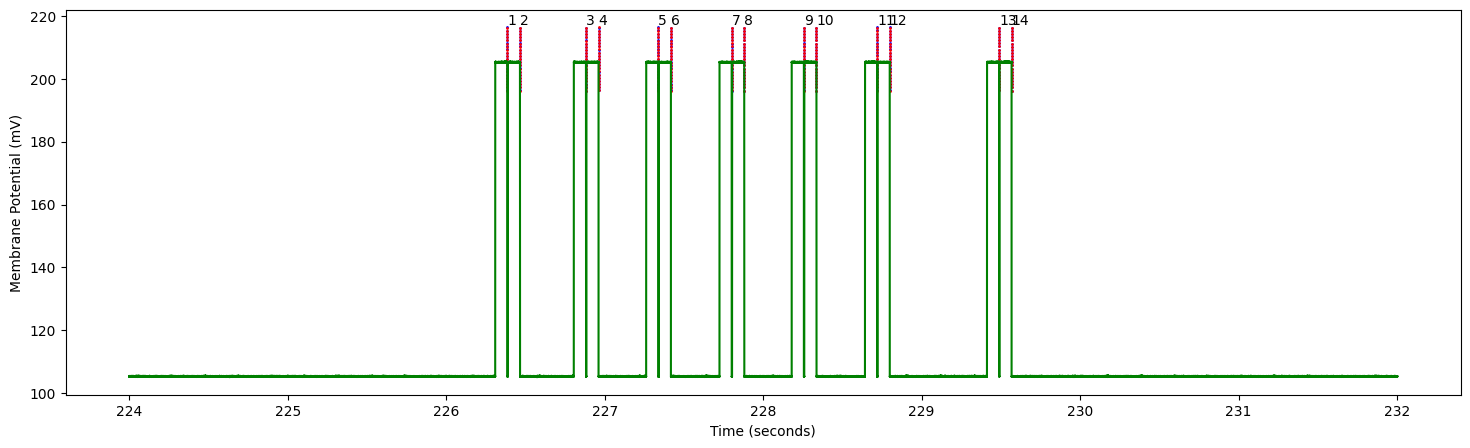

Time: 5800000 ~ 6000050
Close point found: 9
Far point found: 9


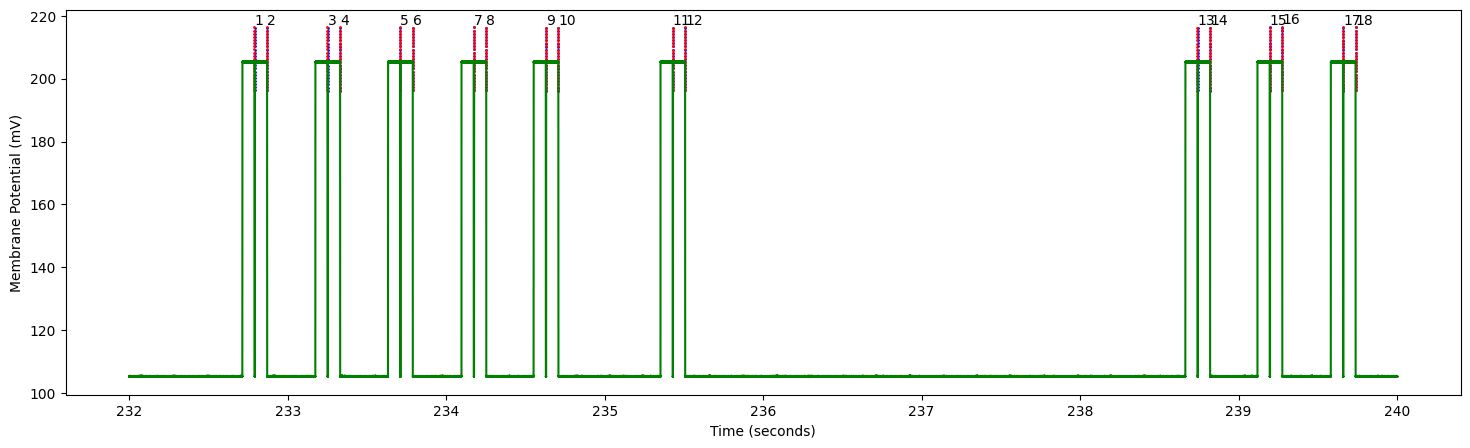

Time: 6000000 ~ 6200050
Close point found: 11
Far point found: 11


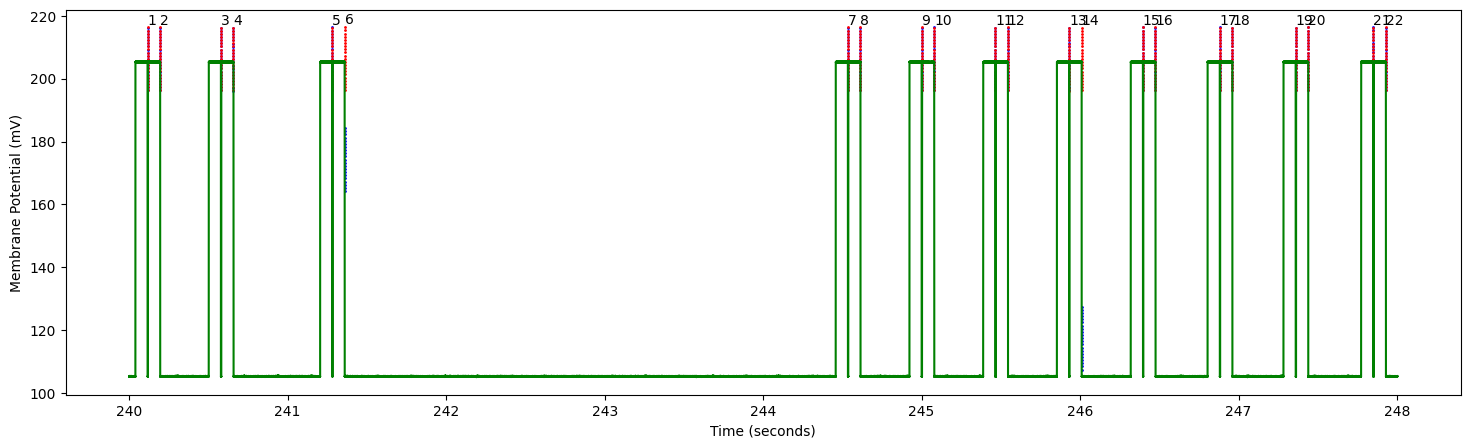

Time: 6200000 ~ 6400050
Close point found: 16
Far point found: 16


Time: 6400000 ~ 6600050
Close point found: 17
Far point found: 17


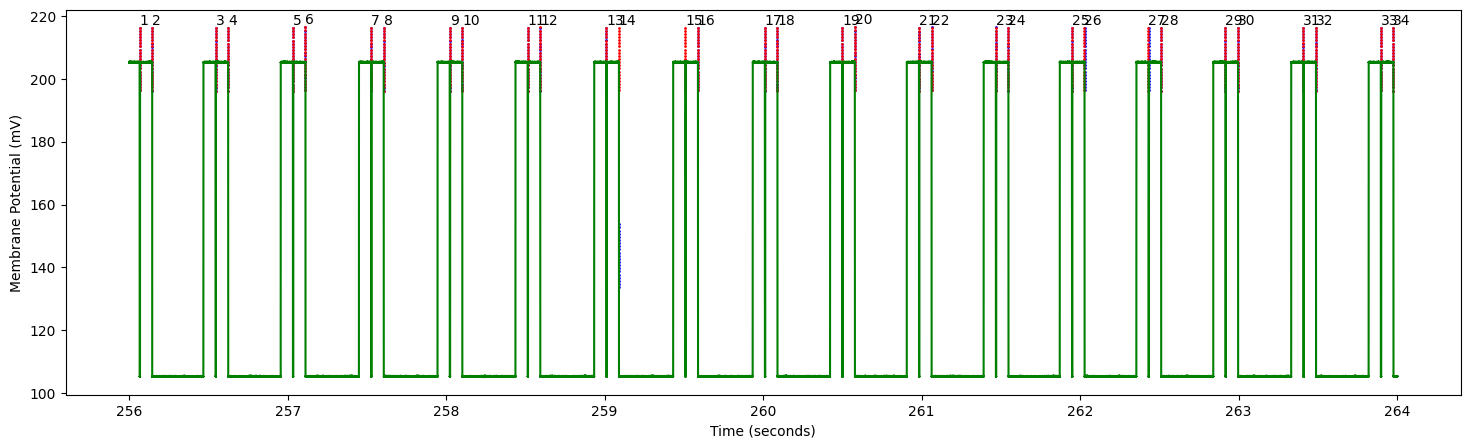

Time: 6600000 ~ 6800050
Close point found: 10
Far point found: 10


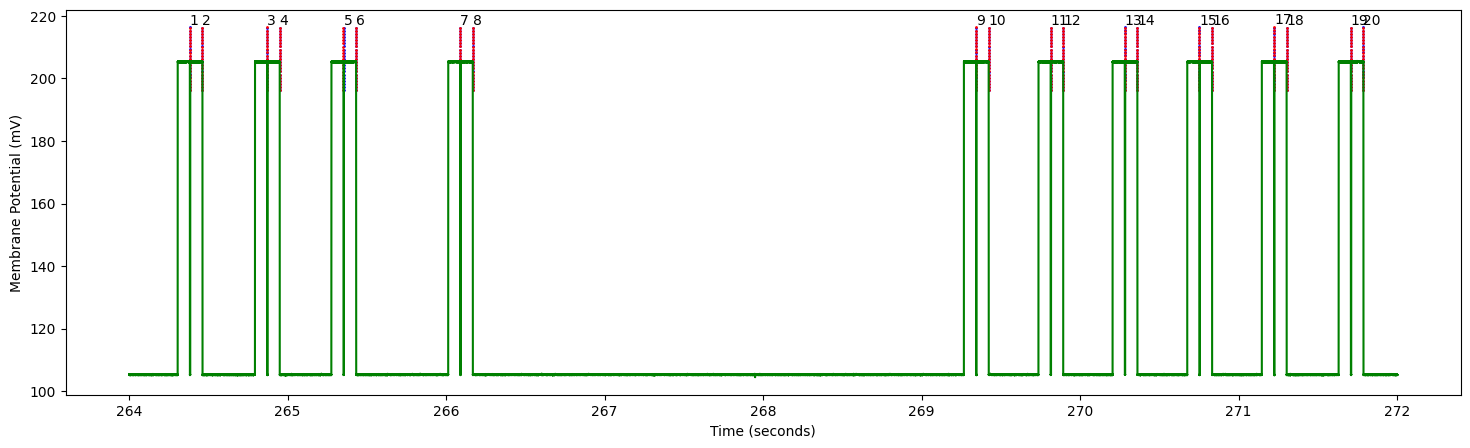

Time: 6800000 ~ 7000050
Close point found: 17
Far point found: 16


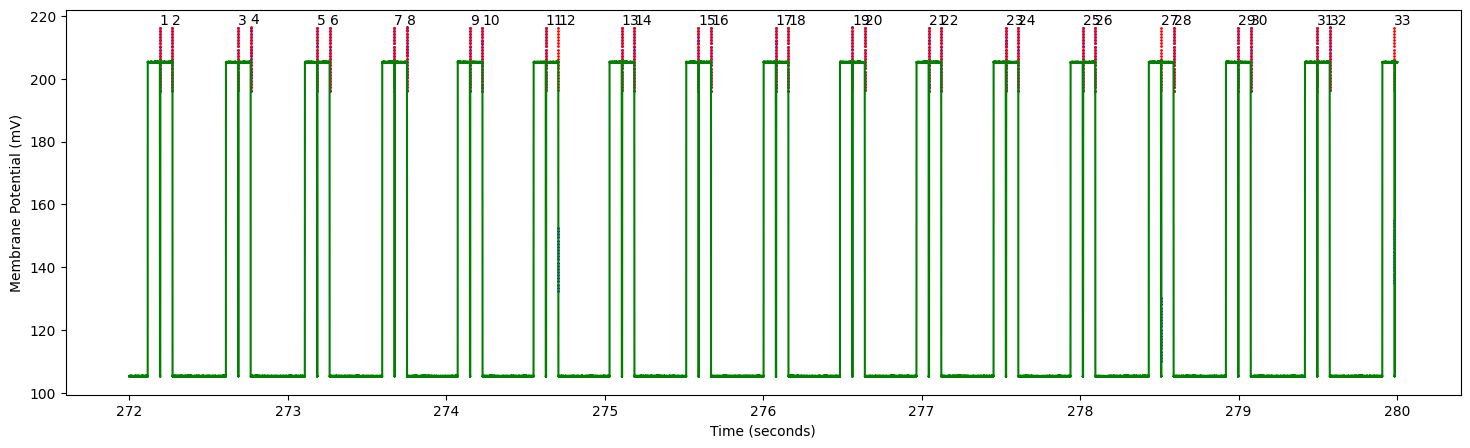

Time: 7000000 ~ 7200050
Close point found: 17
Far point found: 16


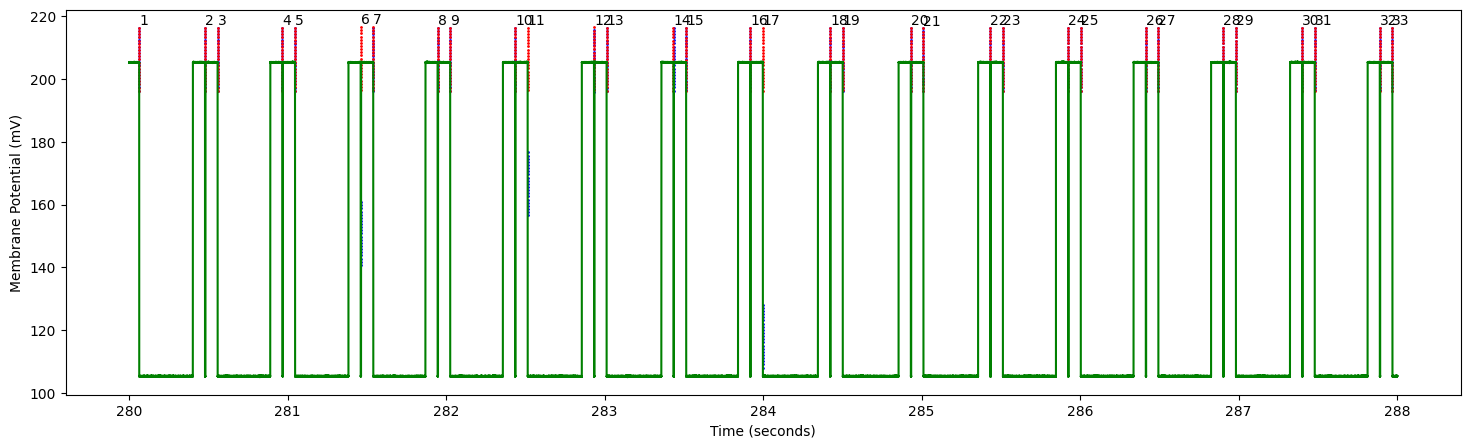

Time: 7200000 ~ 7400050
Close point found: 10
Far point found: 10


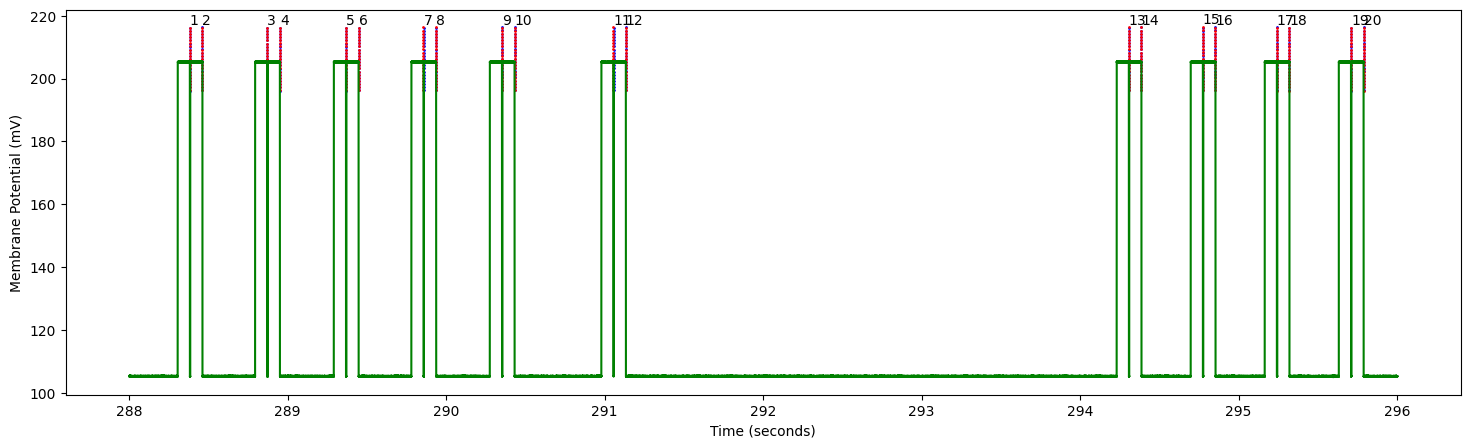

Time: 7400000 ~ 7600050
Close point found: 16
Far point found: 16


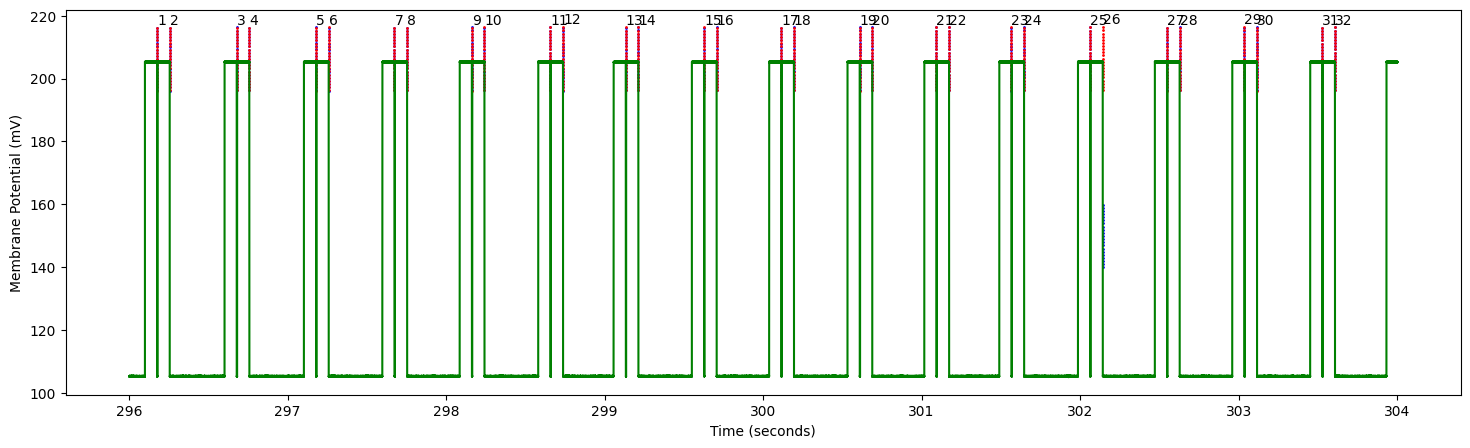

Time: 7600000 ~ 7800050
Close point found: 17
Far point found: 17


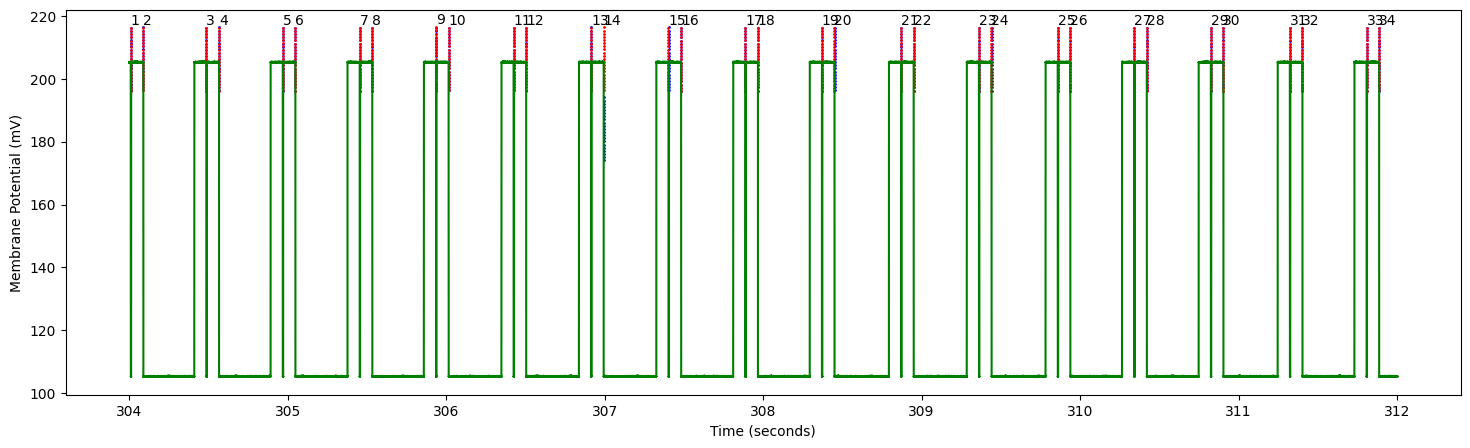

Time: 7800000 ~ 8000050
Close point found: 10
Far point found: 10


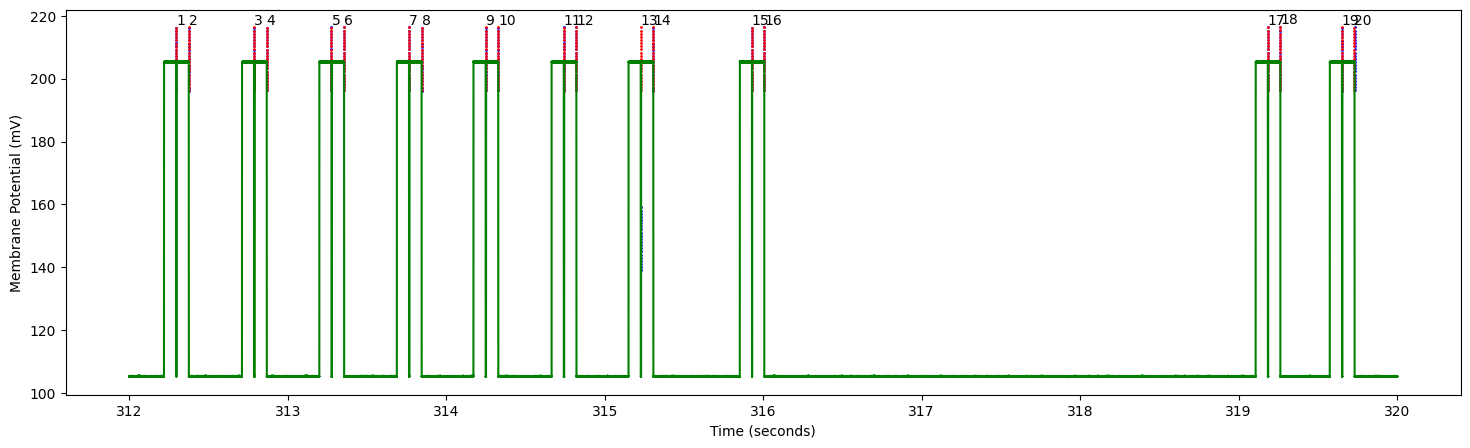

Time: 8000000 ~ 8200050
Close point found: 17
Far point found: 17


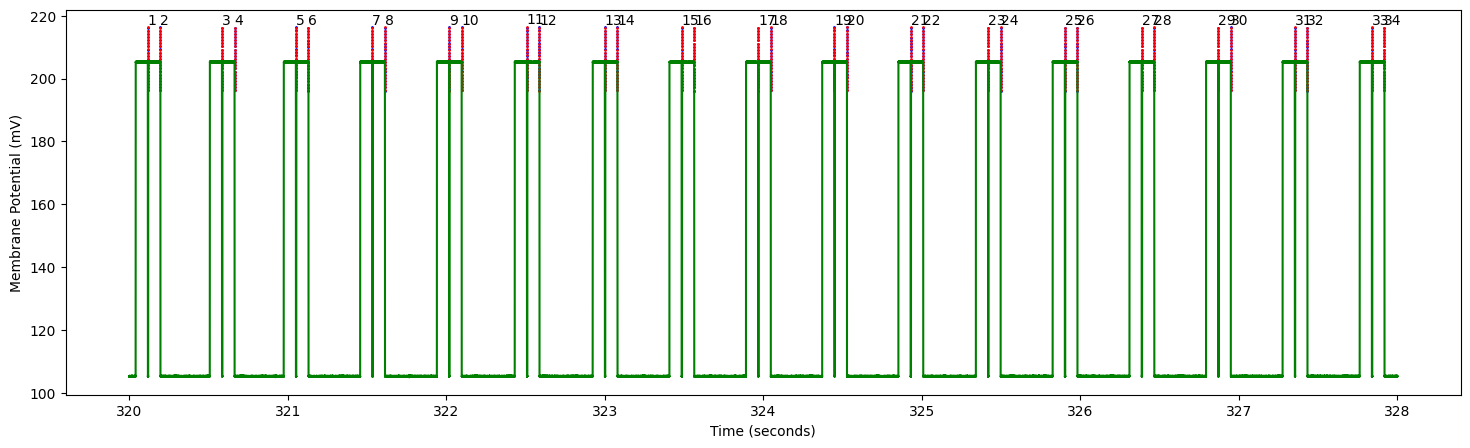

Time: 8200000 ~ 8400050
Close point found: 16
Far point found: 16


Time: 8400000 ~ 8600050
Close point found: 11
Far point found: 11


Time: 8600000 ~ 8800050
Close point found: 16
Far point found: 16


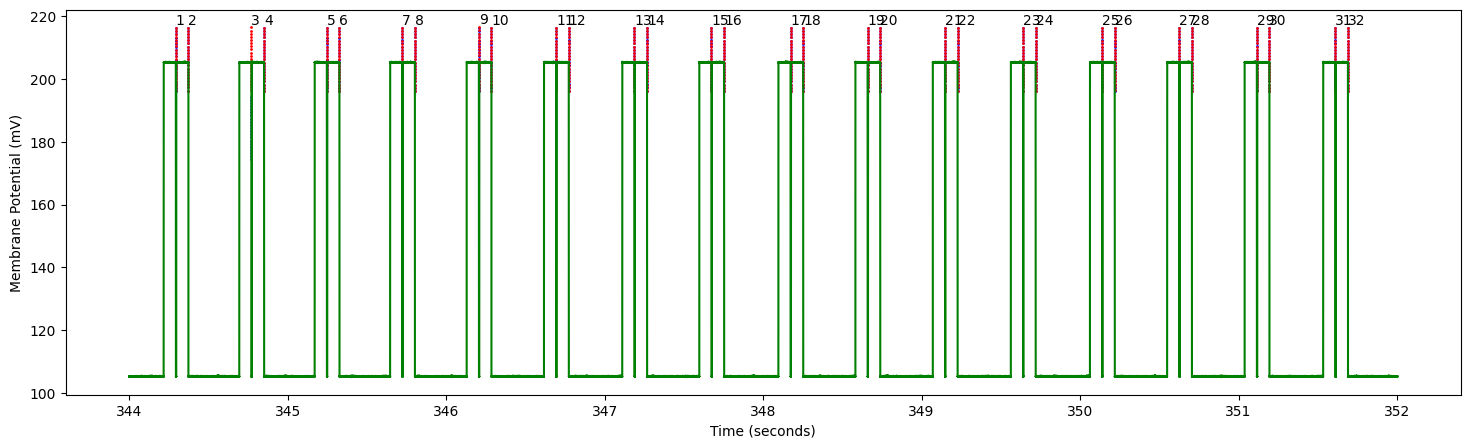

Time: 8800000 ~ 9000050
Close point found: 17
Far point found: 17


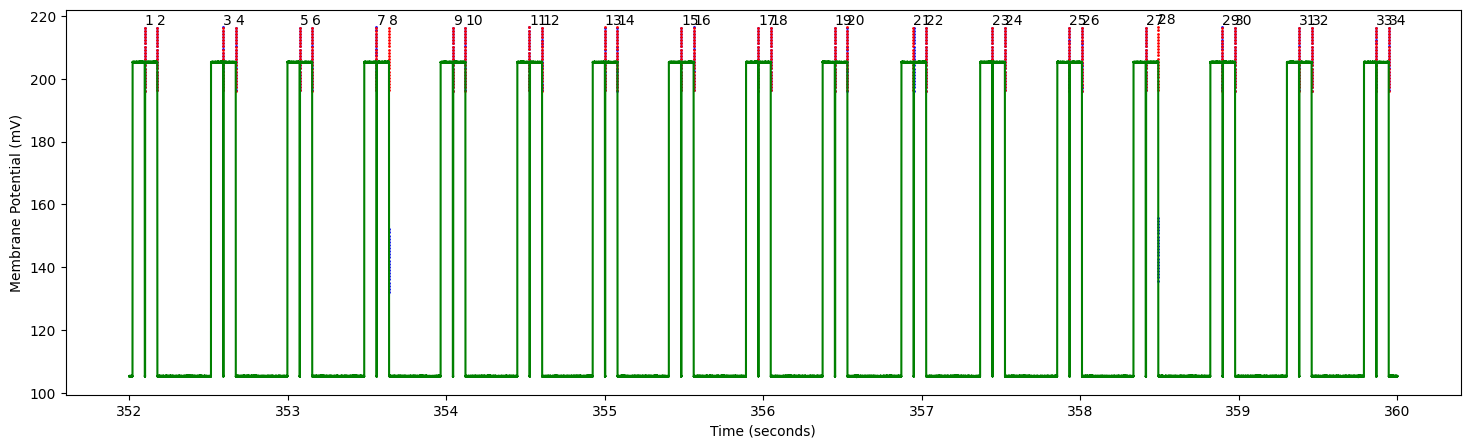

Time: 9000000 ~ 9200050
Close point found: 10
Far point found: 10


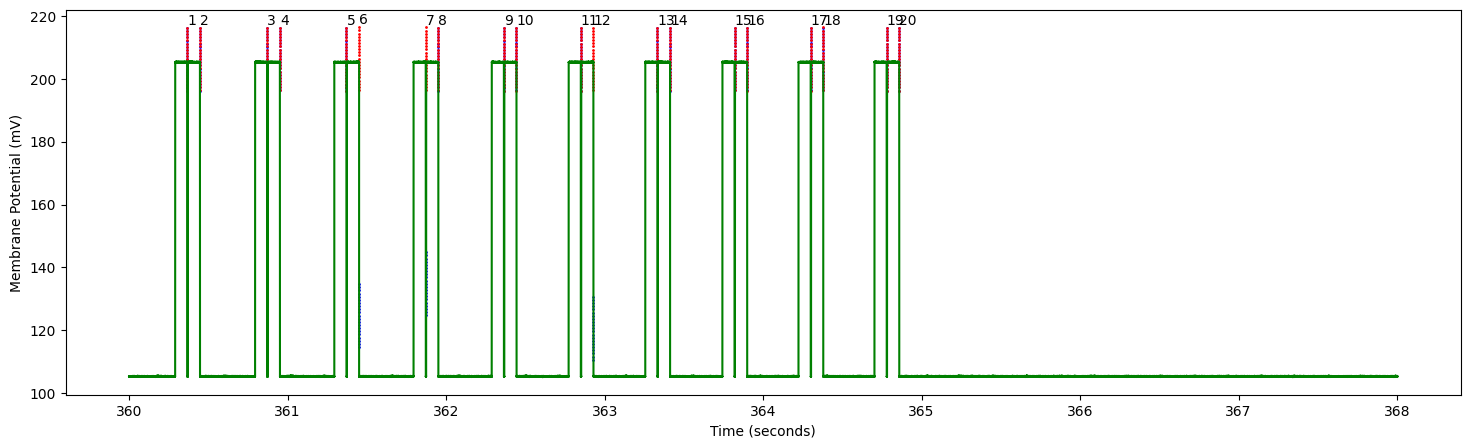

Time: 9200000 ~ 9400050
Close point found: 16
Far point found: 16


Time: 9400000 ~ 9600050
Close point found: 17
Far point found: 16


Time: 9600000 ~ 9800050
Close point found: 14
Far point found: 13


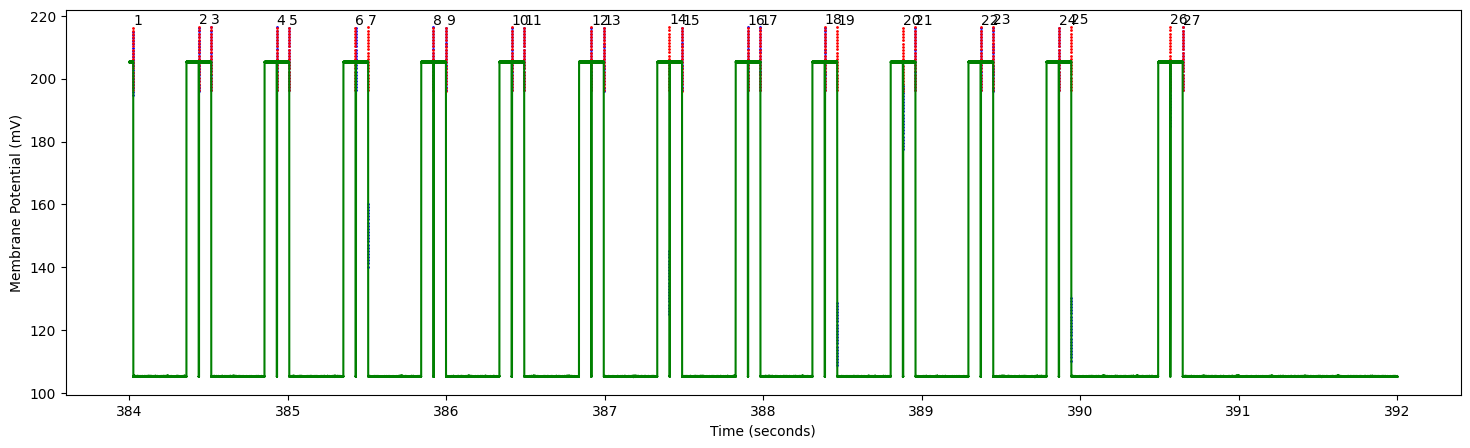

Time: 9800000 ~ 10000050
Close point found: 13
Far point found: 13


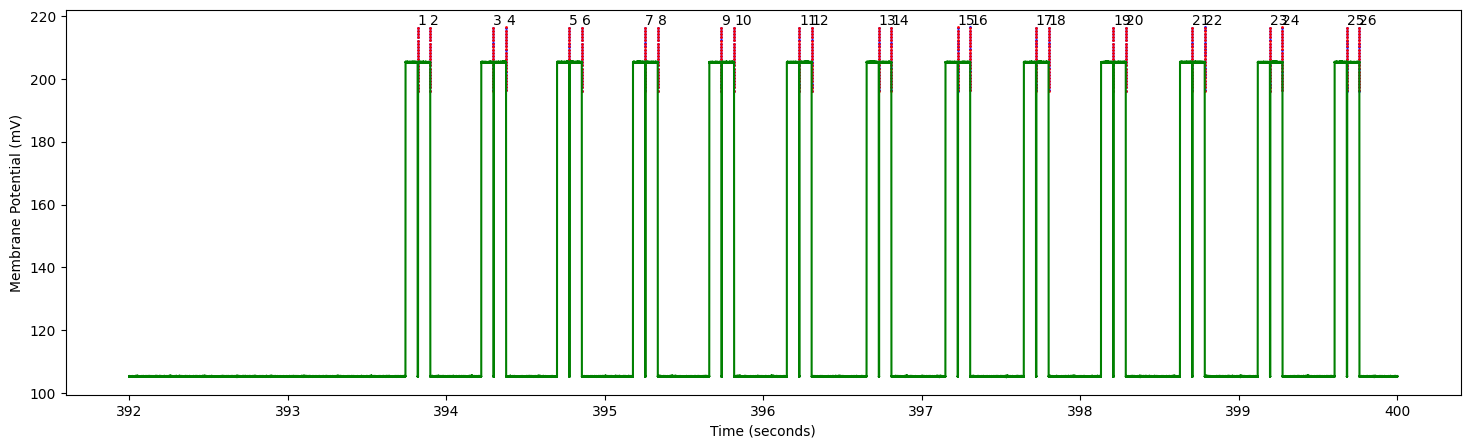

Time: 10000000 ~ 10200050
Close point found: 17
Far point found: 16


Time: 10200000 ~ 10400050
Close point found: 16
Far point found: 16


Time: 10400000 ~ 10600050
Close point found: 11
Far point found: 11


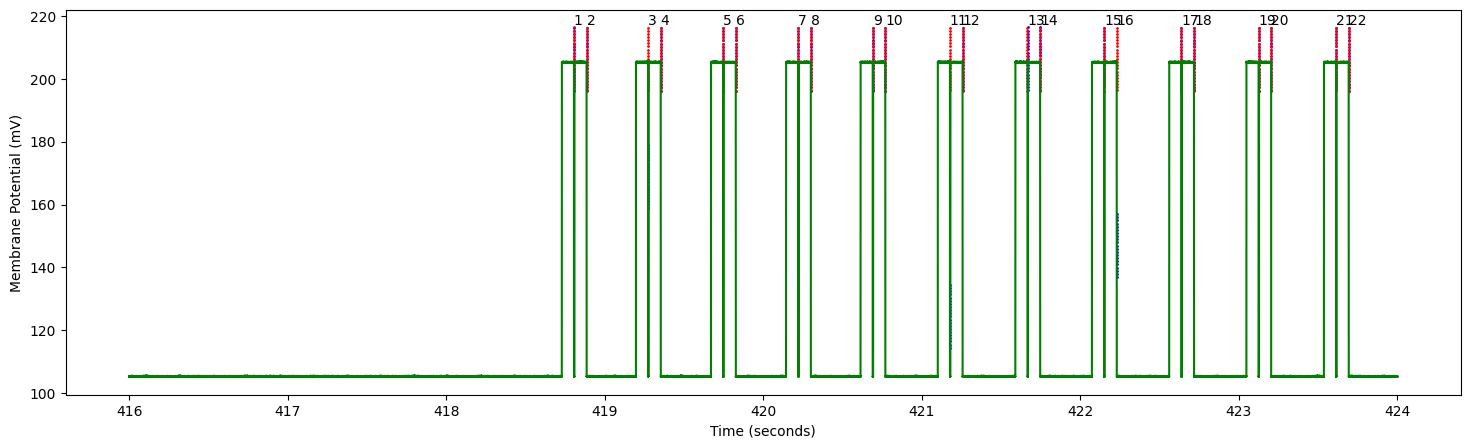

Time: 10600000 ~ 10800050
Close point found: 17
Far point found: 17


Time: 10800000 ~ 11000050
Close point found: 16
Far point found: 16


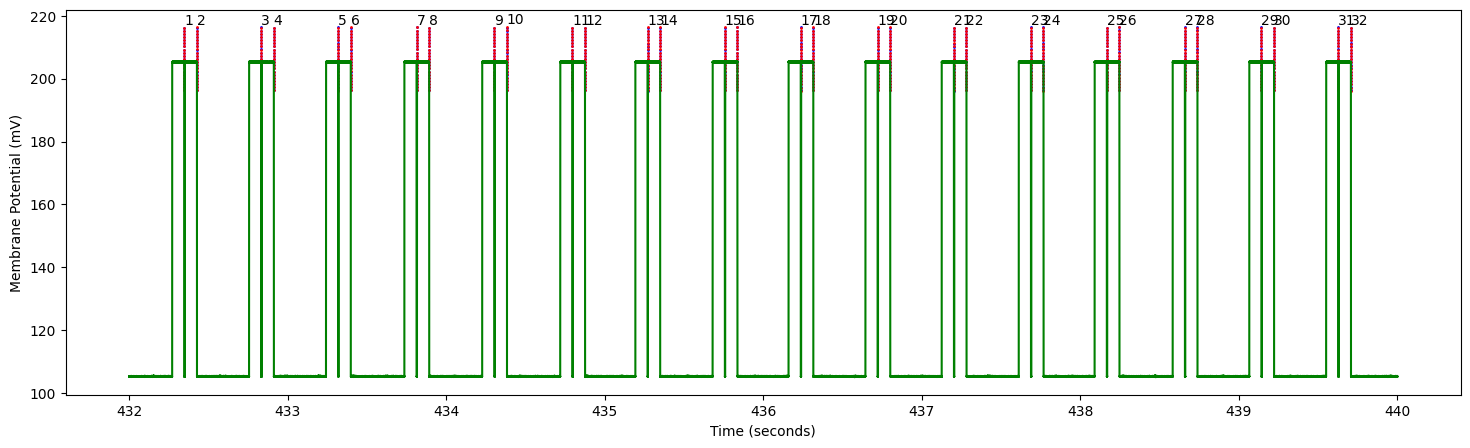

Time: 11000000 ~ 11200050
Close point found: 11
Far point found: 11


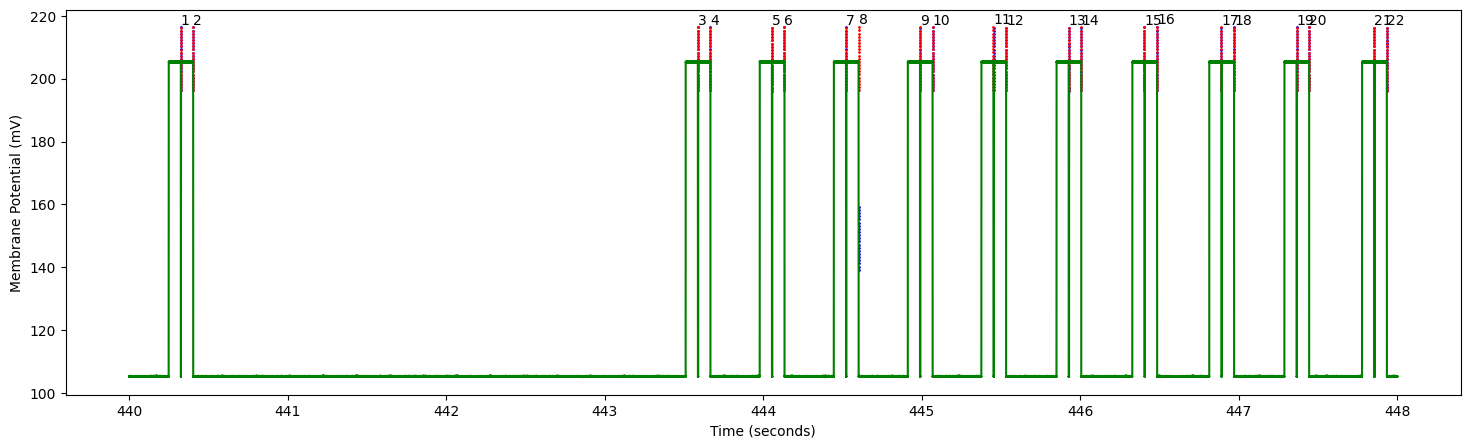

Time: 11200000 ~ 11400050
Close point found: 16
Far point found: 16


Time: 11400000 ~ 11600050
Close point found: 17
Far point found: 17


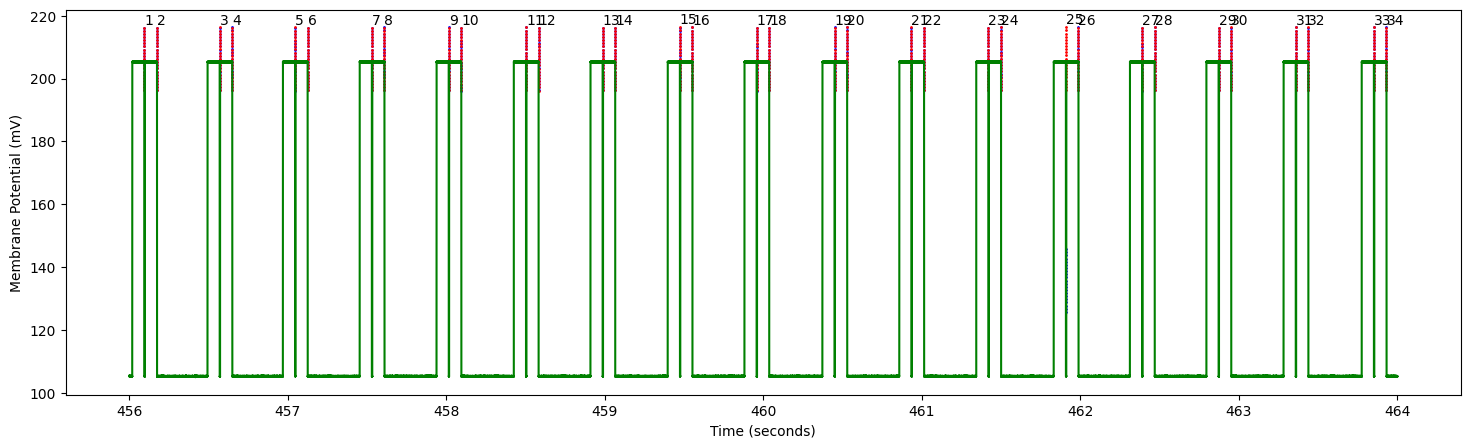

Time: 11600000 ~ 11800050
Close point found: 10
Far point found: 10


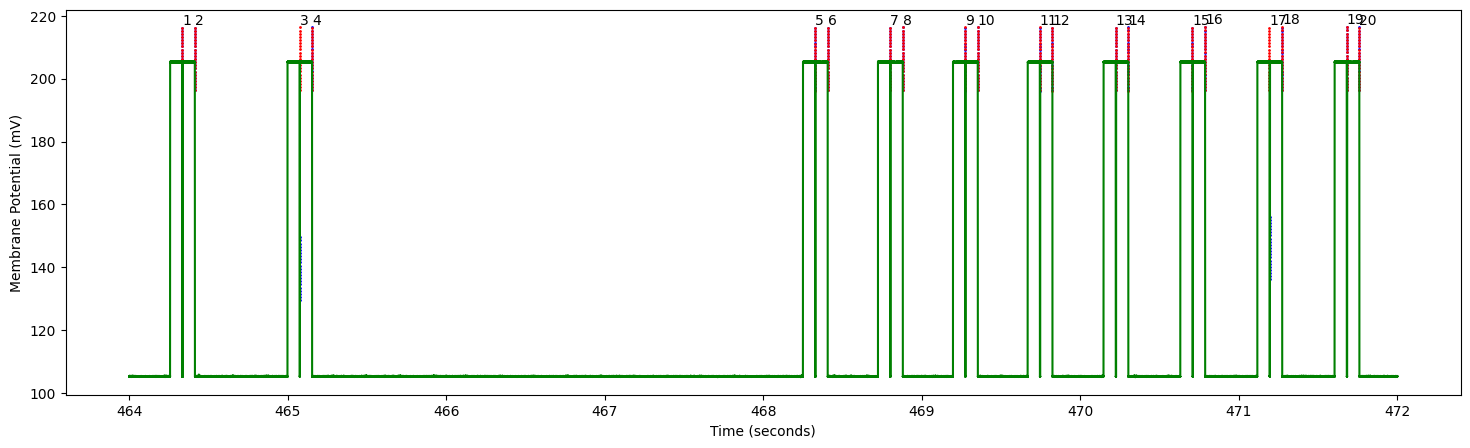

Time: 11800000 ~ 12000050
Close point found: 17
Far point found: 16


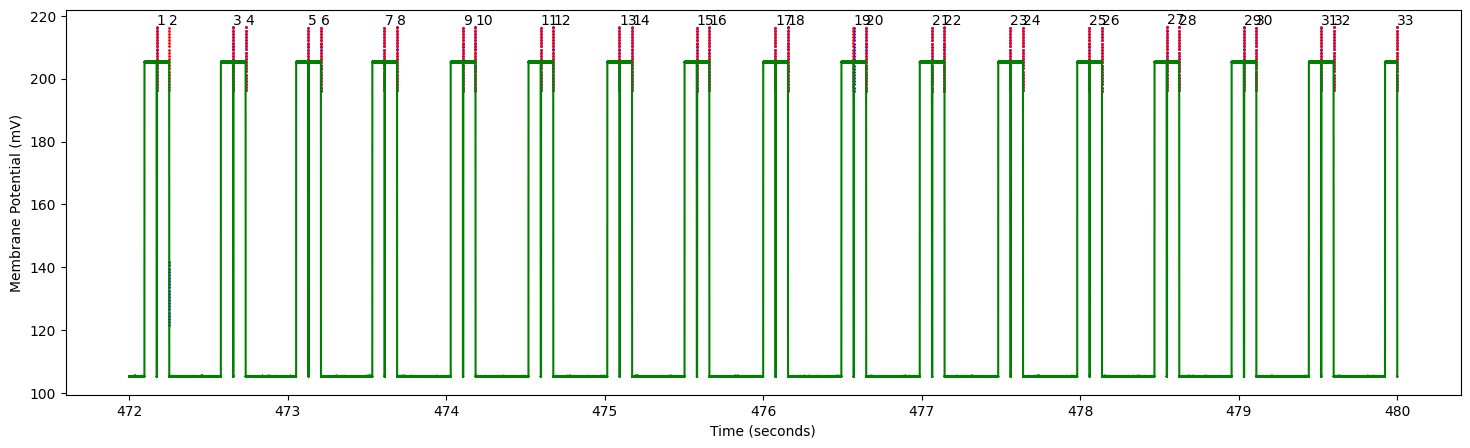

Time: 12000000 ~ 12200050
Close point found: 17
Far point found: 17


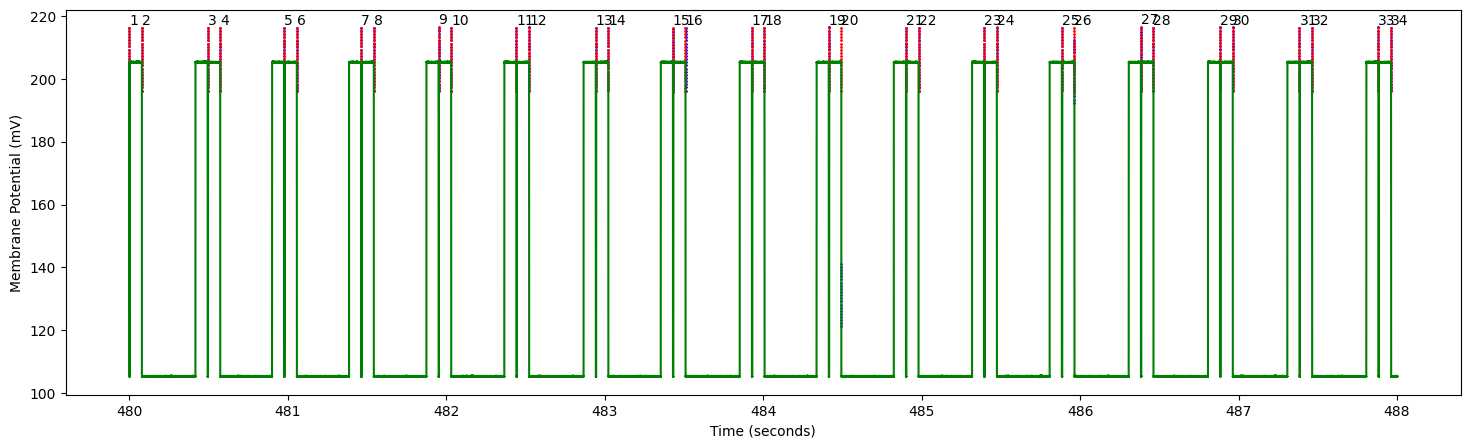

Time: 12200000 ~ 12400050
Close point found: 10
Far point found: 10


Time: 12400000 ~ 12600050
Close point found: 17
Far point found: 17


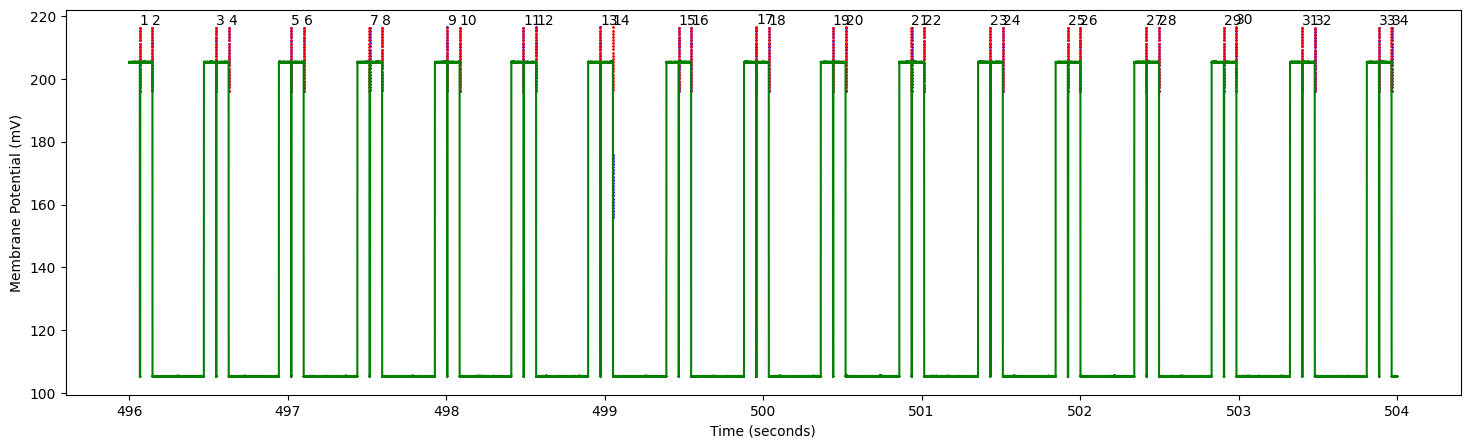

Time: 12600000 ~ 12800050
Close point found: 16
Far point found: 16


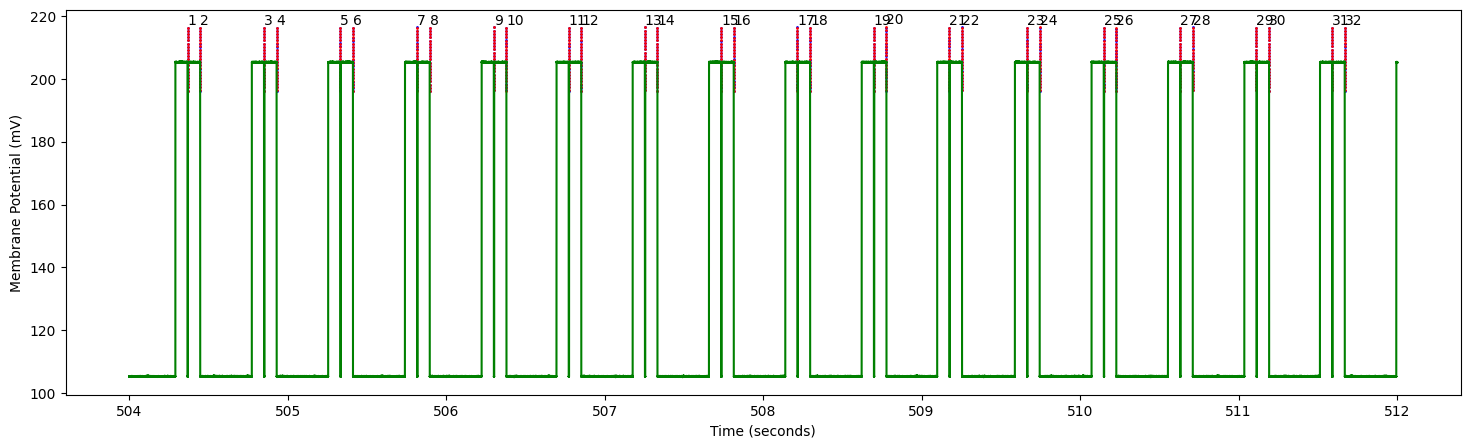

Time: 12800000 ~ 13000050
Close point found: 11
Far point found: 11


Time: 13000000 ~ 13200050
Close point found: 16
Far point found: 16


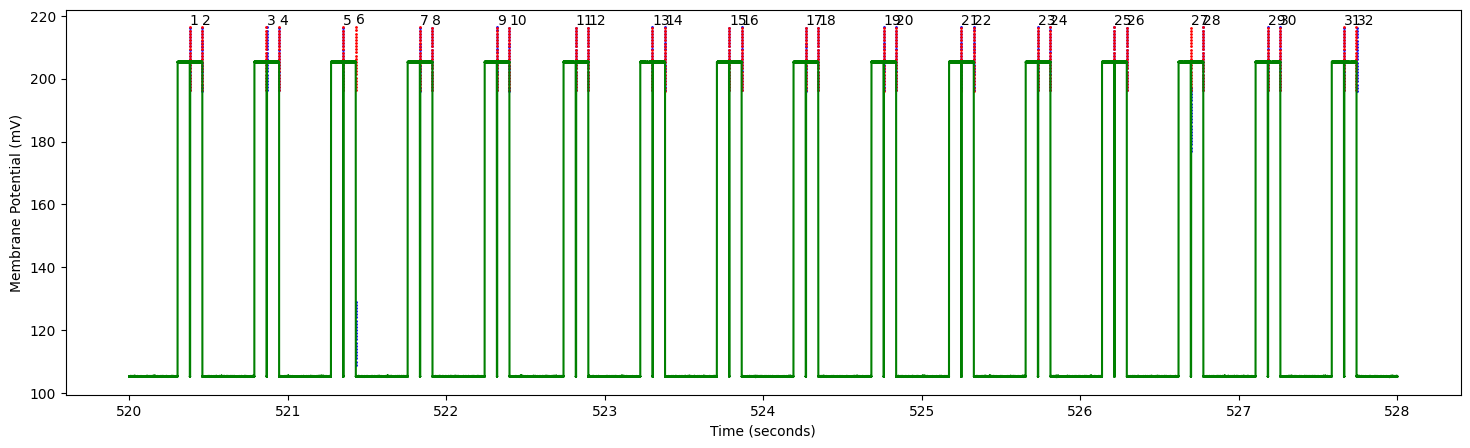

Time: 13200000 ~ 13400050
Close point found: 17
Far point found: 16


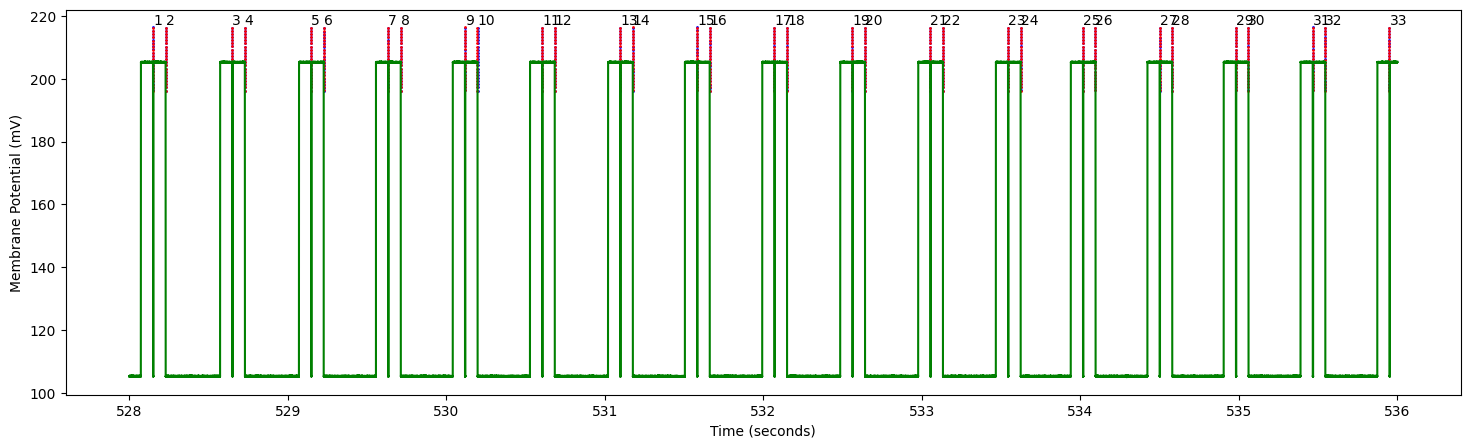

Time: 13400000 ~ 13600050
Close point found: 11
Far point found: 10


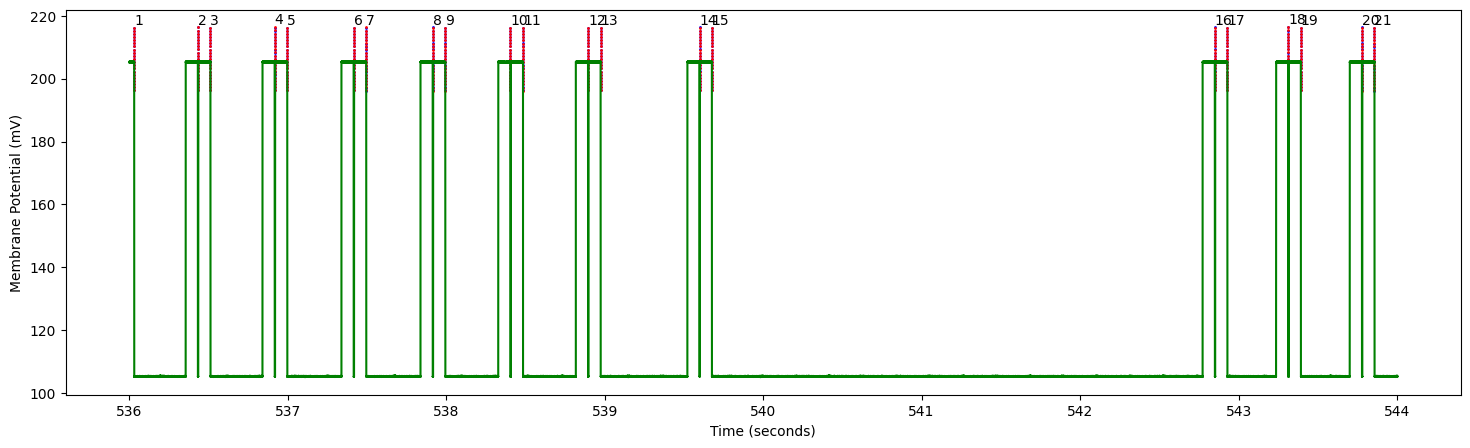

Time: 13600000 ~ 13800050
Close point found: 16
Far point found: 16


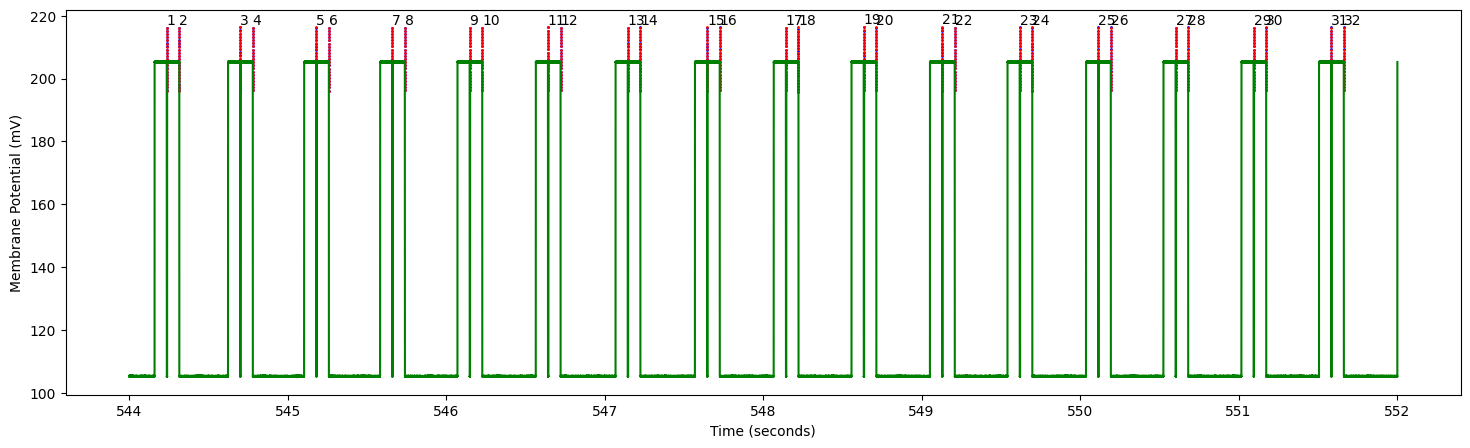

Time: 13800000 ~ 14000050
Close point found: 17
Far point found: 16


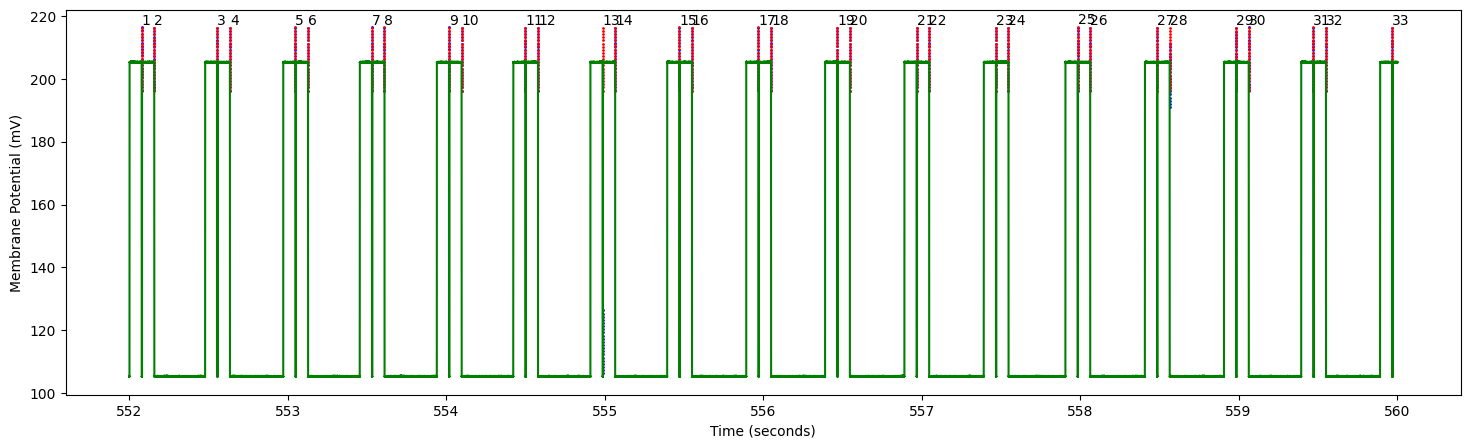

Time: 14000000 ~ 14200050
Close point found: 11
Far point found: 10


Time: 14200000 ~ 14400050
Close point found: 16
Far point found: 16


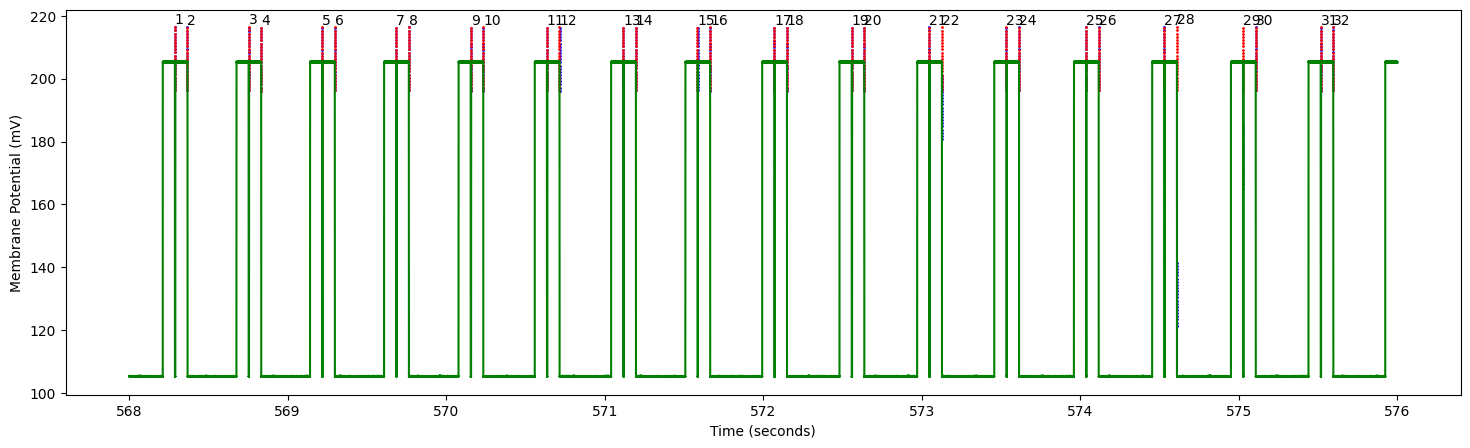

Time: 14400000 ~ 14600050
Close point found: 17
Far point found: 17


Time: 14600000 ~ 14800050
Close point found: 10
Far point found: 10


Time: 14800000 ~ 15000050
Close point found: 16
Far point found: 16


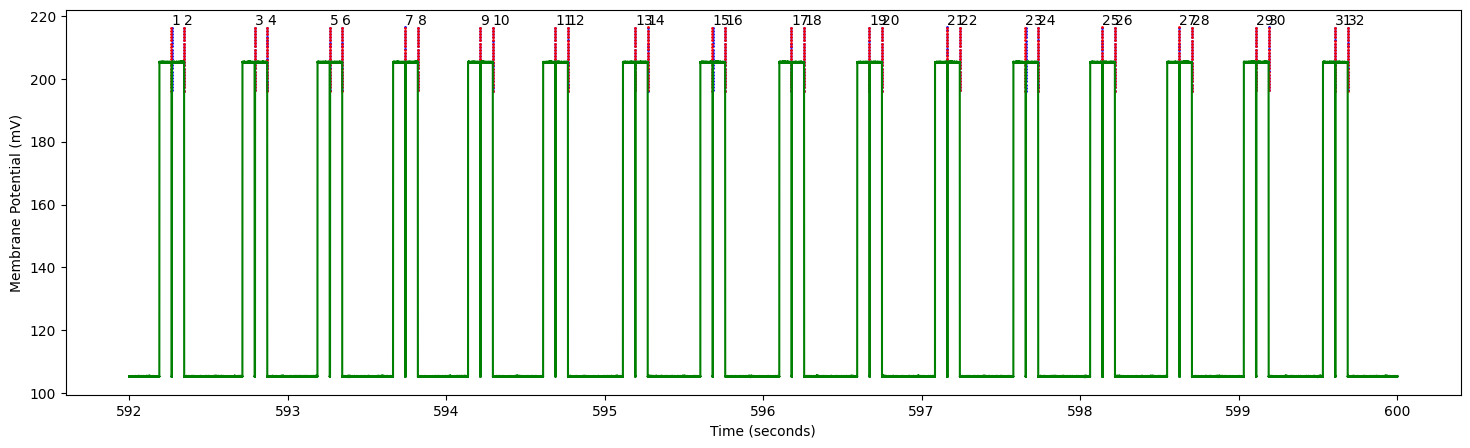

Time: 15000000 ~ 15200050
Close point found: 17
Far point found: 17


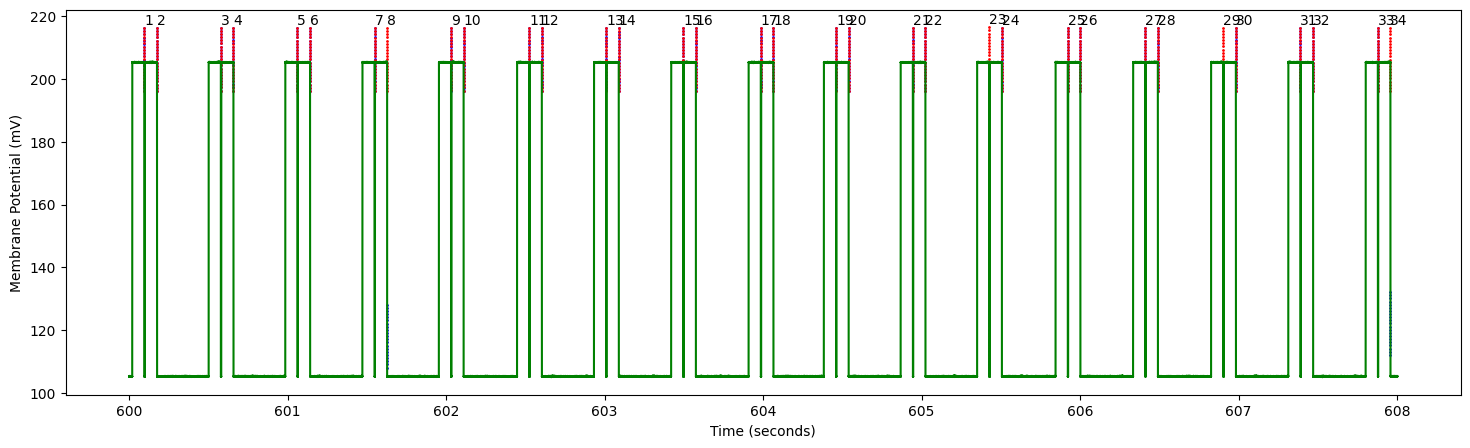

Time: 15200000 ~ 15400050
Close point found: 13
Far point found: 13


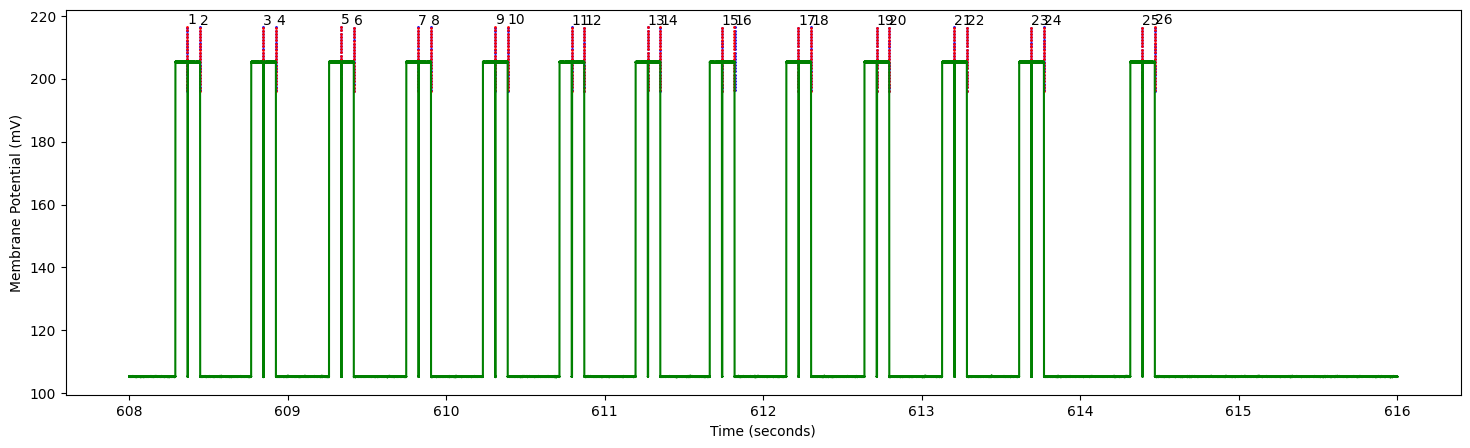

Time: 15400000 ~ 15600050
Close point found: 14
Far point found: 13


Time: 15600000 ~ 15800050
Close point found: 17
Far point found: 16


Time: 15800000 ~ 16000050
Close point found: 14
Far point found: 14


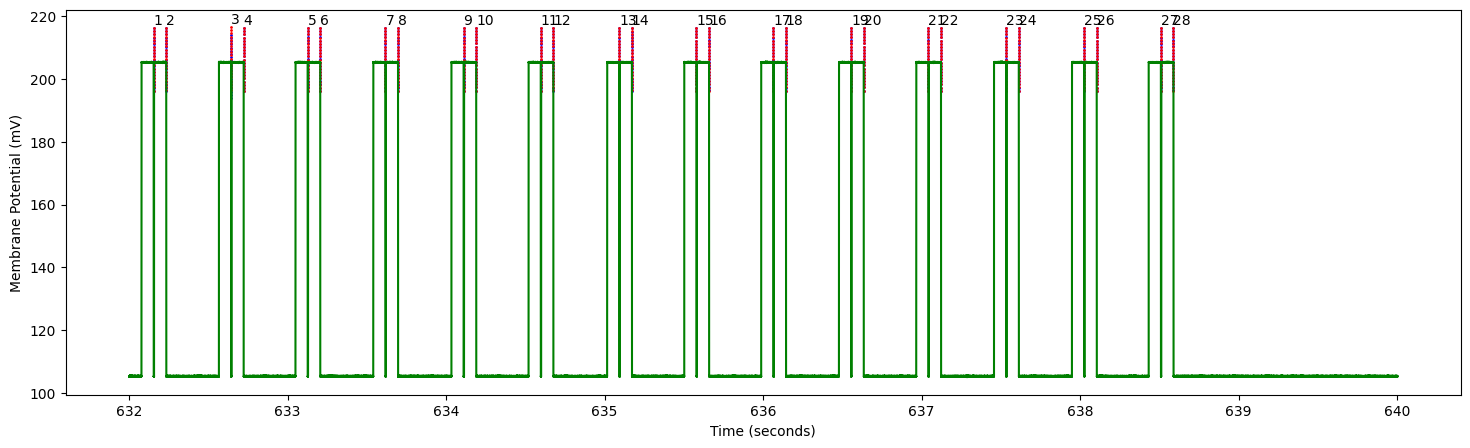

Time: 16000000 ~ 16200050
Close point found: 13
Far point found: 12


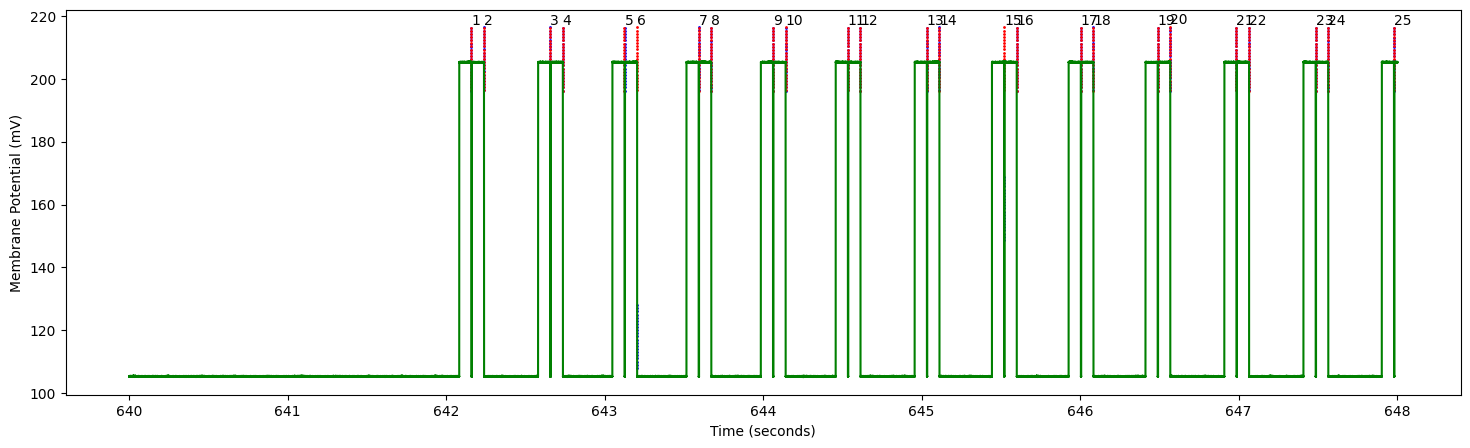

Time: 16200000 ~ 16400050
Close point found: 17
Far point found: 16


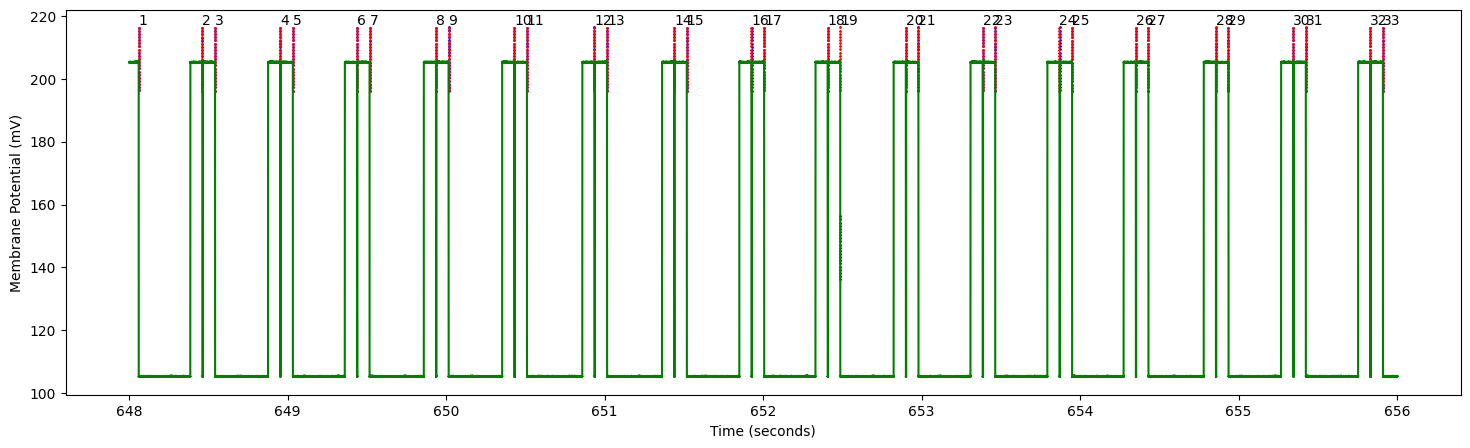

Time: 16400000 ~ 16600050
Close point found: 16
Far point found: 16


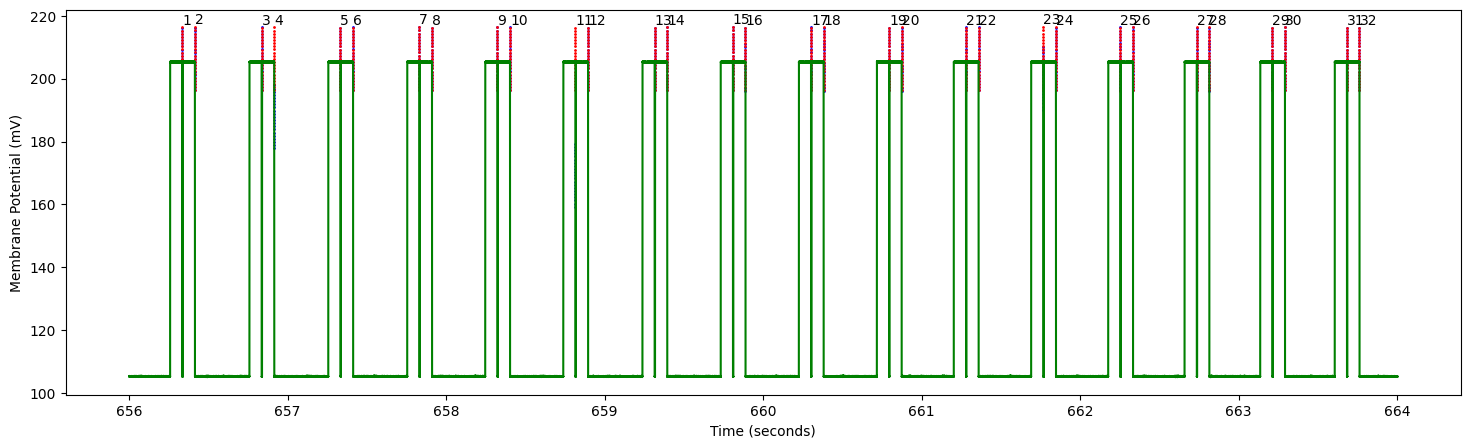

Time: 16600000 ~ 16800050
Close point found: 11
Far point found: 11


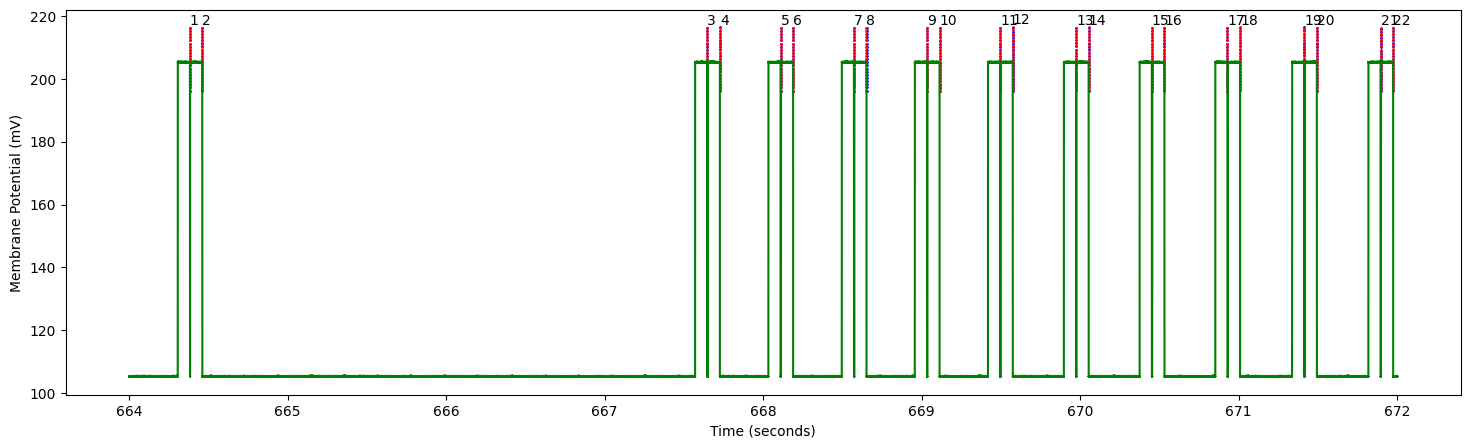

Time: 16800000 ~ 17000050
Close point found: 16
Far point found: 16


Time: 17000000 ~ 17200050
Close point found: 16
Far point found: 16


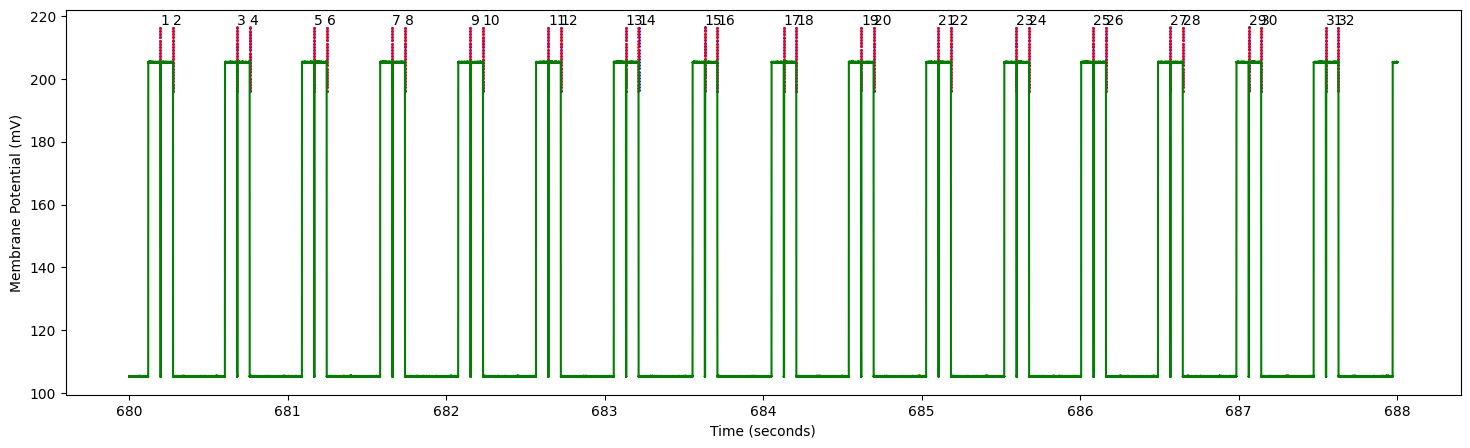

Time: 17200000 ~ 17400050
Close point found: 11
Far point found: 11


Time: 17400000 ~ 17600050
Close point found: 16
Far point found: 16


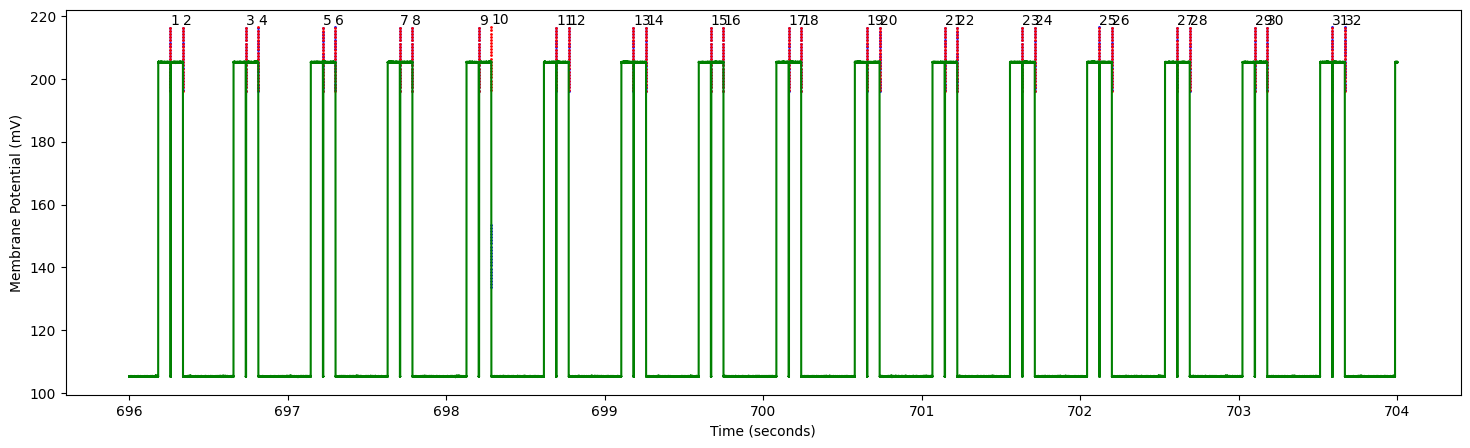

Time: 17600000 ~ 17800050
Close point found: 17
Far point found: 16


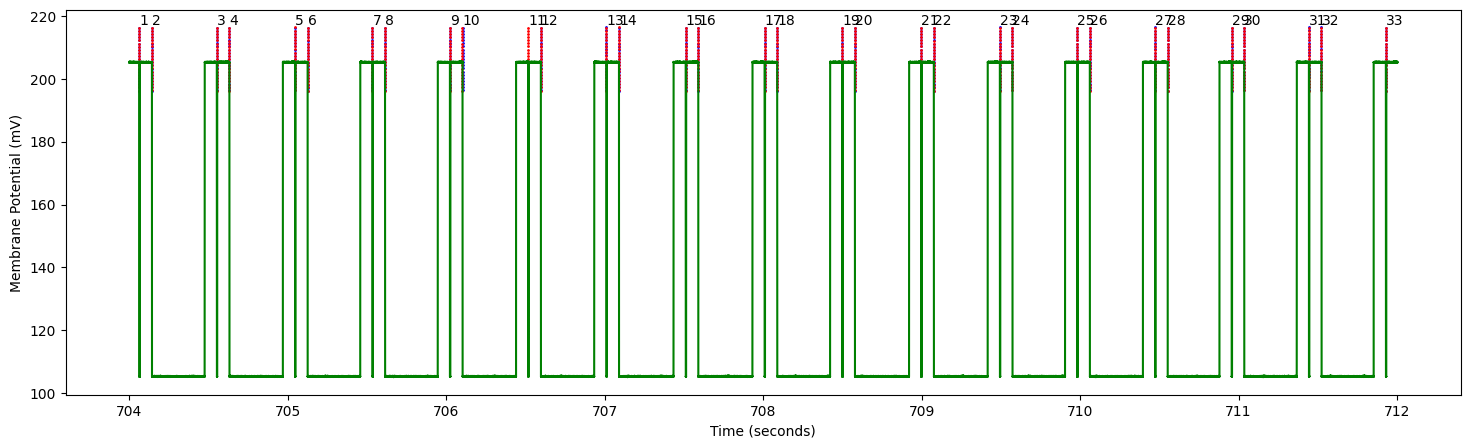

Time: 17800000 ~ 18000050
Close point found: 11
Far point found: 10


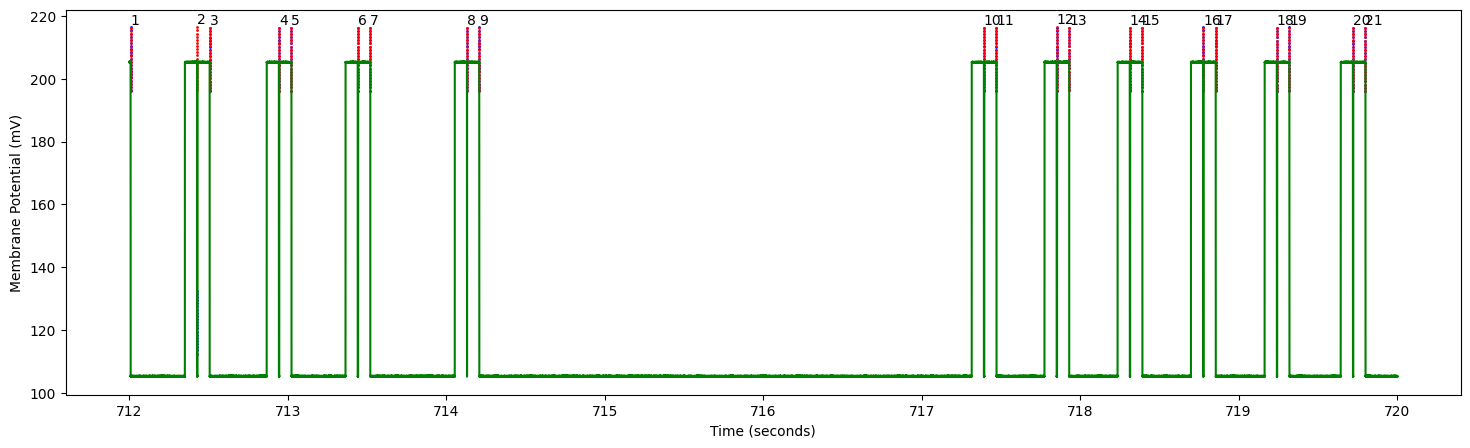

Time: 18000000 ~ 18200050
Close point found: 16
Far point found: 16


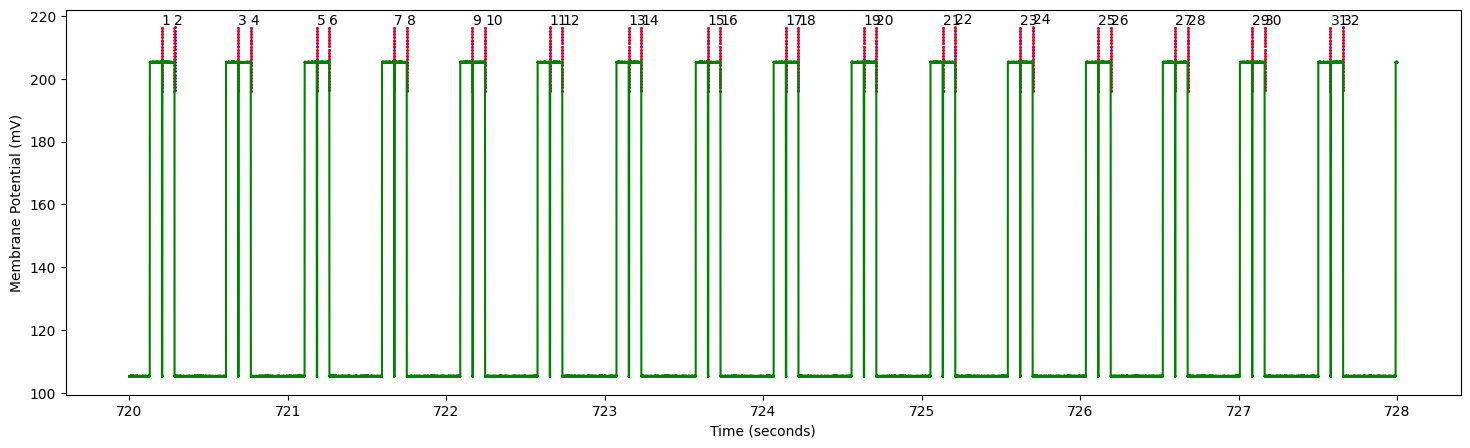

Time: 18200000 ~ 18400050
Close point found: 17
Far point found: 17


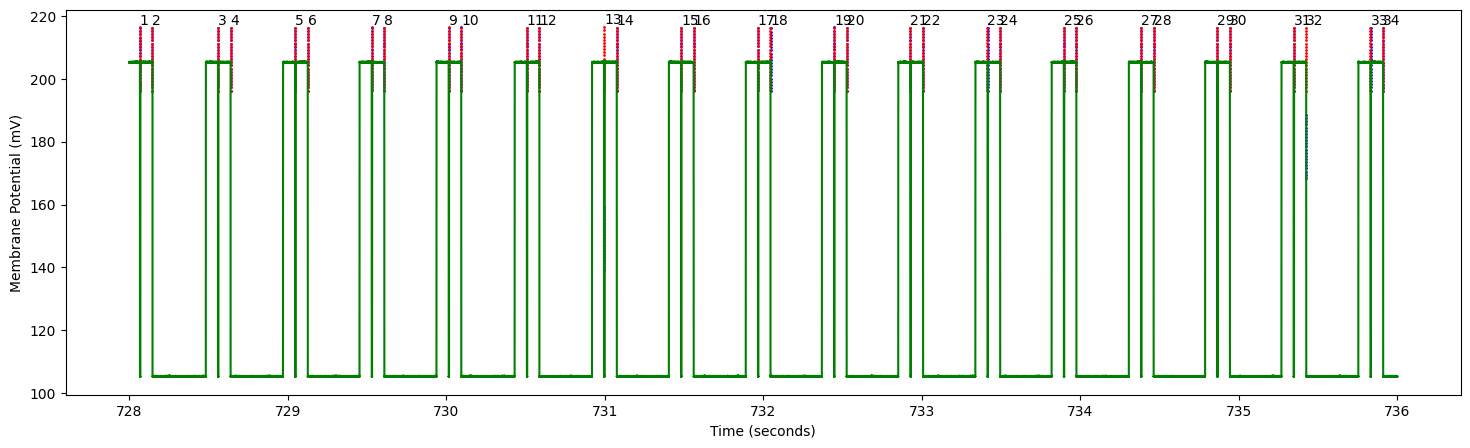

Time: 18400000 ~ 18600050
Close point found: 10
Far point found: 10


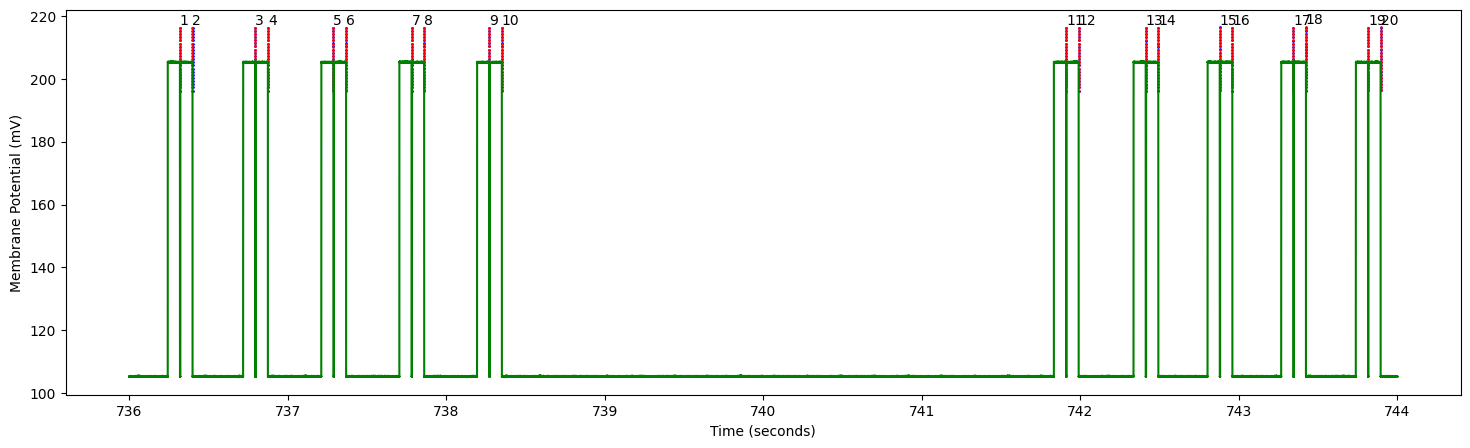

Time: 18600000 ~ 18800050
Close point found: 16
Far point found: 16


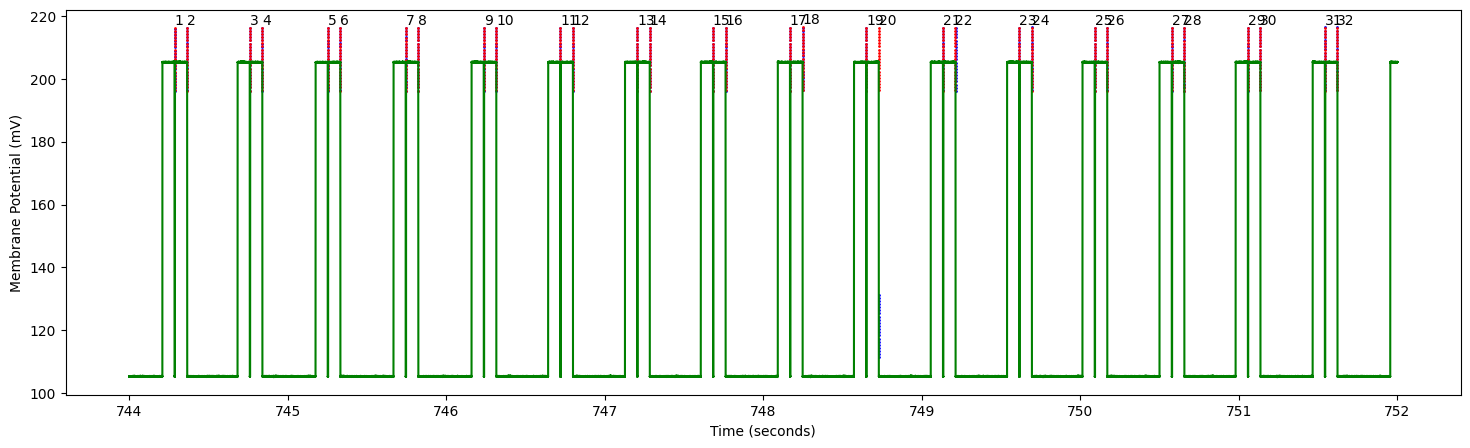

Time: 18800000 ~ 19000050
Close point found: 17
Far point found: 17


Time: 19000000 ~ 19200050
Close point found: 10
Far point found: 10


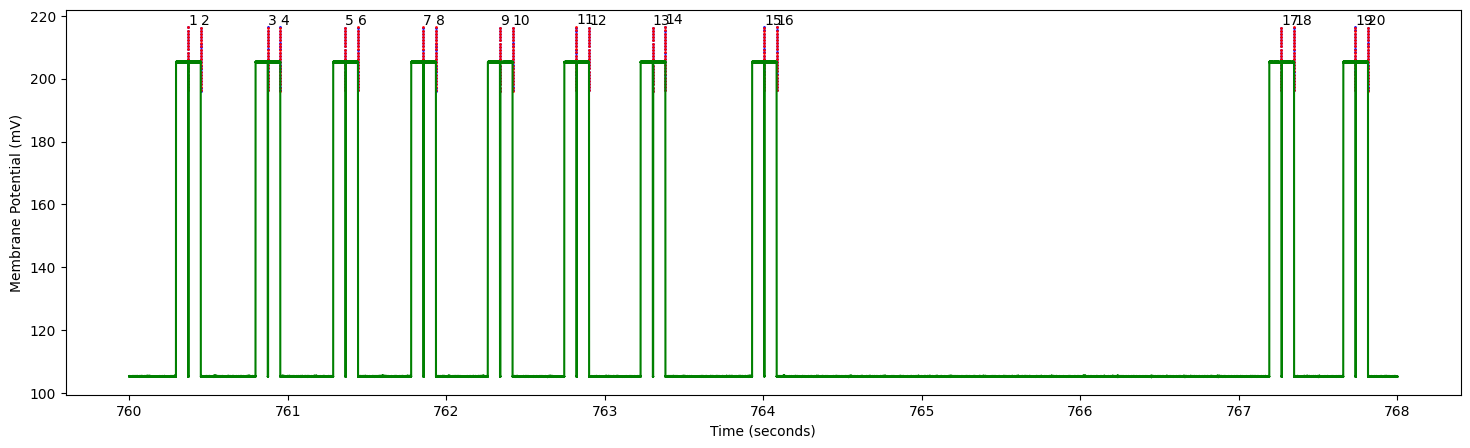

Time: 19200000 ~ 19400050
Close point found: 17
Far point found: 16


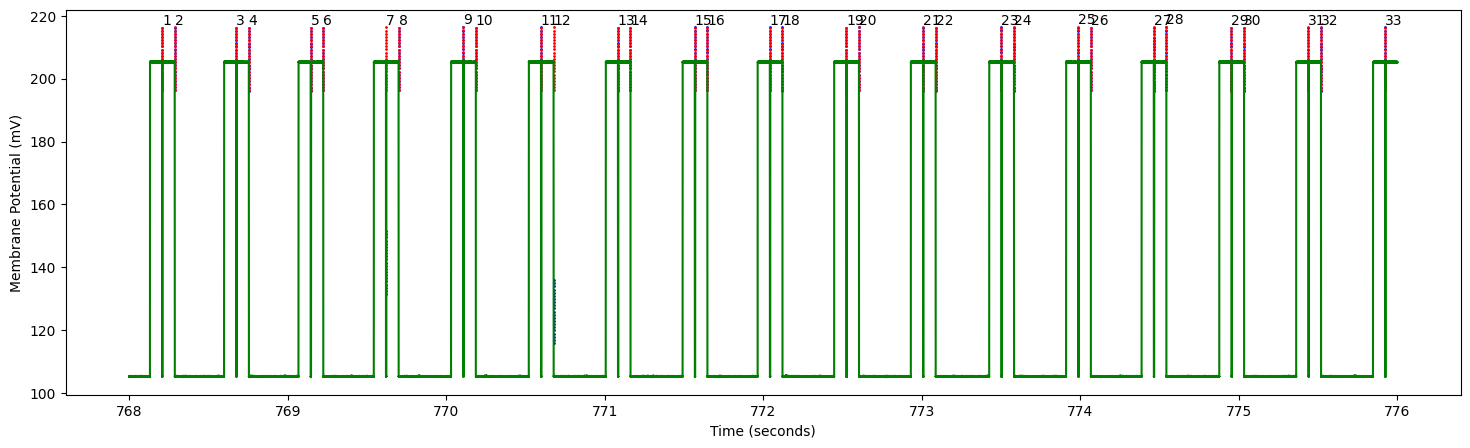

Time: 19400000 ~ 19600050
Close point found: 17
Far point found: 16


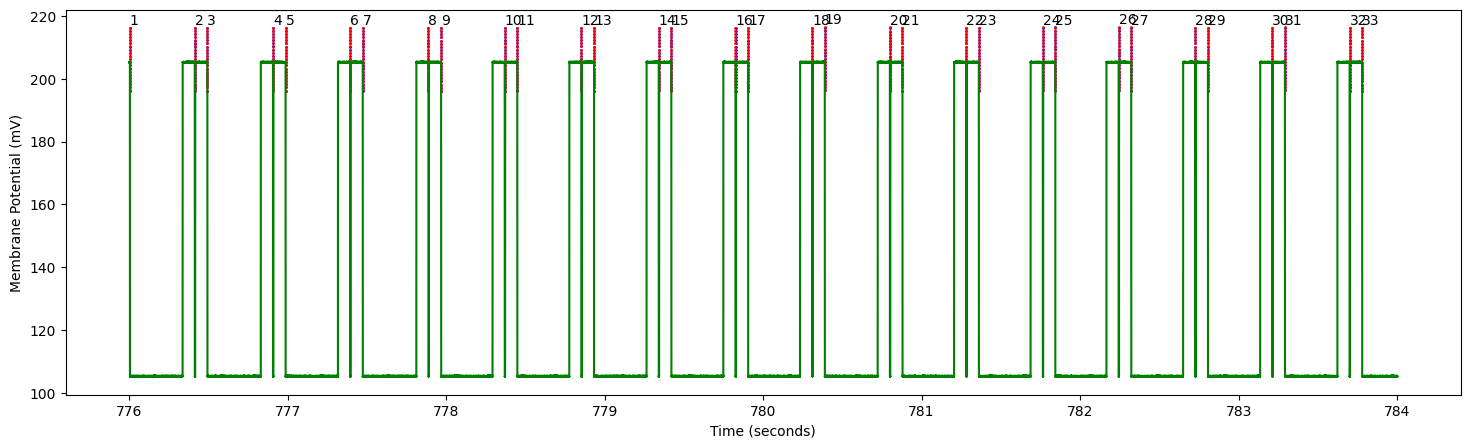

Time: 19600000 ~ 19800050
Close point found: 10
Far point found: 10


Time: 19800000 ~ 20000050
Close point found: 17
Far point found: 17


Time: 20000000 ~ 20200050
Close point found: 16
Far point found: 16


Time: 20200000 ~ 20400050
Close point found: 11
Far point found: 11


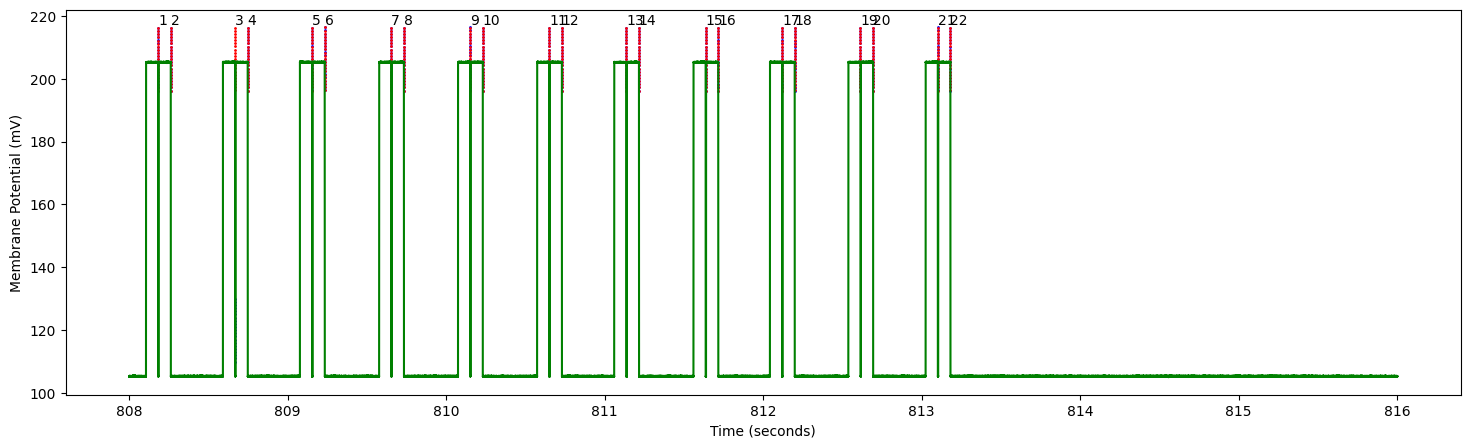

Time: 20400000 ~ 20600050
Close point found: 16
Far point found: 15


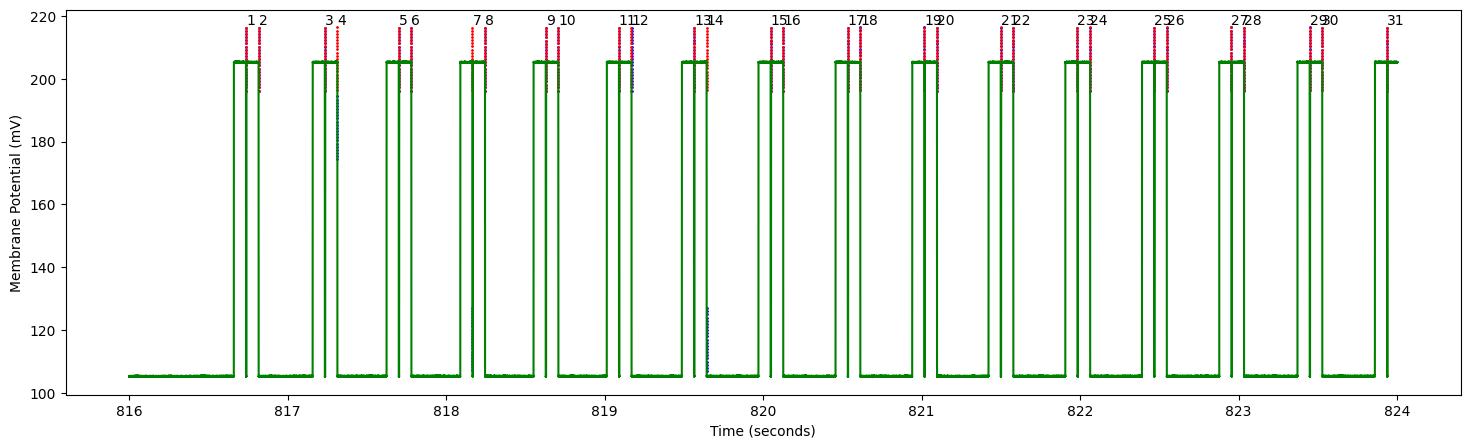

Time: 20600000 ~ 20800050
Close point found: 17
Far point found: 16


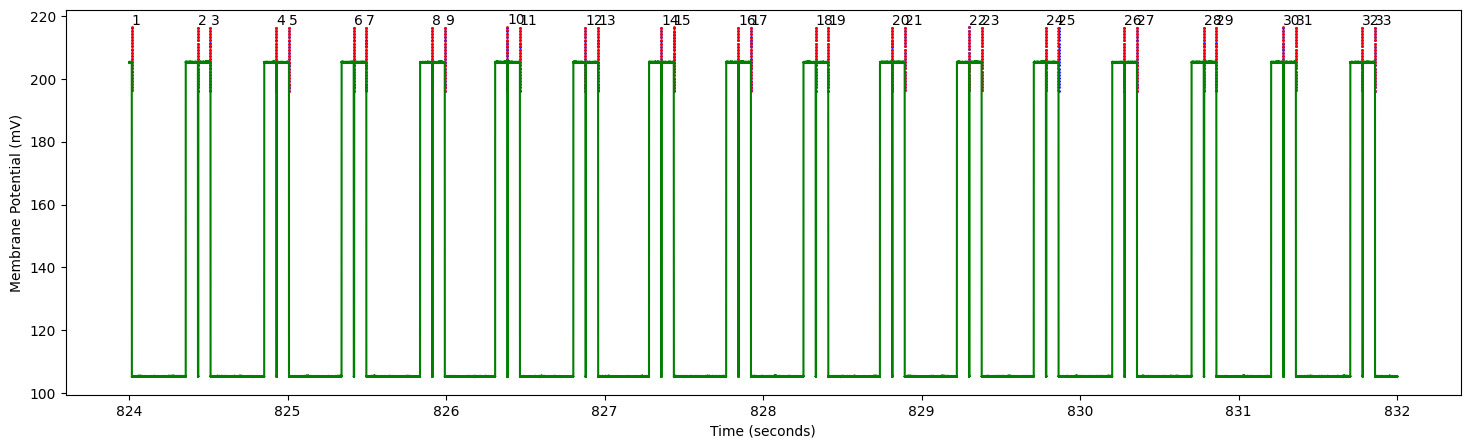

Time: 20800000 ~ 21000050
Close point found: 13
Far point found: 13


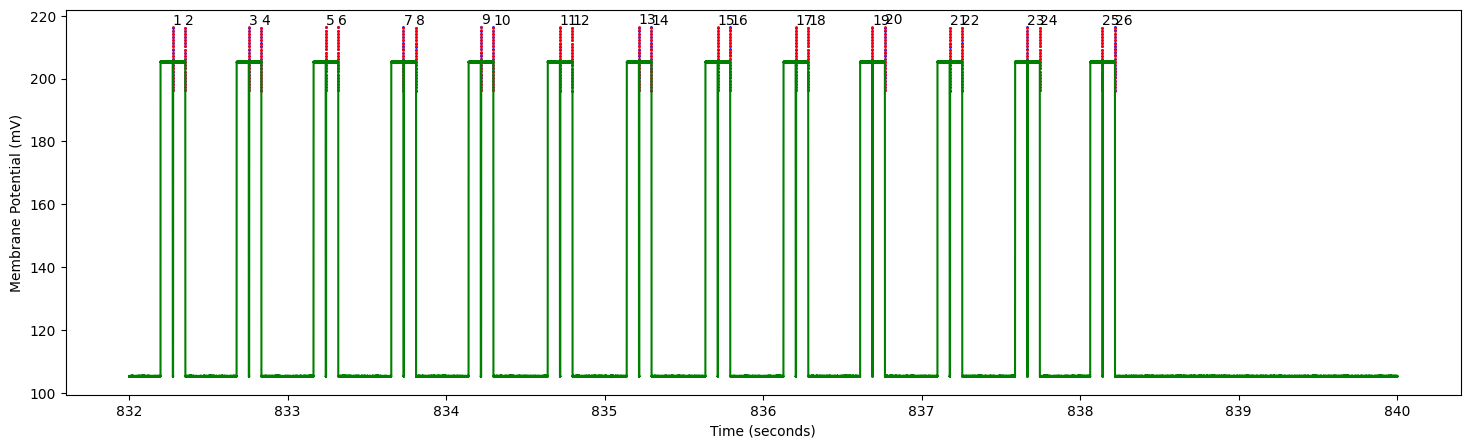

Time: 21000000 ~ 21200050
Close point found: 13
Far point found: 13


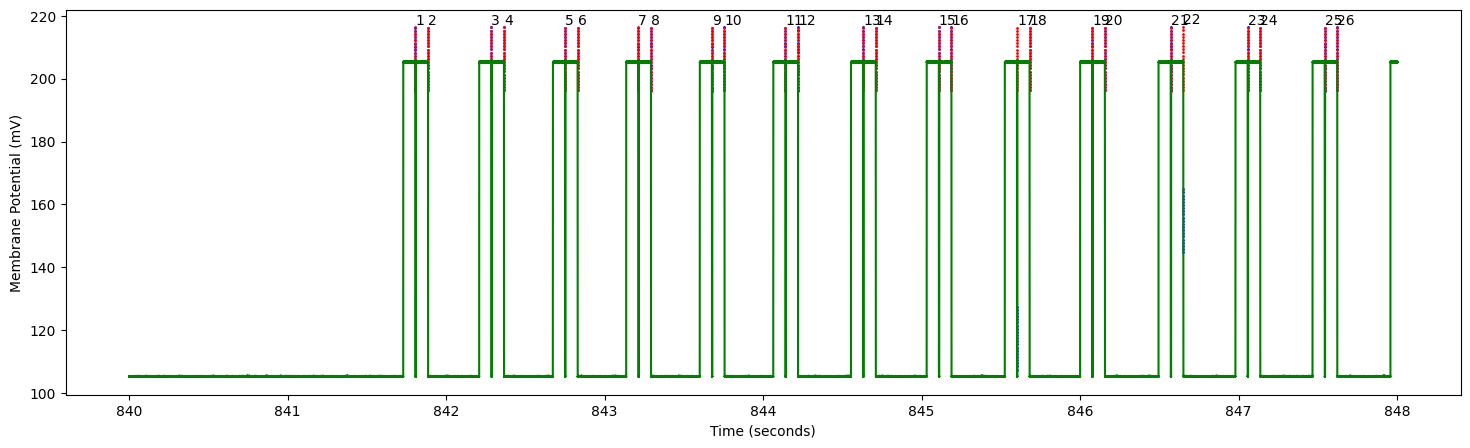

Time: 21200000 ~ 21400050
Close point found: 17
Far point found: 17


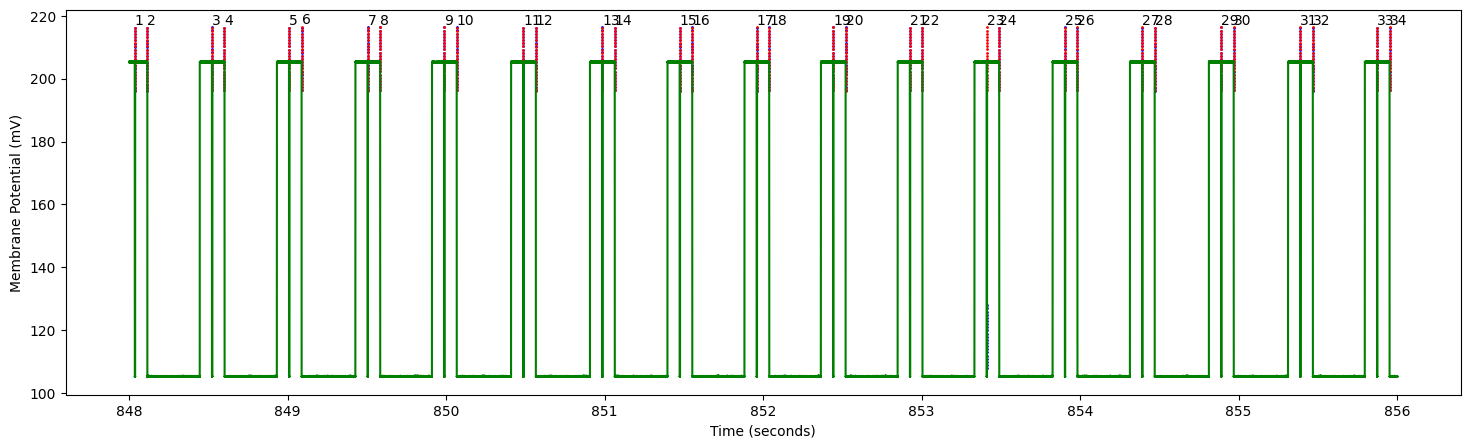

Time: 21400000 ~ 21600050
Close point found: 16
Far point found: 15


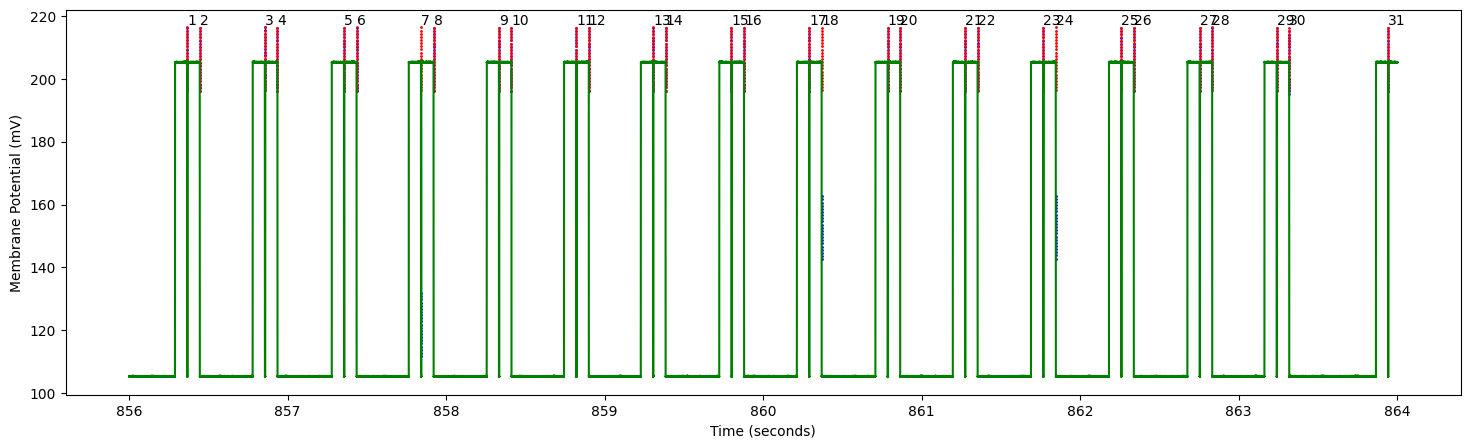

Time: 21600000 ~ 21800050
Close point found: 11
Far point found: 10


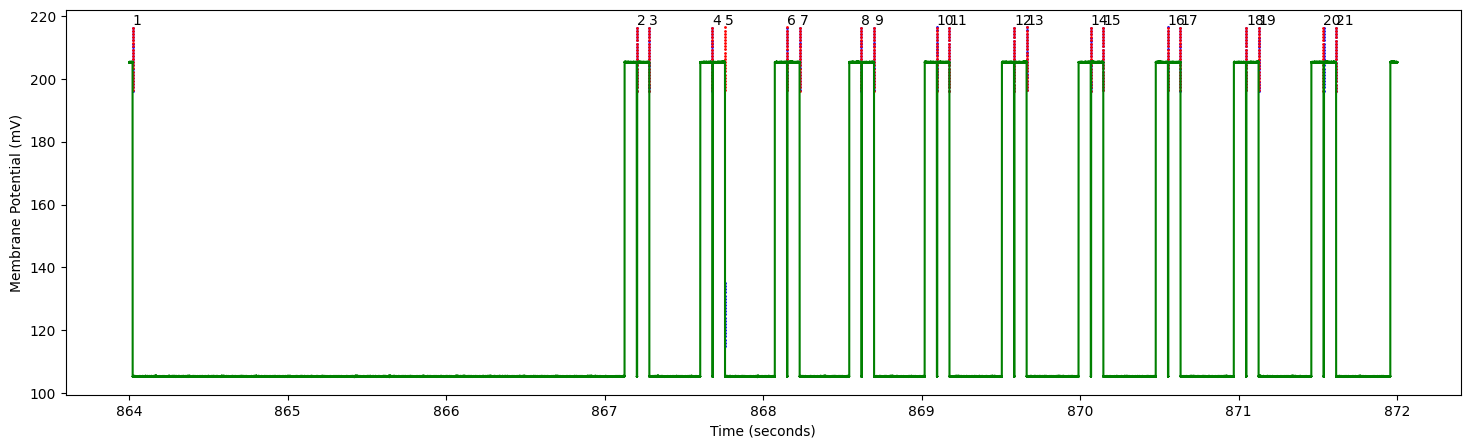

Time: 21800000 ~ 22000050
Close point found: 17
Far point found: 17


Time: 22000000 ~ 22200050
Close point found: 16
Far point found: 16


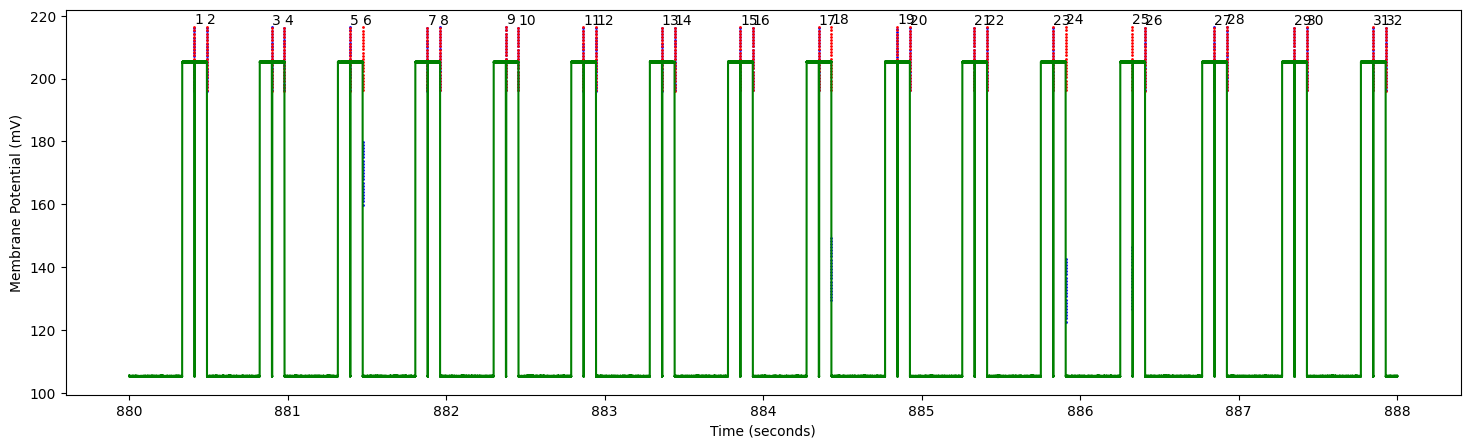

Time: 22200000 ~ 22400050
Close point found: 10
Far point found: 10


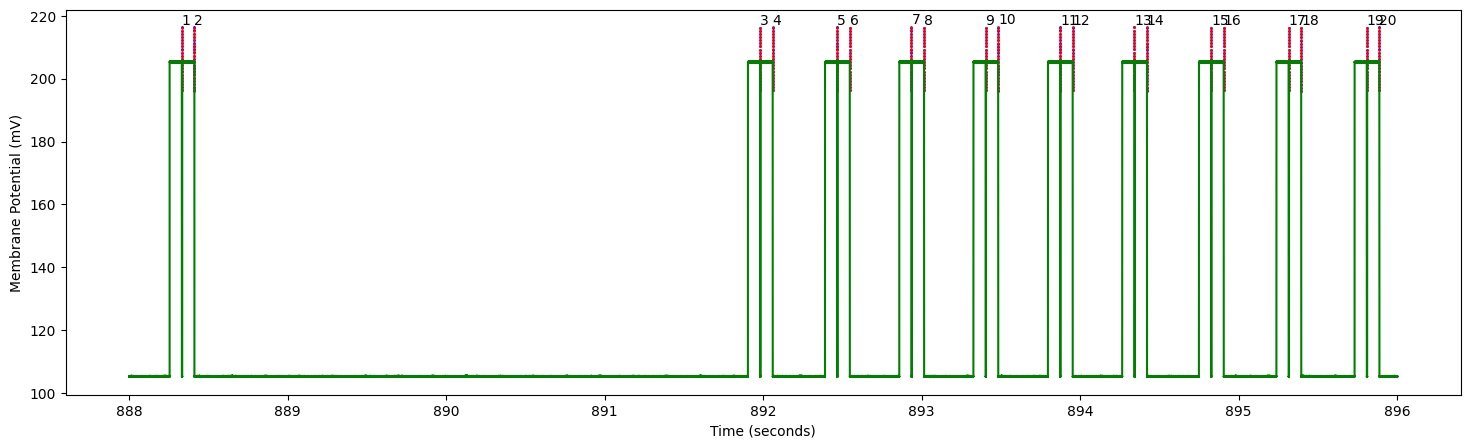

Time: 22400000 ~ 22600050
Close point found: 16
Far point found: 16


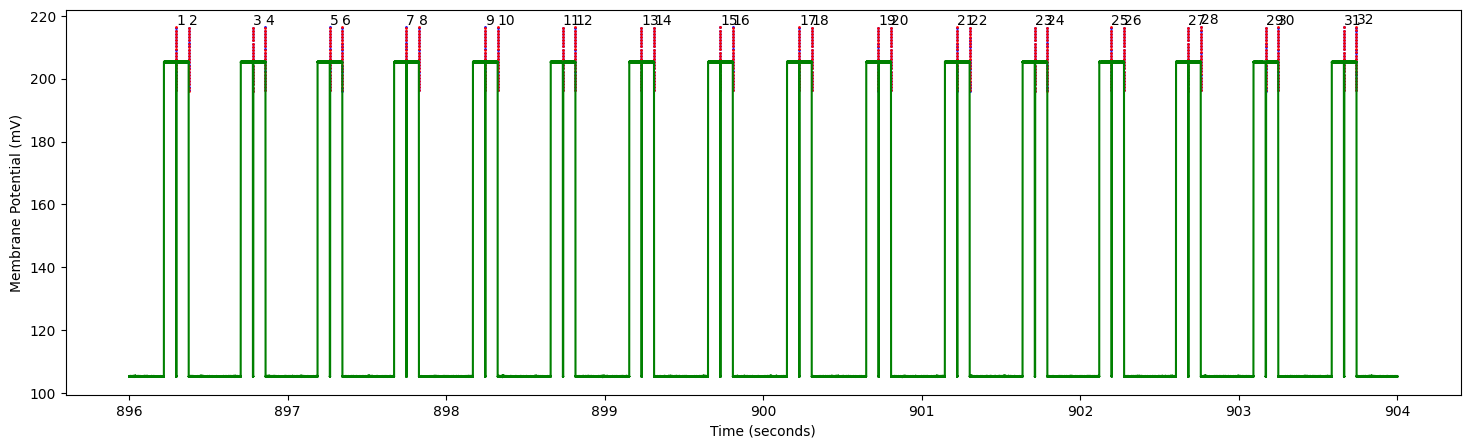

Time: 22600000 ~ 22800050
Close point found: 17
Far point found: 16


Time: 22800000 ~ 23000050
Close point found: 11
Far point found: 10


Time: 23000000 ~ 23200050
Close point found: 16
Far point found: 16


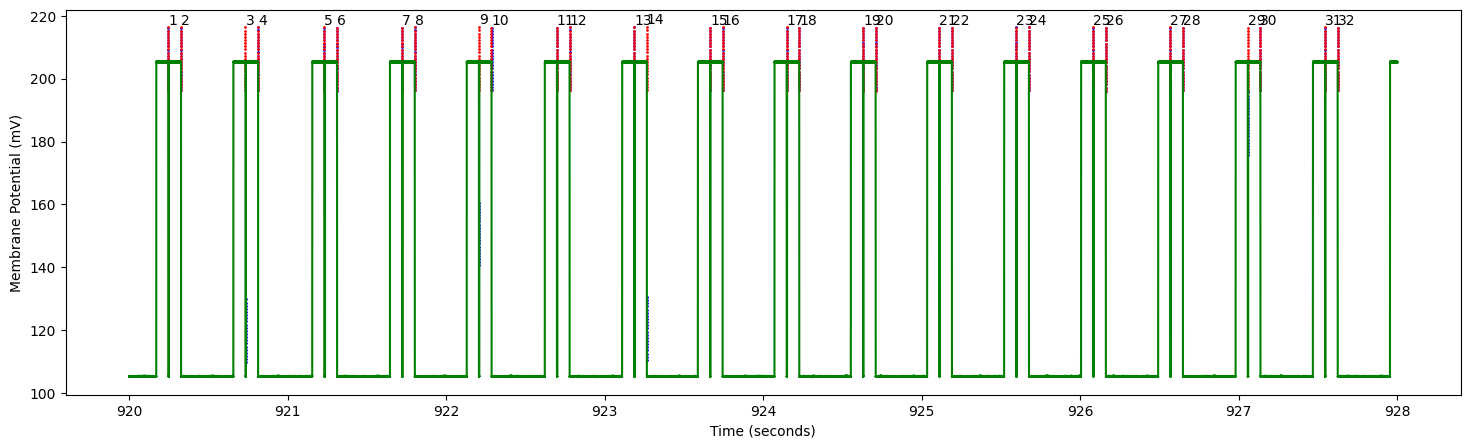

Time: 23200000 ~ 23400050
Close point found: 17
Far point found: 17


Time: 23400000 ~ 23600050
Close point found: 10
Far point found: 10


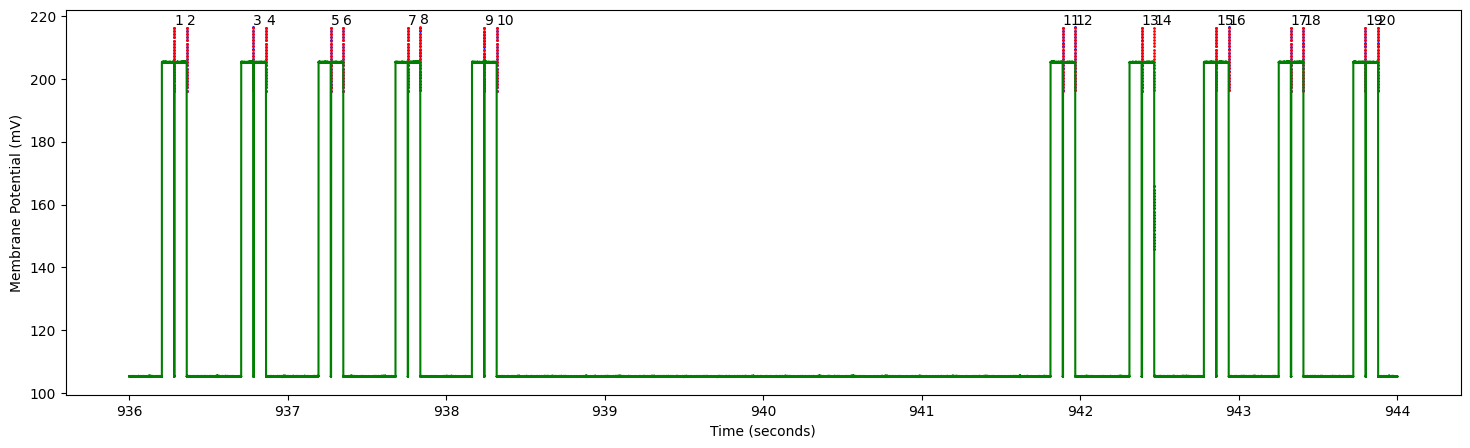

Time: 23600000 ~ 23800050
Close point found: 16
Far point found: 16


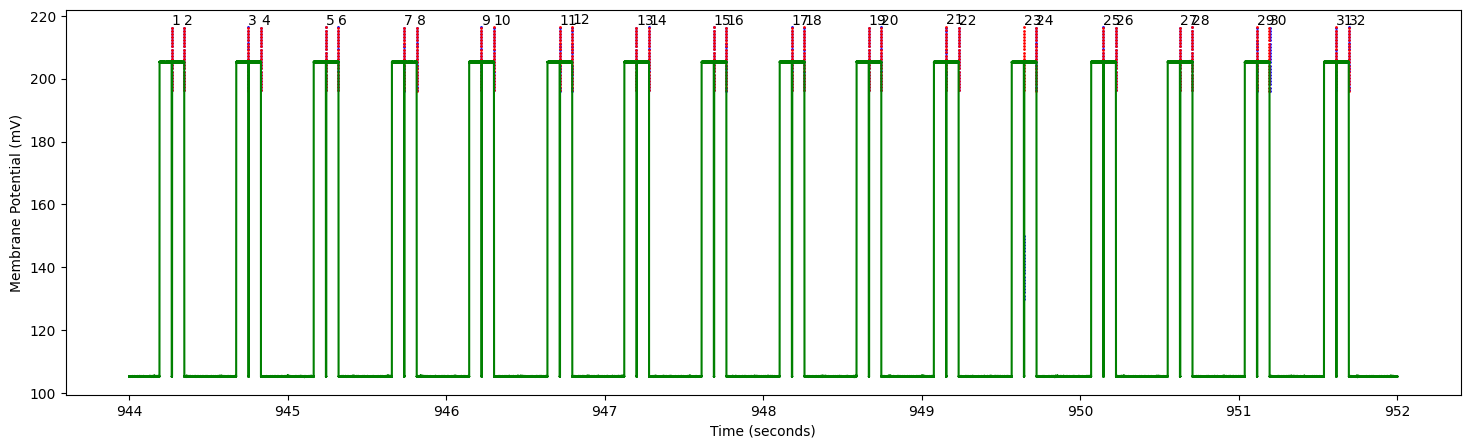

Time: 23800000 ~ 24000050
Close point found: 17
Far point found: 16


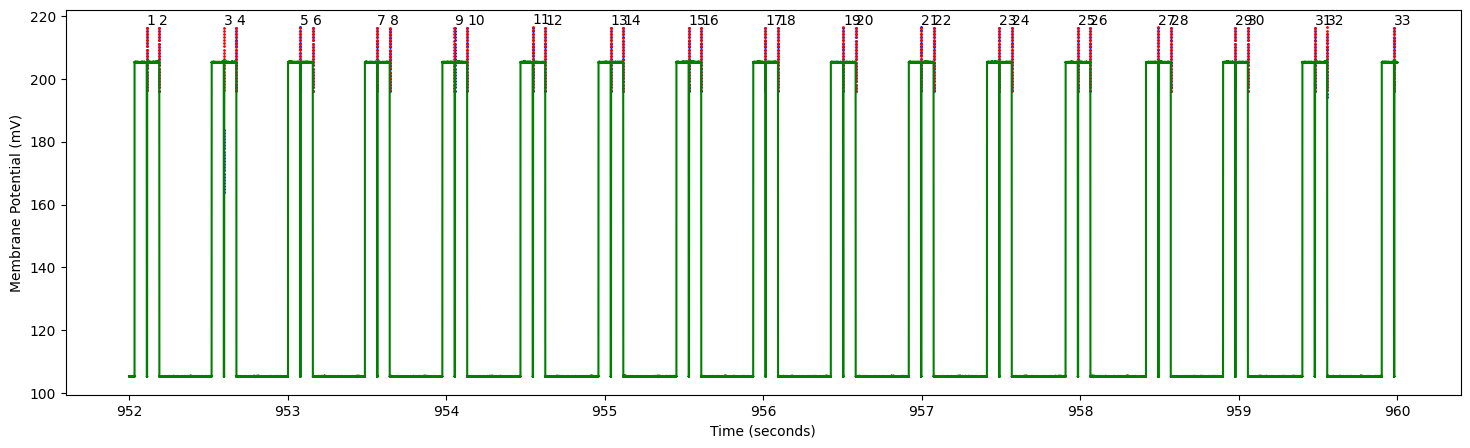

Time: 24000000 ~ 24200050
Close point found: 11
Far point found: 10


Time: 24200000 ~ 24400050
Close point found: 16
Far point found: 16


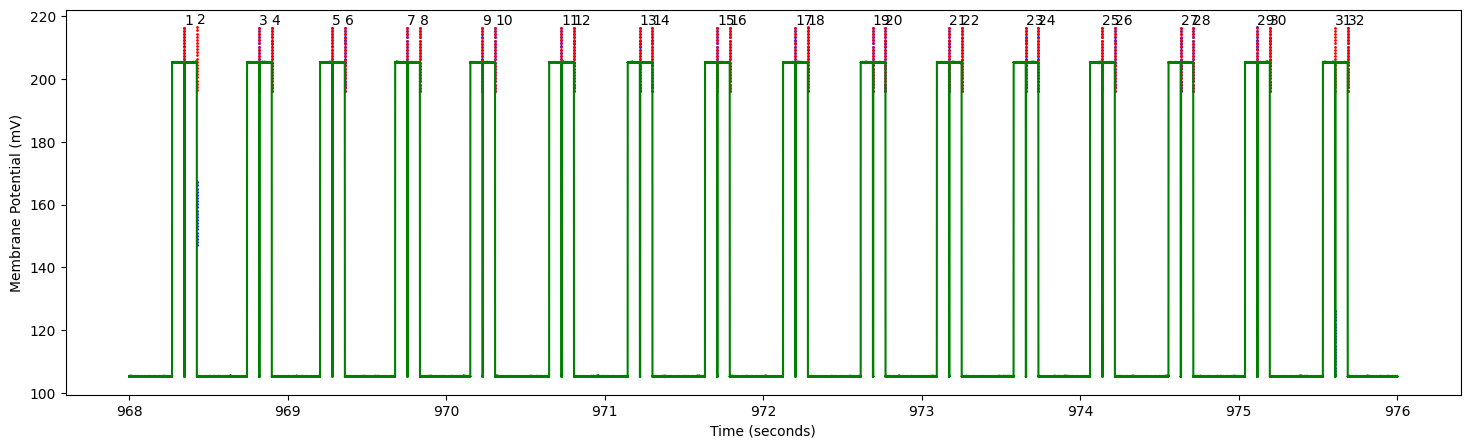

Time: 24400000 ~ 24600050
Close point found: 16
Far point found: 16


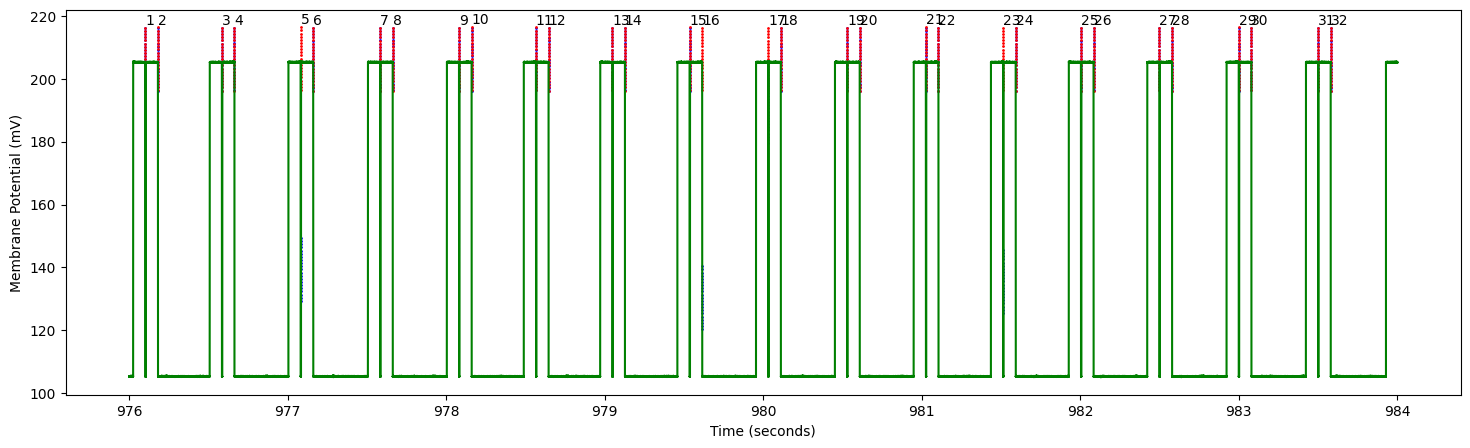

Time: 24600000 ~ 24800050
Close point found: 11
Far point found: 10


Time: 24800000 ~ 25000050
Close point found: 16
Far point found: 16


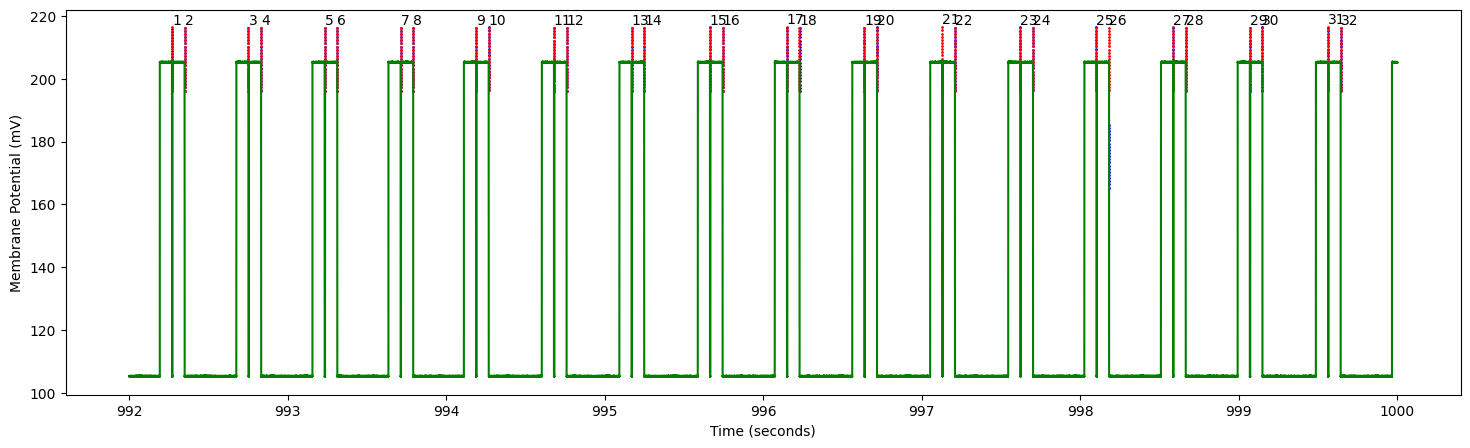

Time: 25000000 ~ 25200050
Close point found: 17
Far point found: 17


Time: 25200000 ~ 25400050
Close point found: 12
Far point found: 12


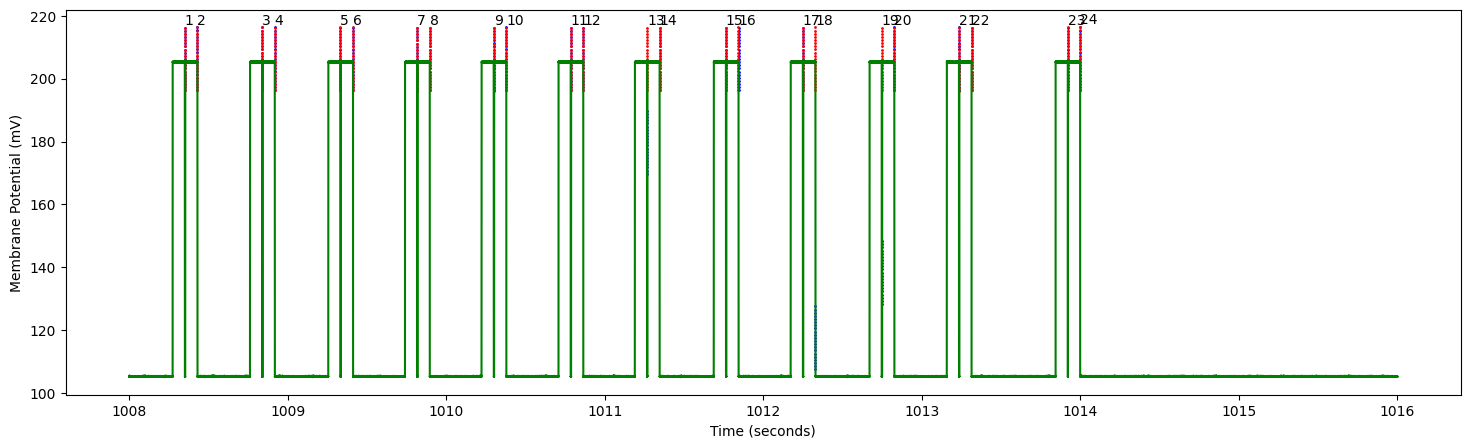

Time: 25400000 ~ 25600050
Close point found: 14
Far point found: 14


Time: 25600000 ~ 25800050
Close point found: 17
Far point found: 17


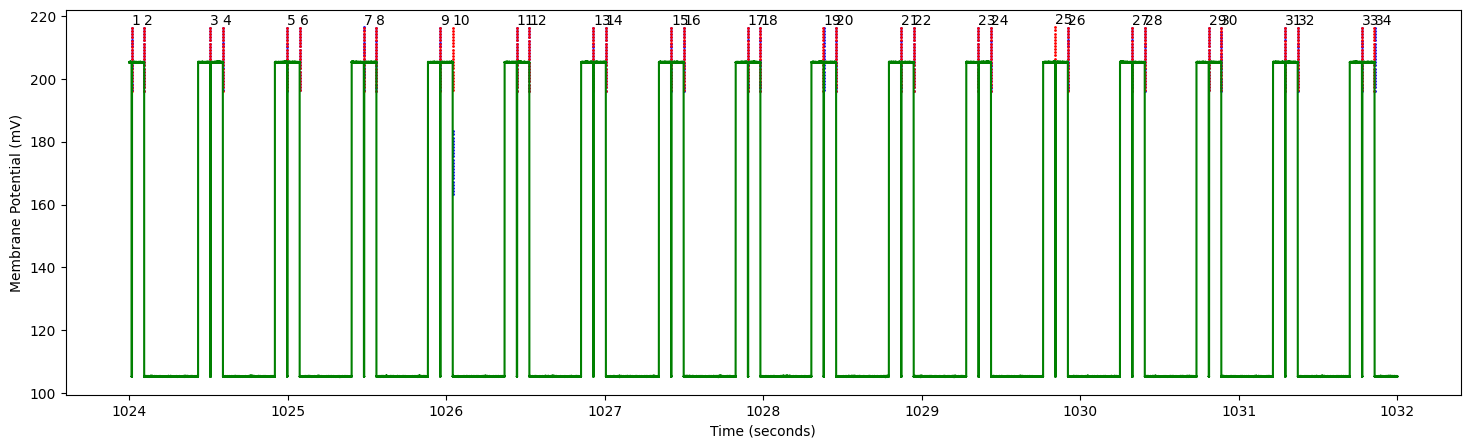

Time: 25800000 ~ 26000050
Close point found: 13
Far point found: 13


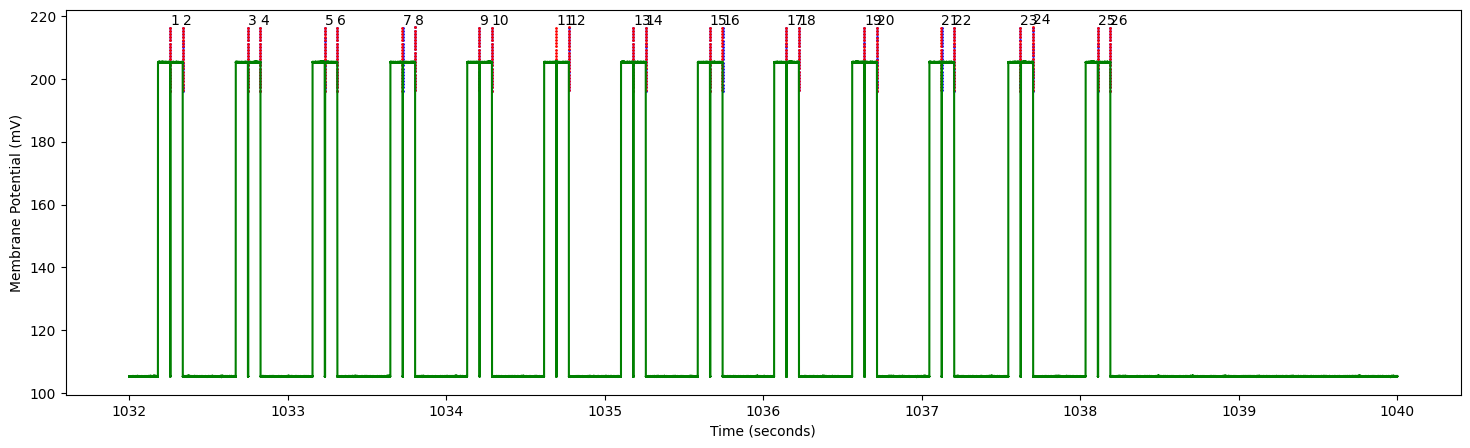

Time: 26000000 ~ 26200050
Close point found: 13
Far point found: 13


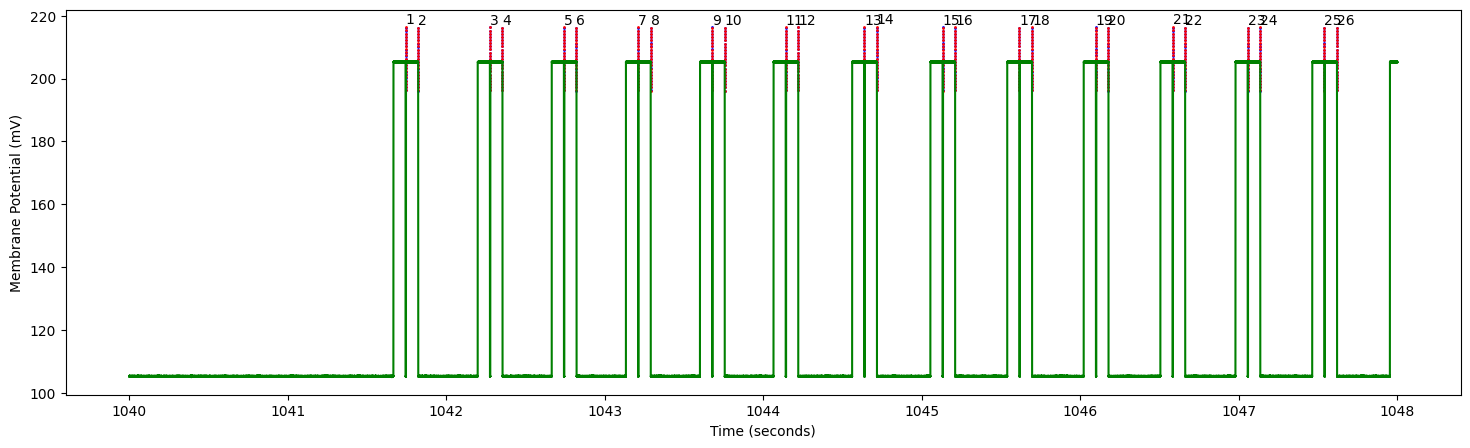

Time: 26200000 ~ 26400050
Close point found: 17
Far point found: 17


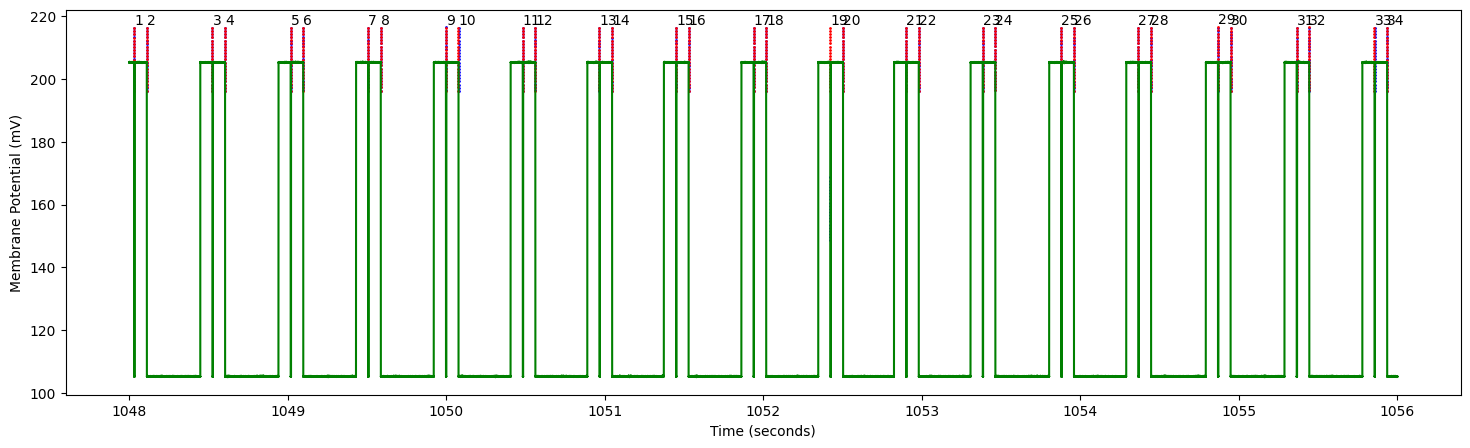

Time: 26400000 ~ 26600050
Close point found: 15
Far point found: 15


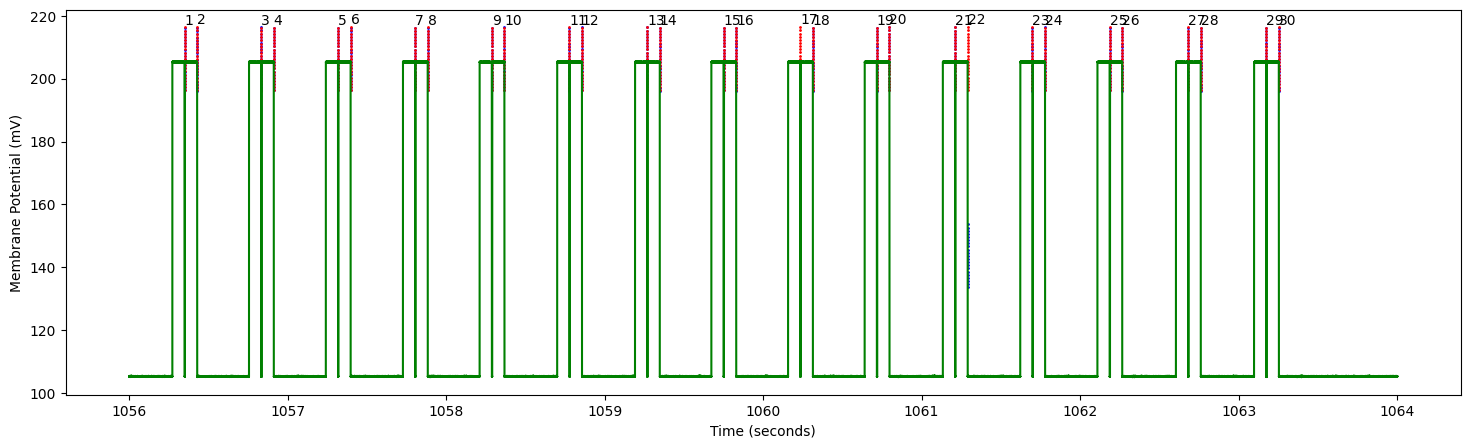

Time: 26600000 ~ 26800050
Close point found: 11
Far point found: 11


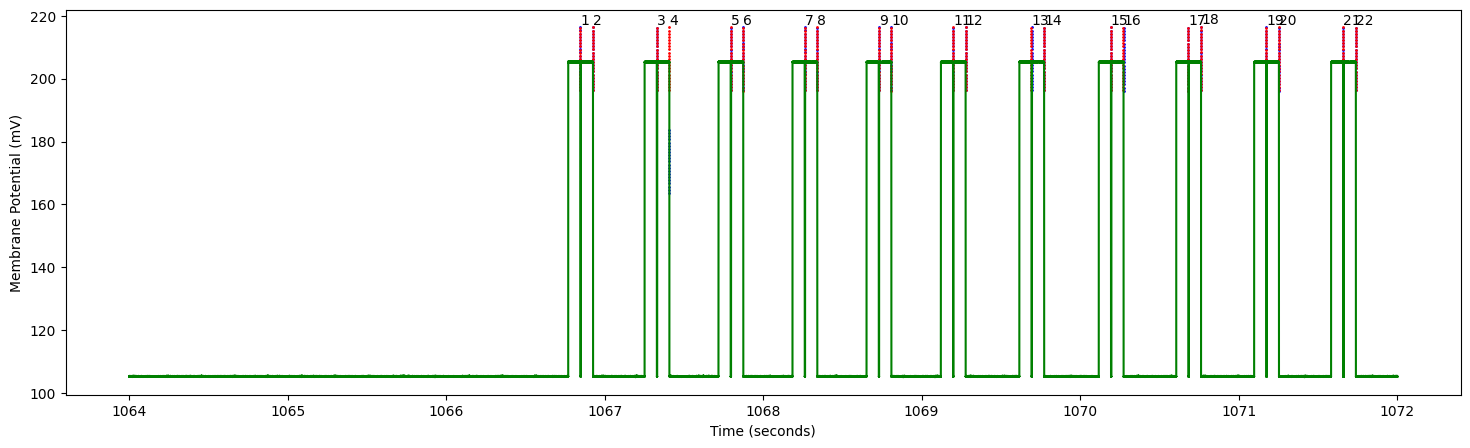

Time: 26800000 ~ 27000050
Close point found: 17
Far point found: 16


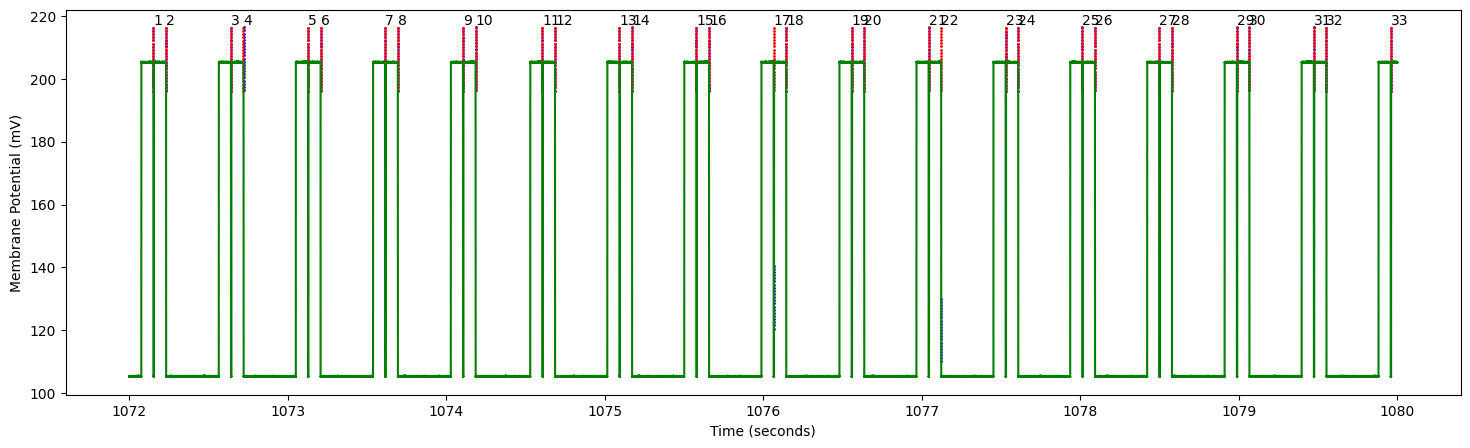

Time: 27000000 ~ 27200050
Close point found: 17
Far point found: 16


Time: 27200000 ~ 27400050
Close point found: 10
Far point found: 10


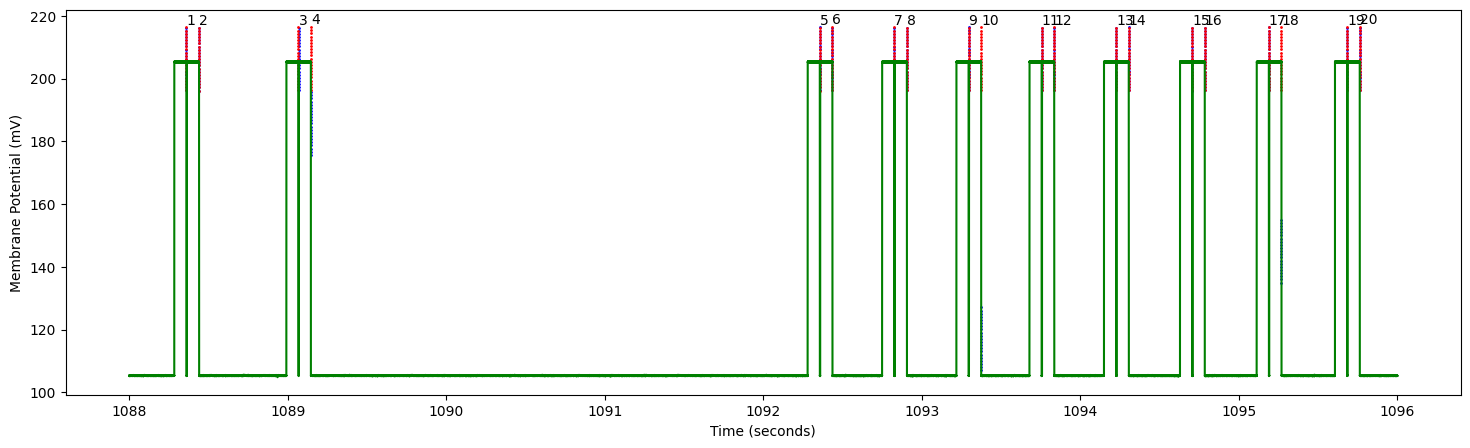

Time: 27400000 ~ 27600050
Close point found: 17
Far point found: 16


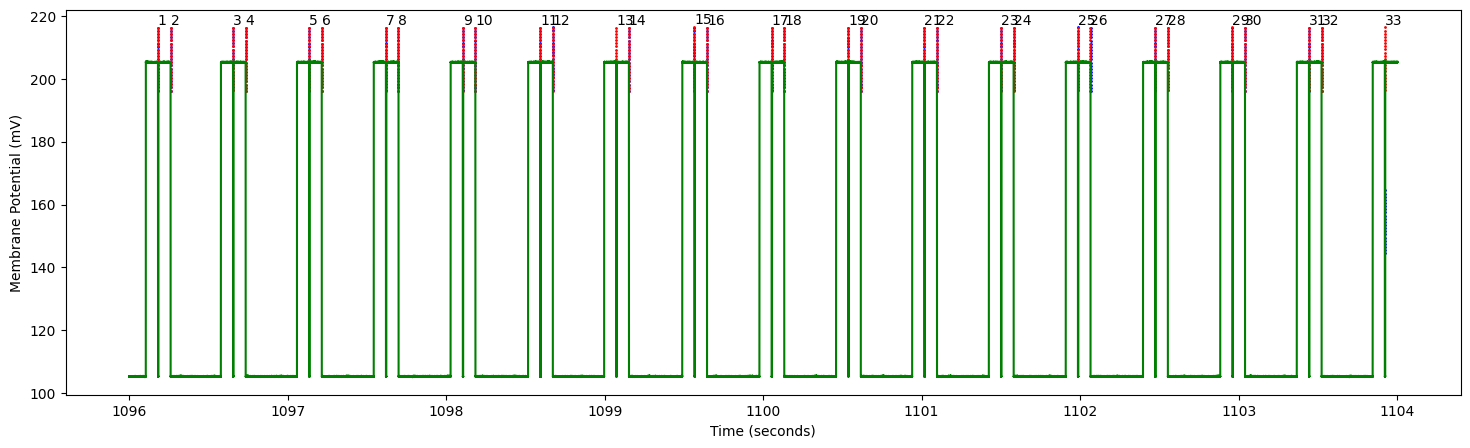

Time: 27600000 ~ 27800050
Close point found: 17
Far point found: 16


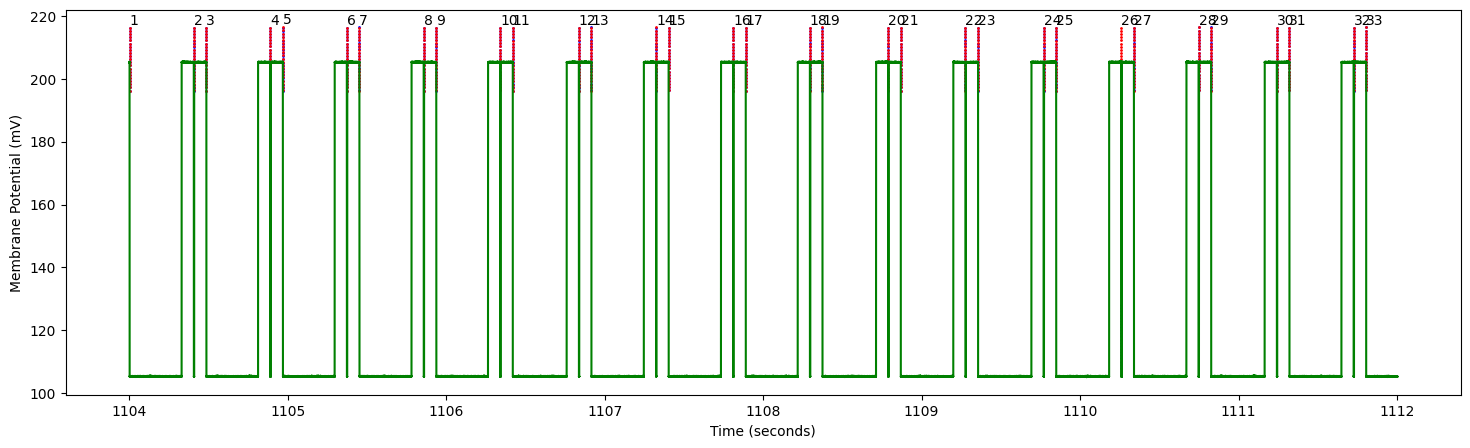

Time: 27800000 ~ 28000050
Close point found: 10
Far point found: 10


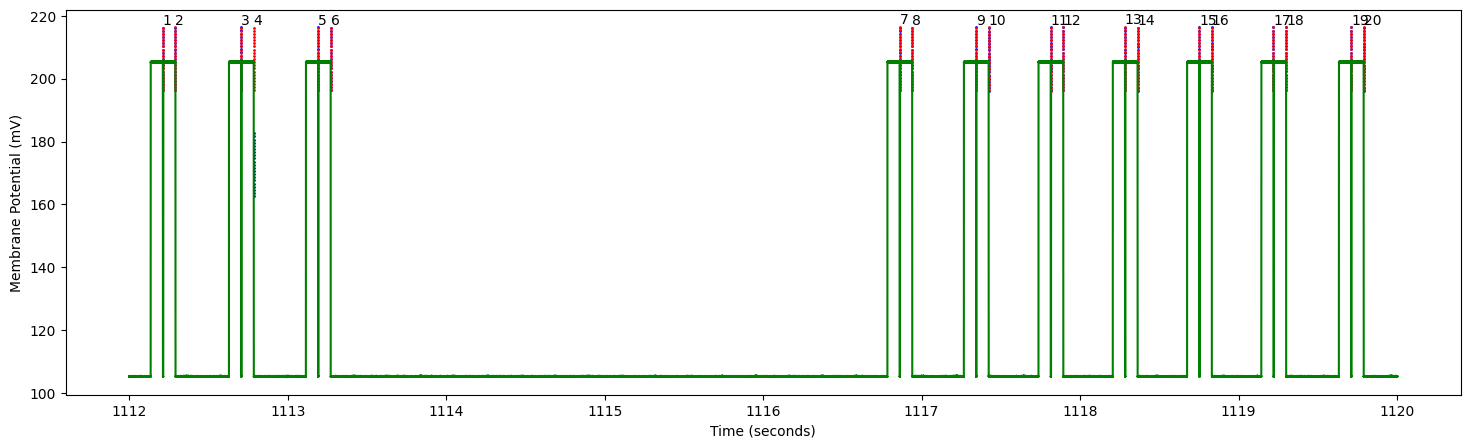

Time: 28000000 ~ 28200050
Close point found: 17
Far point found: 16


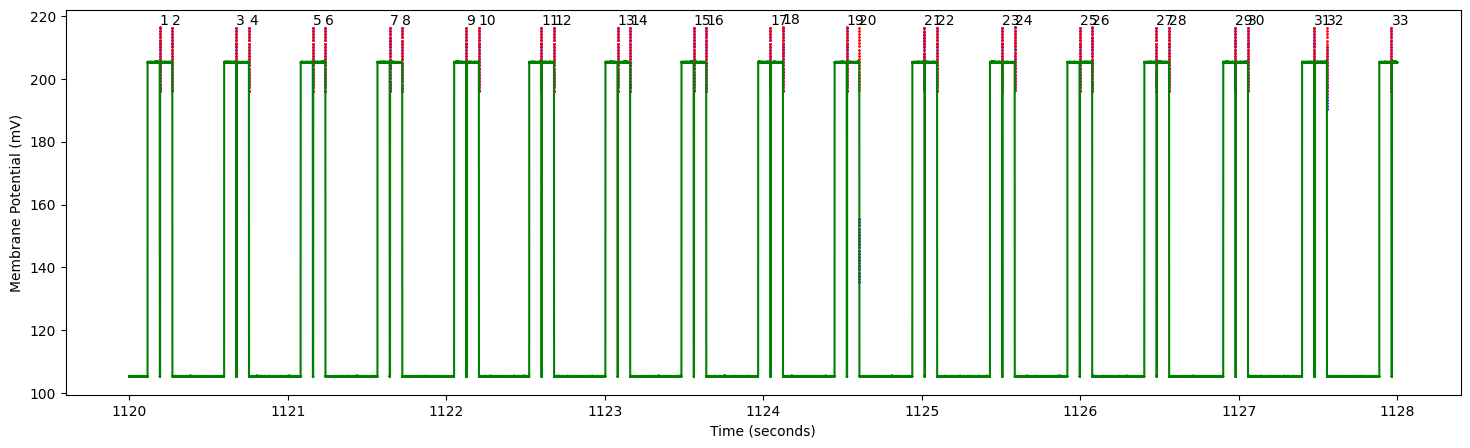

Time: 28200000 ~ 28400050
Close point found: 17
Far point found: 16


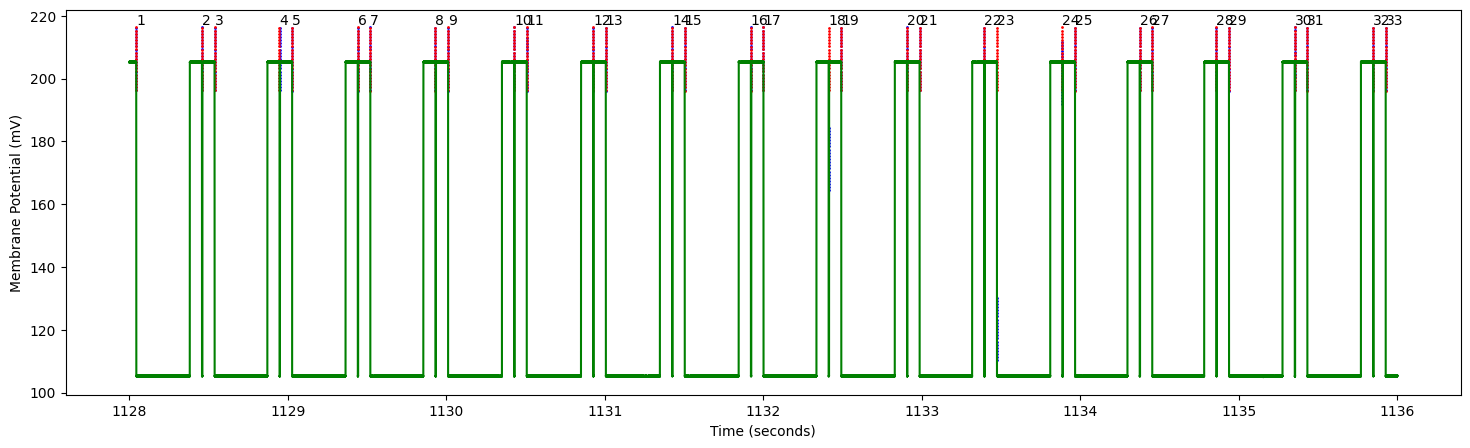

Time: 28400000 ~ 28600050
Close point found: 10
Far point found: 10


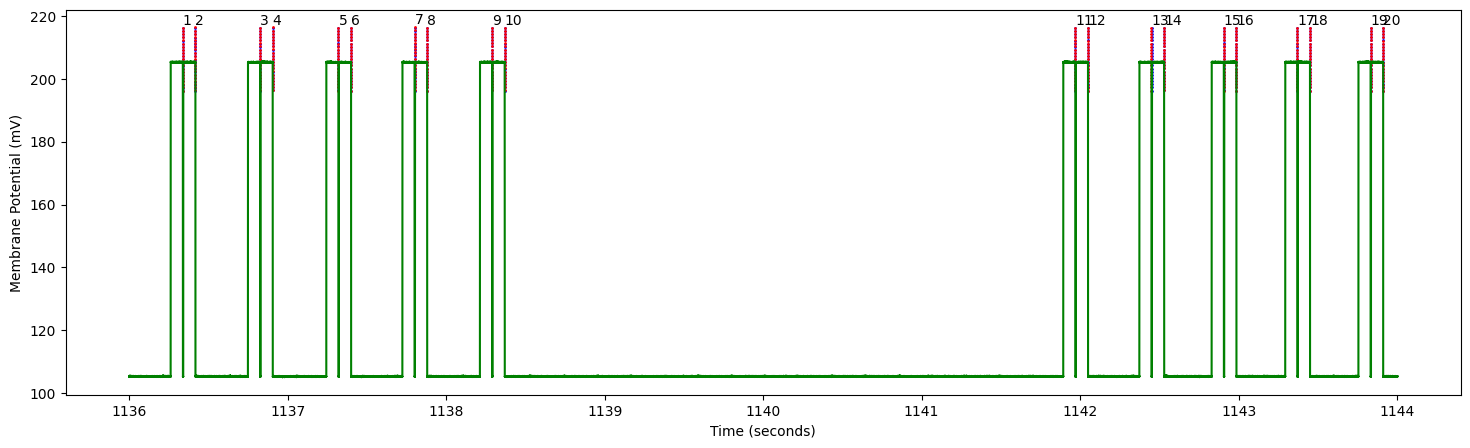

Time: 28600000 ~ 28800050
Close point found: 16
Far point found: 16


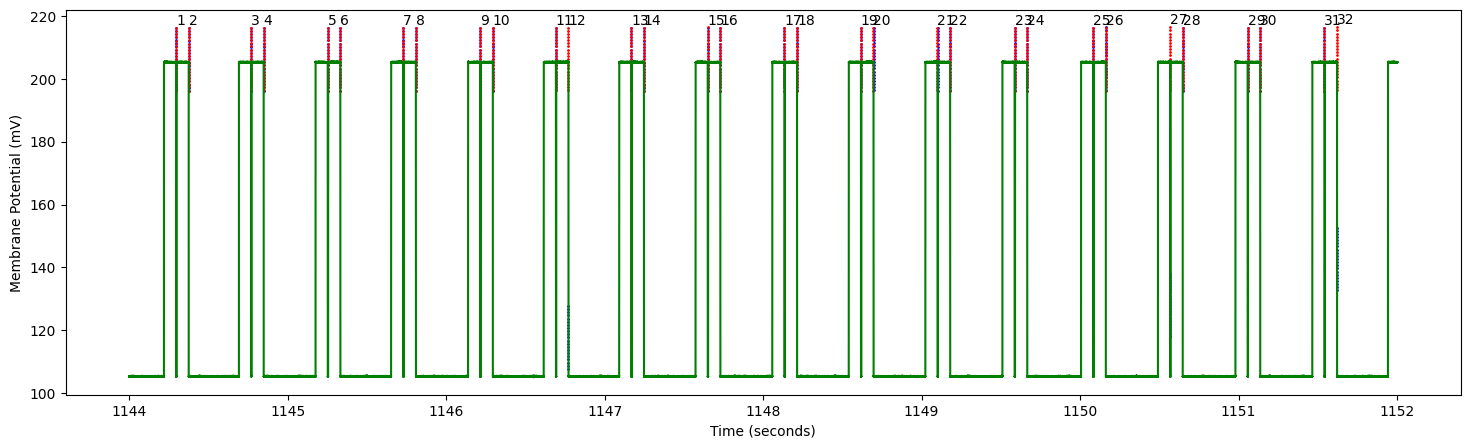

Time: 28800000 ~ 29000050
Close point found: 17
Far point found: 17


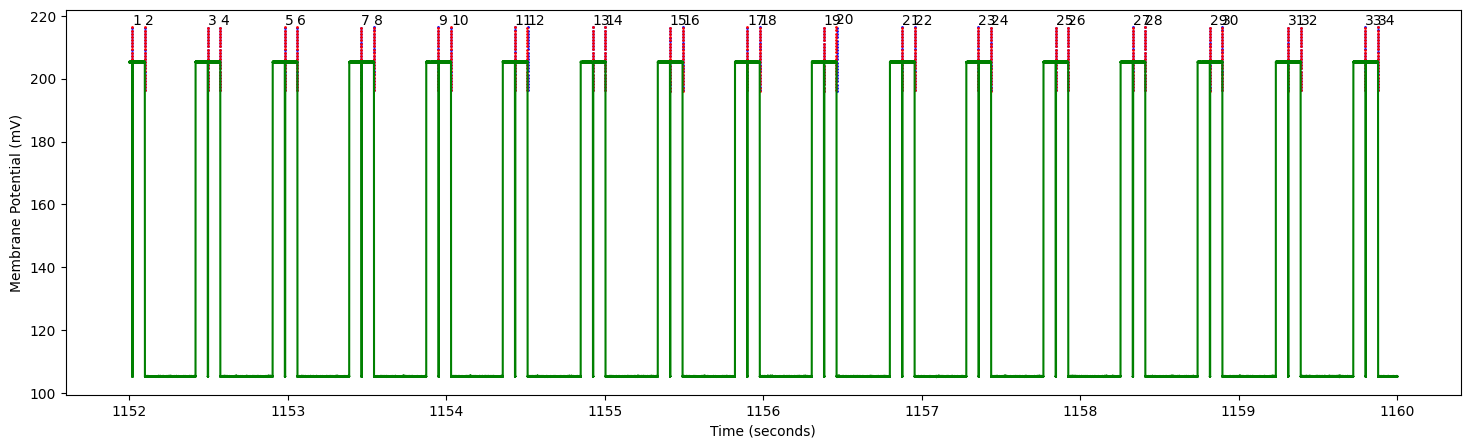

Time: 29000000 ~ 29200050
Close point found: 10
Far point found: 10


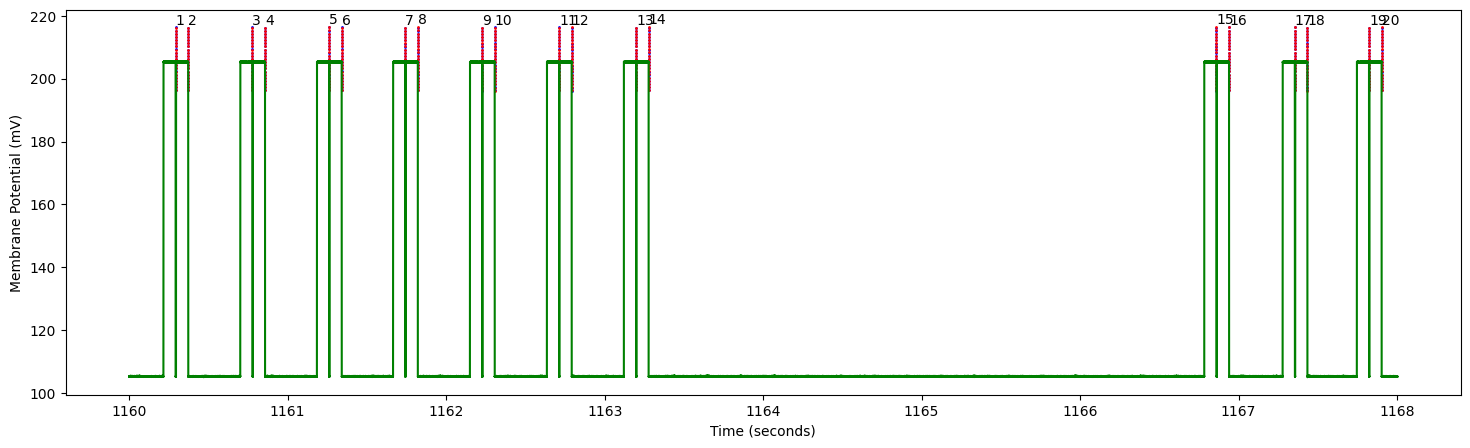

Time: 29200000 ~ 29400050
Close point found: 17
Far point found: 16


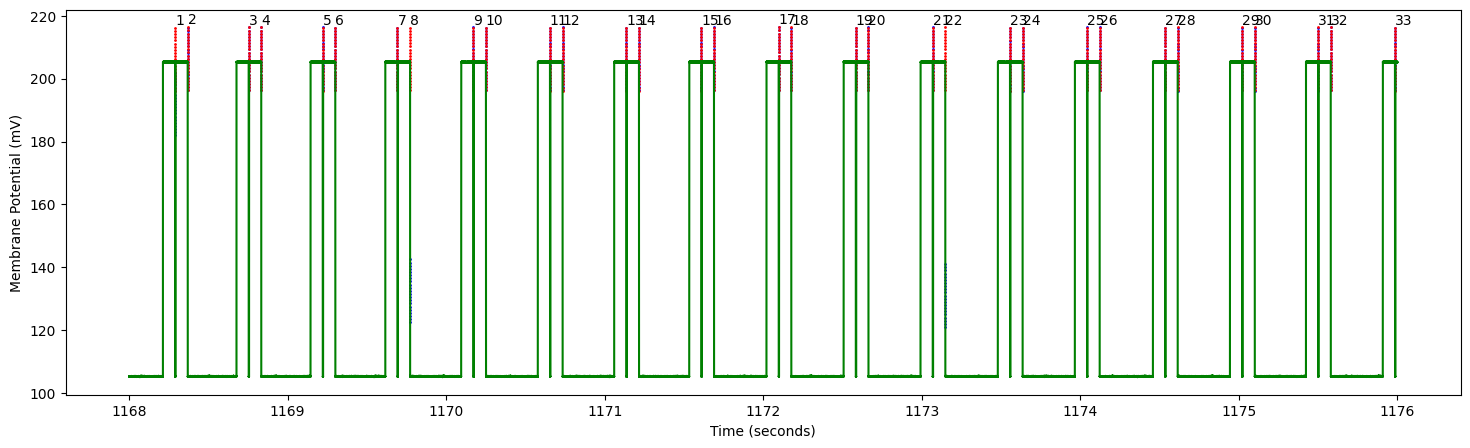

Time: 29400000 ~ 29600050
Close point found: 17
Far point found: 16


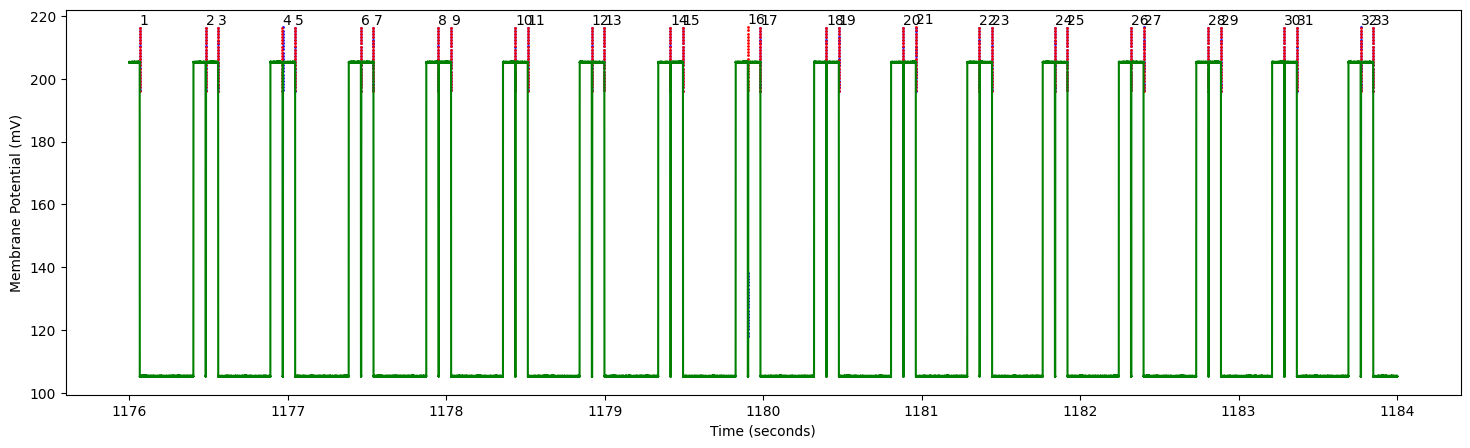

Time: 29600000 ~ 29800050
Close point found: 10
Far point found: 10


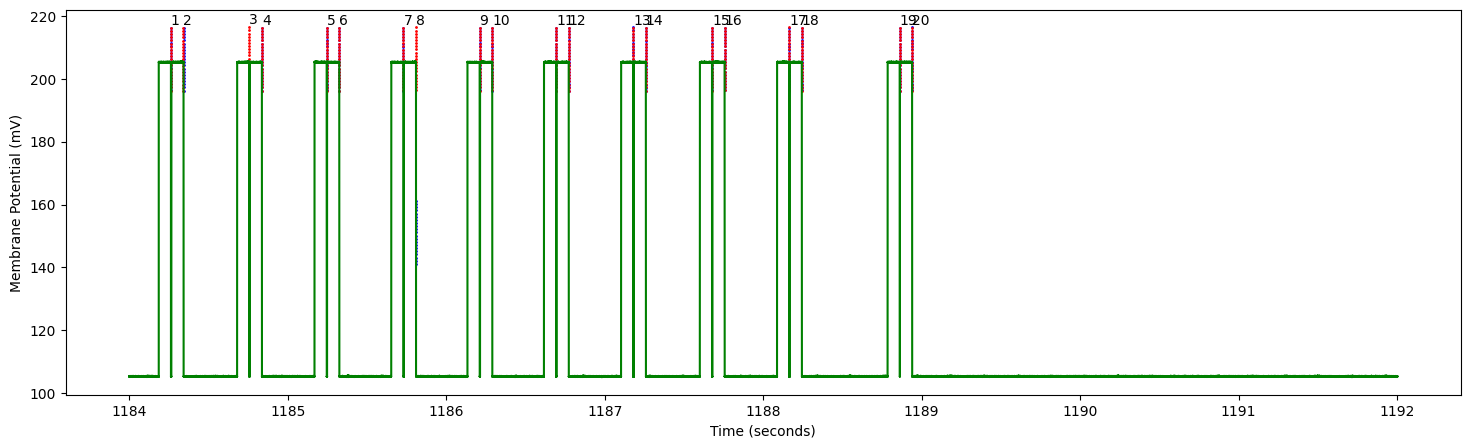

Time: 29800000 ~ 30000050
Close point found: 17
Far point found: 17


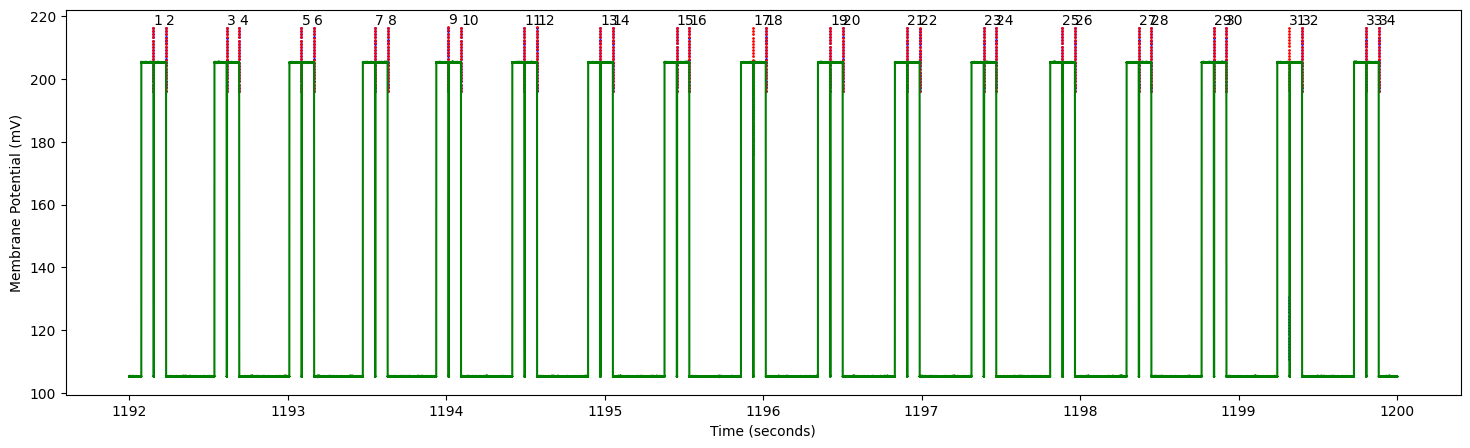

Time: 30000000 ~ 30200050
Close point found: 16
Far point found: 16


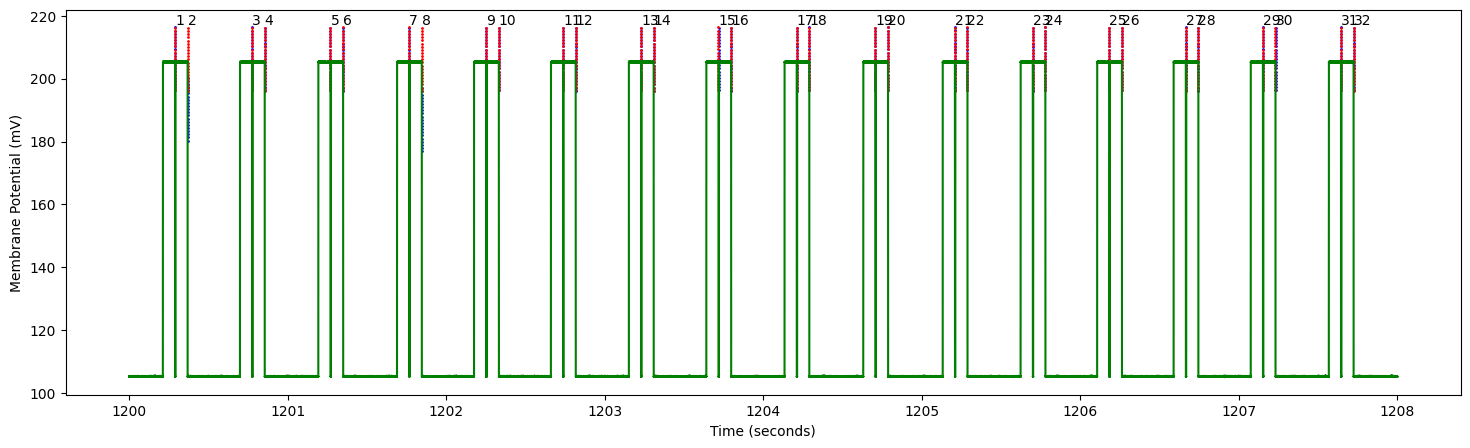

Time: 30200000 ~ 30400050
Close point found: 11
Far point found: 11


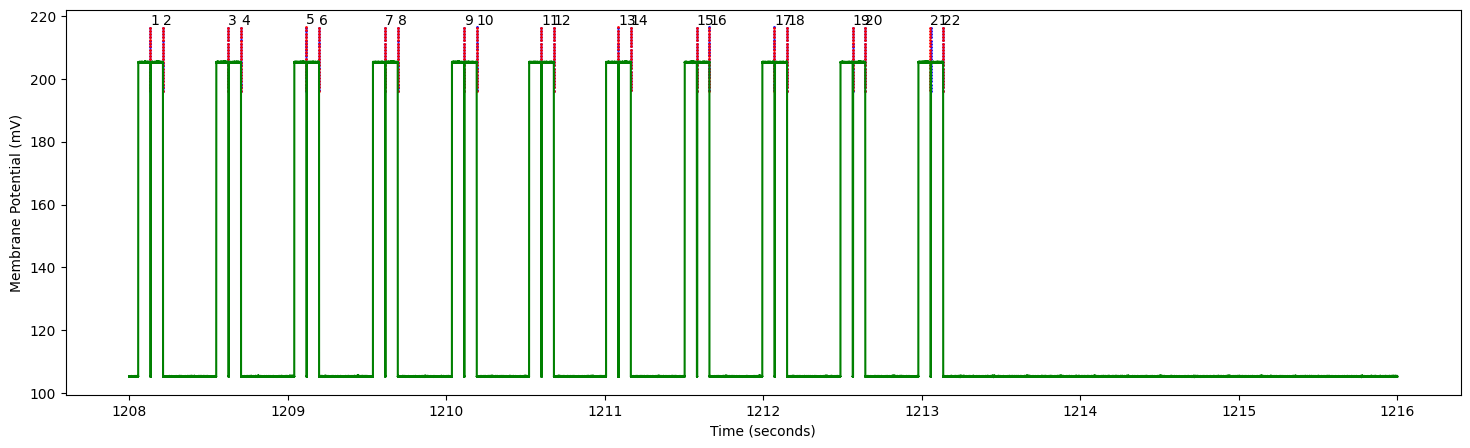

Time: 30400000 ~ 30600050
Close point found: 11
Far point found: 11


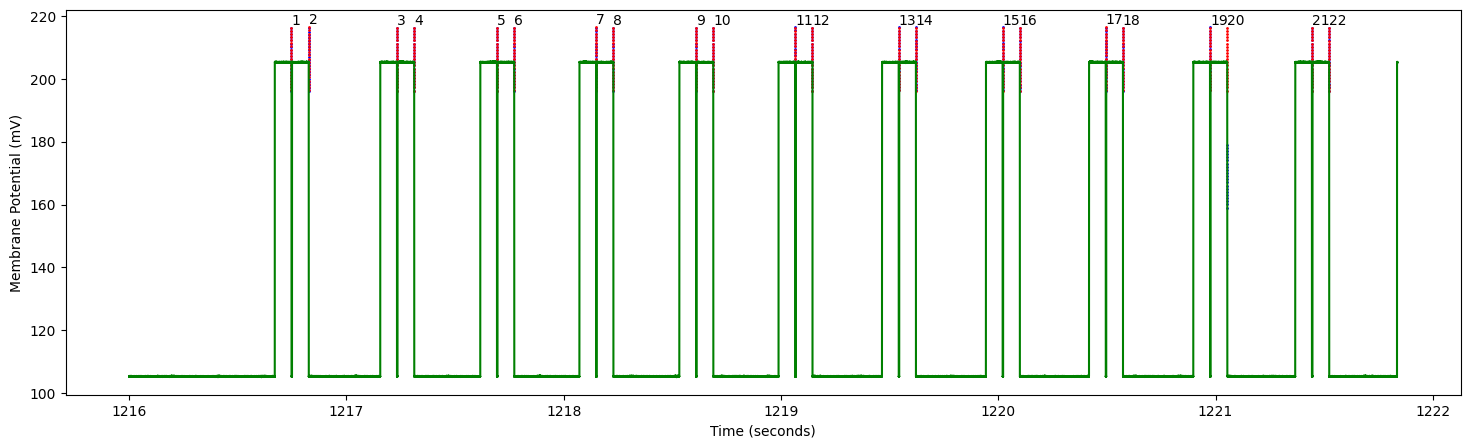

In [19]:
interval = 200000
ind = 0
consider_single = False

if consider_single:
    s = single[ind]
else:
    s = (False,False)
    
for i in range(0,len(abf[ind].sweepY),interval):
    print("Time: %d ~ %d"%(i,i+interval+50))
    timeStart = i
    timeEnd = i+interval+50
    close_qty,far_qty = plot_wave(abf[ind],volt[ind],single = s,timeStart = timeStart, timeEnd = timeEnd,channel = 4)

## Test 03_v3--Check Total Points Collected in each (x,y)

In [20]:
ind = 0

mat = print_points_qty(abf[ind],index = far_inds[ind])

  0. 16 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 Row Dimension:20 ; Row Total: 244
  1. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  Row Dimension:20 ; Row Total: 45
  2. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  Row Dimension:20 ; Row Total: 45
  3. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  Row Dimension:20 ; Row Total: 45
  4. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  Row Dimension:20 ; Row Total: 45
  5. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  Row Dimension:20 ; Row Total: 45
  6. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  Row Dimension:20 ; Row Total: 45
  7. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  Row Dimension:20 ; Row Total: 45
  8. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  Row Dimension:20 ; Row Total: 45
  9. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  Row Dimension:20 ; Row Total: 45
 10. 7  2  2  2  2 

# Test 04: Check close far pairs

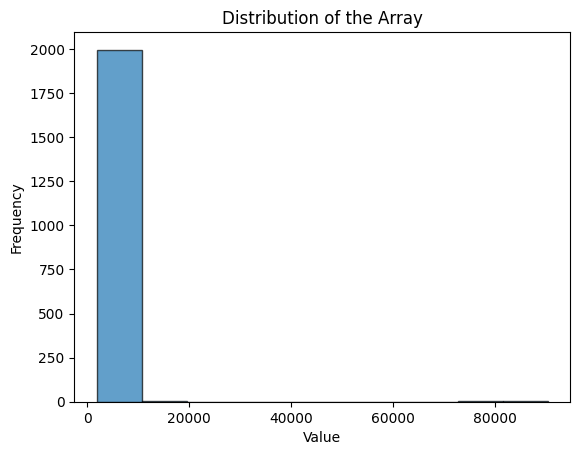

Now:79811.00,Mean: 2034.12, Std:1948.09,Limits:[-27187.16,31255.40]
Now:79873.00,Mean: 2303.76, Std:3027.89,Limits:[-43114.60,47722.12]
Now:88828.00,Mean: 2556.10, Std:3859.07,Limits:[-55330.00,60442.20]
Now:89828.00,Mean: 2800.84, Std:4509.42,Limits:[-64840.46,70442.15]
Now:80281.00,Mean: 3036.11, Std:4959.90,Limits:[-71362.37,77434.60]
Now:89745.00,Mean: 3251.39, Std:5411.25,Limits:[-77917.42,84420.20]
Error point index:1594, Error value: 79811
Index 1594 is located at Row = 28, among end extra points.


NameError: name 'close_inds' is not defined

In [21]:
ind = 0
check_close_fair_pair(close_inds[ind],far_inds[ind], Row[ind], Col[ind], ignore[ind], extra[ind], first_row_repeat[ind], volt[ind], abf[ind])